In [3]:
def compare_dataframes(df1, df2):
    # Check basic properties
    print("DataFrame Shape Comparison:")
    print(f"Original DataFrame Shape: {df1.shape}")
    print(f"Optimized DataFrame Shape: {df2.shape}")
    
    # Check column names
    print("\nColumn Names:")
    print(f"Original Columns: {list(df1.columns)}")
    print(f"Optimized Columns: {list(df2.columns)}")
    
    # Check if DataFrames are exactly equal
    are_equal = df1.equals(df2)
    print(f"\nDataFrames are exactly equal: {are_equal}")
    
    if not are_equal:
        # Detailed comparison if not exactly equal
        # Check for differences in values
        diff_mask = ~(df1 == df2)
        differing_rows = df1[diff_mask.any(axis=1)]
        
        print("\nDiffering Rows:")
        print(differing_rows)
        
        # Compare specific columns if needed
        print("\nColumn-wise Comparison:")
        for col in df1.columns:
            col_equal = (df1[col] == df2[col]).all()
            print(f"{col} column equal: {col_equal}")

# Usage
filepath = "data/conllu_data.conllu"
df_original = original_parse(filepath)
df_optimized = optimized_parse(filepath)

df_original.to_csv("data/test20.csv", index=False, quoting=1)
df_optimized.to_csv("data/test30.csv", index=False, quoting=1)

compare_dataframes(df_original, df_optimized)

DataFrame Shape Comparison:
Original DataFrame Shape: (190675, 3)
Optimized DataFrame Shape: (190675, 3)

Column Names:
Original Columns: ['movie_id', 'genre', 'description']
Optimized Columns: ['movie_id', 'genre', 'description']

DataFrames are exactly equal: True


In [ ]:
# one versus all?


we will use our own metric calcucation
i need to split it in a different way, similir to this:
X_train, y_train, X_test, y_test = iterative_train_test_split(X, y, 0.1) 
but do a 80/10/10 split

i also need to tokenize the description column not the text column

In [ ]:


{'jaccard': 0.4089781453041938, 'hamming': 0.08407166765111243, 'accuracy': 0.15062020082693445, 'f1': 0.5047056507186454, 'precision': 0.6591848789131719, 'recall': 0.44462492616656824, 'classification_report': {'Action': {'precision': 0.6893617021276596, 'recall': 0.45251396648044695, 'f1-score': 0.5463743676222597, 'support': 358.0}, 'Adventure': {'precision': 0.5132743362831859, 'recall': 0.31351351351351353, 'f1-score': 0.38926174496644295, 'support': 185.0}, 'Animation': {'precision': 1.0, 'recall': 0.03333333333333333, 'f1-score': 0.06451612903225806, 'support': 60.0}, 'Biography': {'precision': 0.8571428571428571, 'recall': 0.1935483870967742, 'f1-score': 0.3157894736842105, 'support': 62.0}, 'Comedy': {'precision': 0.6736842105263158, 'recall': 0.3450134770889488, 'f1-score': 0.4563279857397504, 'support': 371.0}, 'Crime': {'precision': 0.6138211382113821, 'recall': 0.5354609929078015, 'f1-score': 0.571969696969697, 'support': 282.0}, 'Drama': {'precision': 0.62531328320802, 'recall': 0.6854395604395604, 'f1-score': 0.653997378768021, 'support': 728.0}, 'Family': {'precision': 0.6415094339622641, 'recall': 0.3008849557522124, 'f1-score': 0.40963855421686746, 'support': 113.0}, 'Fantasy': {'precision': 0.5652173913043478, 'recall': 0.12149532710280374, 'f1-score': 0.2, 'support': 107.0}, 'Film-Noir': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 40.0}, 'History': {'precision': 1.0, 'recall': 0.034482758620689655, 'f1-score': 0.06666666666666667, 'support': 58.0}, 'Horror': {'precision': 0.7957446808510639, 'recall': 0.6951672862453532, 'f1-score': 0.7420634920634921, 'support': 269.0}, 'Music': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 59.0}, 'Musical': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 48.0}, 'Mystery': {'precision': 0.5, 'recall': 0.015625, 'f1-score': 0.030303030303030304, 'support': 128.0}, 'Romance': {'precision': 0.63003663003663, 'recall': 0.5134328358208955, 'f1-score': 0.5657894736842105, 'support': 335.0}, 'Sci-Fi': {'precision': 0.7727272727272727, 'recall': 0.5, 'f1-score': 0.6071428571428571, 'support': 102.0}, 'Sport': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 28.0}, 'Thriller': {'precision': 0.6597222222222222, 'recall': 0.2887537993920973, 'f1-score': 0.40169133192389006, 'support': 329.0}, 'War': {'precision': 0.6956521739130435, 'recall': 0.2807017543859649, 'f1-score': 0.4, 'support': 57.0}, 'Western': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 17.0}, 'micro avg': {'precision': 0.654275092936803, 'recall': 0.42398286937901497, 'f1-score': 0.5145363001461751, 'support': 3736.0}, 'macro avg': {'precision': 0.534914634881727, 'recall': 0.2528269975323998, 'f1-score': 0.3057872467992216, 'support': 3736.0}, 'weighted avg': {'precision': 0.6286825363849318, 'recall': 0.42398286937901497, 'f1-score': 0.47624271263081375, 'support': 3736.0}, 'samples avg': {'precision': 0.6591848789131719, 'recall': 0.44462492616656824, 'f1-score': 0.5047056507186454, 'support': 3736.0}}}



In [5]:
import numpy as np
from sklearn.metrics import (
    jaccard_score,
    hamming_loss,
    accuracy_score,
    balanced_accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    multilabel_confusion_matrix,
    classification_report
)
import warnings
from src.globals import UNIQUE_GENRES

def signed_overlap(y_true, y_pred):
    """
    Compute signed overlap metric for multilabel classification.

    Args:
        y_true (np.ndarray): Ground truth (binary matrix, shape [n_samples, n_classes]).
        y_pred (np.ndarray): Predictions (binary matrix, shape [n_samples, n_classes]).

    Returns:
        float: Signed overlap score.
    """
    intersection = np.sum(np.logical_and(y_true, y_pred), axis=1)
    false_negatives = np.sum(np.logical_and(y_true, ~y_pred), axis=1)
    false_positives = np.sum(np.logical_and(~y_true, y_pred), axis=1)
    union = np.sum(np.logical_or(y_true, y_pred), axis=1)

    signed_overlap_score = np.mean(
        (intersection - false_negatives - false_positives) / (union + 1e-9))
    return signed_overlap_score


def single_signed_overlap(y_true, y_pred):
    # signed overlap for single observations
    intersection = np.sum(np.logical_and(y_true, y_pred))
    false_negatives = np.sum(np.logical_and(y_true, ~y_pred))
    false_positives = np.sum(np.logical_and(~y_true, y_pred))
    union = np.sum(np.logical_or(y_true, y_pred))

    signed_overlap_score = (
        intersection - false_negatives - false_positives) / (union + 1e-9)
    return signed_overlap_score


def at_least_k(y_true, y_pred, k: int = 1):
    """
    Compute the fraction of samples for which at least one label is predicted correctly.

    Args:
        y_true (np.ndarray): Ground truth (binary matrix, shape [n_samples, n_classes]).
        y_pred (np.ndarray): Predictions (binary matrix, shape [n_samples, n_classes]).

    Returns:
        float: Fraction of samples for which at least k label is predicted correctly
    """
    correct = np.sum(np.logical_and(y_true, y_pred), axis=1)
    at_least_k_score = np.mean(correct >= k)
    return at_least_k_score


def confusion_matrix(y_true, y_pred, plot=False):
    """
    Compute per label confusion matrix

    Args:
        y_true (np.ndarray): Ground truth (binary matrix, shape [n_samples, n_classes]).
        y_pred (np.ndarray): Predictions (binary matrix, shape [n_samples, n_classes]).

    Returns:
        float: list of confusion matrices.
    """

    cfm = multilabel_confusion_matrix(y_true, y_pred)
    return cfm


def score_per_sample(y_true, y_preds, metric=jaccard_score):
    """
    Computes the Jaccard index per sample.

    Args:
        y_true (np.ndarray): Ground truth (binary matrix, shape [n_samples, n_classes]).
        y_pred (np.ndarray): Predictions (binary matrix, shape [n_samples, n_classes]).r.

    Returns:
        list: scores per sample
    """
    scores = []

    for truth, pred in zip(y_true, y_preds):
        scores.append(metric(truth, pred))

    return scores


def compute_metrics(y_true,
                    y_pred,
                    metrics_names=None):
    '''
    Get metrics for multilabel classification.

    Args:
        y_true (np.ndarray): Ground truth (binary matrix, shape [n_samples, n_classes]).
        y_pred (np.ndarray): Predictions (binary matrix, shape [n_samples, n_classes]).
        metrics_names (list[str]):  List of metrics to compute. Default: ['jaccard', 'hamming', 'accuracy', 'f1', 'precision', 'recall', ...].

    Returns:
        metrics (dict): Dictionary containing the computed metrics.
    '''

    if metrics_names is None:
        metrics_names = ['jaccard', 'hamming', 'accuracy', 'f1', 'precision', 'recall', 'at_least_one',
                         'at_least_two', 'signed_overlap', 'confusion_matrix', 'classification_report']

    if len(y_true.shape) == 1:
        averaging = 'binary'
    else:
        averaging = 'samples'
        warnings.filterwarnings("ignore")
    metrics = {}

    if 'jaccard' in metrics_names:
        metrics['jaccard'] = jaccard_score(y_true, y_pred, average=averaging)
    if 'hamming' in metrics_names:
        metrics['hamming'] = hamming_loss(y_true, y_pred)
    if 'accuracy' in metrics_names:
        metrics['accuracy'] = accuracy_score(y_true, y_pred)
    if 'balanced_accuracy' in metrics_names:
        metrics['balanced_accuracy'] = balanced_accuracy_score(y_true, y_pred)
    if 'f1' in metrics_names:
        metrics['f1'] = f1_score(y_true, y_pred, average=averaging)
    if 'precision' in metrics_names:
        metrics['precision'] = precision_score(
            y_true, y_pred, average=averaging)
    if 'recall' in metrics_names:
        metrics['recall'] = recall_score(y_true, y_pred, average=averaging)
    if 'at_least_one' in metrics_names:
        metrics['at_least_one'] = at_least_k(y_true, y_pred, 1)
    if 'at_least_two' in metrics_names:
        metrics['at_least_two'] = at_least_k(y_true, y_pred, 2)
    if 'signed_overlap' in metrics_names:
        metrics['signed_overlap'] = signed_overlap(y_true, y_pred)
    if 'confusion_matrix' in metrics_names:
        metrics['confusion_matrix'] = confusion_matrix(y_true, y_pred)
    if 'classification_report' in metrics_names:
        metrics['classification_report'] = classification_report(
            y_true, y_pred, target_names=UNIQUE_GENRES, output_dict=True)
    return metrics


In [59]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "models/distilbert_movie_genres/predictions/best_preds.csv"
df = pd.read_csv(file_path)

# Define a function to parse the space-separated string into a list
def parse_array(array_str):
    # Remove brackets and split by spaces
    return list(map(int, array_str.strip('[]').split()))

# Apply parsing function to y_pred and y_true columns
y_pred = np.array(df['y_pred'].apply(parse_array).tolist())

# Assuming y_true is in the same format as y_pred
y_true = np.array(df['y_true'].apply(parse_array).tolist())

# Confirm shapes
print("y_pred shape:", y_pred.shape)
print("y_true shape:", y_true.shape)

y_pred shape: (1693, 21)
y_true shape: (1693, 21)


In [15]:
import matplotlib.pyplot as plt
import os
def plot_cfm(y_true: np.ndarray, y_pred: np.ndarray, path: str = None):
    cfm = confusion_matrix(y_true, y_pred)
    num_labels = cfm.shape[0]
    genres = UNIQUE_GENRES
    path = os.path.join(path, "confusion_matrices")
    if not os.path.exists(path):
        os.makedirs(path)

    for i in range(num_labels):
        cm = cfm[i]
        genre = genres[i]
        plt.figure(figsize=(6, 6))
        plt.matshow(cm, cmap='Blues', fignum=1)

        for (x, y), value in np.ndenumerate(cm):
            plt.text(y, x, f"{value}", va='center', ha='center', fontsize=42, color='black')

        plt.title(f"Confusion Matrix for genre {genre}", fontsize=18, weight='bold', pad=20)
        plt.xlabel("Predicted", fontsize=14)
        plt.ylabel("Actual", fontsize=14)
        plt.xticks(range(2), labels=["0", "1"], fontsize=12)
        plt.yticks(range(2), labels=["0", "1"], fontsize=12)
        plt.grid(False)
        plt.savefig(os.path.join(path, f'confusion_matrix_{genre}.png'))
        plt.close()

In [16]:
results = compute_metrics(y_true, y_pred)
print(results)

# conf_mat = results.pop('confusion_matrix', {})
# print(conf_mat)

# plot_cfm(y_true, y_pred, "")


{'jaccard': 0.4226225634967513, 'hamming': 0.08716564003037719, 'accuracy': 0.14057885410513882, 'f1': 0.5244283182853767, 'precision': 0.6294546170506006, 'recall': 0.49630832841110456, 'at_least_one': 0.7914943886591849, 'at_least_two': 0.25103366804489075, 'signed_overlap': -0.9999999996013584, 'confusion_matrix': array([[[1234,  101],
        [ 182,  176]],

       [[1442,   66],
        [ 119,   66]],

       [[1628,    5],
        [  52,    8]],

       [[1623,    8],
        [  45,   17]],

       [[1227,   95],
        [ 226,  145]],

       [[1282,  129],
        [ 112,  170]],

       [[ 592,  373],
        [ 179,  549]],

       [[1568,   12],
        [  87,   26]],

       [[1569,   17],
        [  93,   14]],

       [[1653,    0],
        [  40,    0]],

       [[1629,    6],
        [  46,   12]],

       [[1365,   59],
        [  81,  188]],

       [[1634,    0],
        [  59,    0]],

       [[1645,    0],
        [  48,    0]],

       [[1542,   23],
        [ 112, 

In [6]:
import logging as log
log.basicConfig(level=log.INFO,
                format='%(asctime)s: %(levelname)s: %(message)s',
                datefmt='%Y-%m-%d %H:%M:%S')
import json
from tabulate import tabulate
def show_metrics(results, output_dir, save=True):
    metrics_path = os.path.join(output_dir, "metrics")
    os.makedirs(metrics_path, exist_ok=True)
    conf_mat = None
    conf_mat = results.pop("confusion_matrix", None)
    
    if save:
        with open(os.path.join(metrics_path, "best_metrics.json"), "w") as f:
            json.dump(results, f, indent=4)
        log.info(f"Metrics saved to {metrics_path}")

    classification_report = results.pop("classification_report", {})
    

    table_data = [[metric, round(value, 2)]
                  for metric, value in results.items()]
    table = tabulate(table_data, headers=[
                     "Metric", "Value"], tablefmt="pretty")

    log.info(f"\nTest Metrics:\n{table}")

    if classification_report:
        detailed_table_data = [
            [genre, round(metrics["precision"], 2), round(metrics["recall"], 2), round(
                metrics["f1-score"], 2), metrics["support"]]
            for genre, metrics in classification_report.items()
        ]
        detailed_table = tabulate(
            detailed_table_data,
            headers=["Genre", "Precision", "Recall", "F1-Score", "Support"],
            tablefmt="pretty"
        )
        log.info(f"\nClassification report:\n{detailed_table}")
        
    if conf_mat is not None:
        rows = []
        for genre, matrix in zip(UNIQUE_GENRES, conf_mat):
            tn, fp, fn, tp = matrix.ravel()
            rows.append({"Genre": genre, "TN": tn, "FP": fp, "FN": fn, "TP": tp})

        df = pd.DataFrame(rows)
        table = tabulate(df, headers="keys", tablefmt="pretty", showindex=False)
        log.info(f"\nConfusion matrix:\n{table}")

# make this table nice in markdown

|    Metric    | Value |
|--------------|-------|
|   jaccard    | 0.32  |
|   hamming    | 0.12  |
|   accuracy   | 0.07  |
|      f1      | 0.42  |
|  precision   | 0.48  |
|    recall    | 0.45  |
| at_least_one | 0.73  |
| at_least_two | 0.17  |


In [ ]:
[0.22765728 0.44010668 1.3702481  1.33109815 0.23512548 0.30506927
 0.11201066 0.72470899 0.75665672 3.07659479 1.41483318 0.30266269
 2.21849692 2.26471561 0.63695126 0.24319094 0.79444348 2.91177721
 0.24799928 1.46241725 4.62580209]
[0.22765728 0.44010668 1.3702481  1.33109815 0.23512548 0.30506927
 0.11201066 0.72470899 0.75665672 3.07659479 1.41483318 0.30266269
 2.21849692 2.26471561 0.63695126 0.24319094 0.79444348 2.91177721
 0.24799928 1.46241725 4.62580209]
[1.5642595  2.22310977 3.35741562 3.32848798 1.59652608 1.8568384
 0.85518952 2.72142685 2.76451742 4.16363994 3.38936722 1.84892218
 3.83795675 3.85850542 2.59248422 1.63024126 2.81319171 4.10883171
 1.64981283 3.42237352 4.56910505]
[0.68032787 0.85512851 1.15607304 1.1483982  0.68888857 0.75795245
 0.49220336 0.98733782 0.99877025 1.36997373 1.16455017 0.75585219
 1.28356619 1.28901799 0.95312784 0.6978336  1.01168411 1.35543247
 0.70302616 1.17330713 1.47754834]
Calculated class weights: [0.73492225 0.91598393 1.17173577 1.17173577 0.74268629 0.80936931
 0.58961048 1.08605239 1.10210029 1.17173577 1.17173577 0.80723281
 1.17173577 1.17173577 1.0392842  0.75091478 1.12047515 1.17173577
 0.75574615 1.17173577 1.17173577]
Original class distribution: [0.20916989 0.10819888 0.03475214 0.03577426 0.2025261  0.15609258
 0.42512959 0.06570782 0.06293349 0.01547784 0.03365701 0.15733372
 0.02146455 0.0210265  0.0747609  0.1958093  0.05994013 0.01635395
 0.19201285 0.03256187 0.01029423]

In [7]:
show_metrics(results, "")

2024-12-12 00:38:40: INFO: Metrics saved to metrics
2024-12-12 00:38:40: INFO: 
Test Metrics:
+----------------+-------+
|     Metric     | Value |
+----------------+-------+
|    jaccard     | 0.29  |
|    hamming     |  0.1  |
|    accuracy    | 0.09  |
|       f1       | 0.37  |
|   precision    | 0.56  |
|     recall     | 0.29  |
|  at_least_one  | 0.57  |
|  at_least_two  | 0.01  |
| signed_overlap | -1.0  |
+----------------+-------+
2024-12-12 00:38:40: INFO: 
Classification report:
+--------------+-----------+--------+----------+---------+
|    Genre     | Precision | Recall | F1-Score | Support |
+--------------+-----------+--------+----------+---------+
|    Action    |   0.68    |  0.28  |   0.4    |  358.0  |
|  Adventure   |   0.45    |  0.17  |   0.25   |  185.0  |
|  Animation   |   0.49    |  0.35  |   0.41   |  60.0   |
|  Biography   |   0.59    |  0.52  |   0.55   |  62.0   |
|    Comedy    |    0.4    |  0.02  |   0.03   |  371.0  |
|    Crime     |   0.55    |  0.

In [ ]:
import os
import pandas as pd
import numpy as np
from datasets import Dataset
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments,
    DataCollatorWithPadding,
    set_seed
)
from sklearn.preprocessing import MultiLabelBinarizer
from skmultilearn.model_selection import iterative_train_test_split
from sklearn.metrics import jaccard_score, hamming_loss, accuracy_score, f1_score, precision_score, recall_score


class MovieGenreClassifier:
    def __init__(self, model_name, num_labels, random_seed=42):
        self.model_name = model_name
        self.num_labels = num_labels
        self.random_seed = random_seed
        set_seed(self.random_seed)

    def load_data(self, file_path):
        """Load dataset from a CSV file."""
        self.dataset = pd.read_csv(file_path)
        if 'description' not in self.dataset.columns or 'genres' not in self.dataset.columns:
            raise ValueError("Dataset must contain 'description' and 'genres' columns.")
        self.dataset['genres'] = self.dataset['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)

    def split_data(self):
        """Split the data into 80/10/10 for train, validation, and test."""
        mlb = MultiLabelBinarizer()
        X = self.dataset['description'].values.reshape(-1, 1)
        y = mlb.fit_transform(self.dataset['genres'])

        X_train, y_train, X_temp, y_temp = iterative_train_test_split(X, y, test_size=0.2)
        X_val, y_val, X_test, y_test = iterative_train_test_split(X_temp, y_temp, test_size=0.5)

        self.label_binarizer = mlb
        self.train_data = pd.DataFrame({'description': X_train.flatten(), 'genres': list(y_train)})
        self.val_data = pd.DataFrame({'description': X_val.flatten(), 'genres': list(y_val)})
        self.test_data = pd.DataFrame({'description': X_test.flatten(), 'genres': list(y_test)})

    def preprocess_function(self, examples):
        return self.tokenizer(examples['description'], truncation=True)

    def fine_tune(self, output_dir):
        """Fine-tune the model on the training data."""
        self.tokenizer = AutoTokenizer.from_pretrained(self.model_name)
        self.model = AutoModelForSequenceClassification.from_pretrained(
            self.model_name, num_labels=self.num_labels
        )

        train_dataset = Dataset.from_pandas(self.train_data)
        val_dataset = Dataset.from_pandas(self.val_data)

        tokenized_train_dataset = train_dataset.map(self.preprocess_function, batched=True)
        tokenized_val_dataset = val_dataset.map(self.preprocess_function, batched=True)

        data_collator = DataCollatorWithPadding(tokenizer=self.tokenizer)

        training_args = TrainingArguments(
            output_dir=output_dir,
            learning_rate=2e-5,
            per_device_train_batch_size=16,
            per_device_eval_batch_size=16,
            num_train_epochs=3,
            weight_decay=0.01,
            evaluation_strategy="epoch",
            save_strategy="epoch",
            load_best_model_at_end=True,
            logging_dir=f'{output_dir}/logs',
        )

        self.trainer = Trainer(
            model=self.model,
            args=training_args,
            train_dataset=tokenized_train_dataset,
            eval_dataset=tokenized_val_dataset,
            tokenizer=self.tokenizer,
            data_collator=data_collator,
            compute_metrics=lambda eval_pred: self.compute_metrics(eval_pred.predictions, eval_pred.label_ids)
        )

        self.trainer.train()
        self.best_model_path = os.path.join(output_dir, "best")
        self.trainer.save_model(self.best_model_path)

    def test(self, model_path=None, fine_tuned=True):
        """Evaluate the model on the test data."""
        if not fine_tuned:
            # Load the non-fine-tuned model
            self.tokenizer = AutoTokenizer.from_pretrained(self.model_name)
            self.model = AutoModelForSequenceClassification.from_pretrained(
                self.model_name, num_labels=self.num_labels
            )
        else:
            # Load the fine-tuned model
            self.tokenizer = AutoTokenizer.from_pretrained(model_path)
            self.model = AutoModelForSequenceClassification.from_pretrained(
                model_path, num_labels=self.num_labels
            )

        test_dataset = Dataset.from_pandas(self.test_data)
        tokenized_test_dataset = test_dataset.map(self.preprocess_function, batched=True)

        data_collator = DataCollatorWithPadding(tokenizer=self.tokenizer)
        trainer = Trainer(
            model=self.model,
            tokenizer=self.tokenizer,
            data_collator=data_collator,
        )

        predictions = trainer.predict(tokenized_test_dataset)
        logits = predictions.predictions
        y_pred = (logits > 0).astype(int)
        y_true = np.array(self.test_data['genres'].tolist())

        metrics = compute_metrics(y_true, y_pred)
        return metrics


def compute_metrics(y_true, y_pred, metrics_names=None):
    """
    Get metrics for multilabel classification.
    """
    if metrics_names is None:
        metrics_names = ['jaccard', 'hamming', 'accuracy', 'f1', 'precision', 'recall']
    metrics = {}
    if 'jaccard' in metrics_names:
        metrics['jaccard'] = jaccard_score(y_true, y_pred, average='samples')
    if 'hamming' in metrics_names:
        metrics['hamming'] = hamming_loss(y_true, y_pred)
    if 'accuracy' in metrics_names:
        metrics['accuracy'] = accuracy_score(y_true, y_pred)
    if 'f1' in metrics_names:
        metrics['f1'] = f1_score(y_true, y_pred, average='samples')
    if 'precision' in metrics_names:
        metrics['precision'] = precision_score(y_true, y_pred, average='samples')
    if 'recall' in metrics_names:
        metrics['recall'] = recall_score(y_true, y_pred, average='samples')
    return metrics


if __name__ == "__main__":
    classifier = MovieGenreClassifier(model_name="distilbert-base-uncased", num_labels=21)
    classifier.load_data("movie_genres.csv")
    classifier.split_data()
    
    # Fine-tune the model
    classifier.fine_tune(output_dir="distilbert_movie_genres")

    # Test the fine-tuned model
    fine_tuned_results = classifier.test(model_path="distilbert_movie_genres/best", fine_tuned=True)
    print("Fine-Tuned Model Test Results:", fine_tuned_results)

    # Test the non-fine-tuned model
    non_fine_tuned_results = classifier.test(fine_tuned=False)
    print("Non-Fine-Tuned Model Test Results:", non_fine_tuned_results)


In [ ]:
class MovieGenreClassifier:
    def __init__(self, model_name, num_labels, random_seed=42):
        self.model_name = model_name
        self.num_labels = num_labels
        self.random_seed = random_seed
        set_seed(self.random_seed)

    def load_data(self, file_path):
        """Load dataset from a CSV file."""
        self.dataset = pd.read_csv(file_path)
        if 'description' not in self.dataset.columns or 'genres' not in self.dataset.columns:
            raise ValueError("Dataset must contain 'description' and 'genres' columns.")
        self.dataset['genres'] = self.dataset['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)

    def split_data(self):
        """Split the data into 80/10/10 for train, validation, and test."""
        mlb = MultiLabelBinarizer()
        X = self.dataset['description'].values.reshape(-1, 1)
        y = mlb.fit_transform(self.dataset['genres'])

        X_train, y_train, X_temp, y_temp = iterative_train_test_split(X, y, test_size=0.2)
        X_val, y_val, X_test, y_test = iterative_train_test_split(X_temp, y_temp, test_size=0.5)

        self.label_binarizer = mlb
        self.train_data = pd.DataFrame({'description': X_train.flatten(), 'genres': list(y_train)})
        self.val_data = pd.DataFrame({'description': X_val.flatten(), 'genres': list(y_val)})
        self.test_data = pd.DataFrame({'description': X_test.flatten(), 'genres': list(y_test)})

    def preprocess_function(self, examples):
        return self.tokenizer(examples['description'], truncation=True)

    def fine_tune(self, output_dir):
        """Fine-tune the model on the training data."""
        self.tokenizer = AutoTokenizer.from_pretrained(self.model_name)
        self.model = AutoModelForSequenceClassification.from_pretrained(
            self.model_name, num_labels=self.num_labels
        )

        train_dataset = Dataset.from_pandas(self.train_data)
        val_dataset = Dataset.from_pandas(self.val_data)

        tokenized_train_dataset = train_dataset.map(self.preprocess_function, batched=True)
        tokenized_val_dataset = val_dataset.map(self.preprocess_function, batched=True)

        data_collator = DataCollatorWithPadding(tokenizer=self.tokenizer)

        training_args = TrainingArguments(
            output_dir=output_dir,
            learning_rate=2e-5,
            per_device_train_batch_size=16,
            per_device_eval_batch_size=16,
            num_train_epochs=3,
            weight_decay=0.01,
            evaluation_strategy="epoch",
            save_strategy="epoch",
            load_best_model_at_end=True,
            logging_dir=f'{output_dir}/logs',
        )

        self.trainer = Trainer(
            model=self.model,
            args=training_args,
            train_dataset=tokenized_train_dataset,
            eval_dataset=tokenized_val_dataset,
            tokenizer=self.tokenizer,
            data_collator=data_collator,
        )

        self.trainer.train()
        best_model_path = os.path.join(output_dir, "best")
        self.trainer.save_model(best_model_path)

    def load_model(self, model_path=None, fine_tuned=True):
        """Load the model for testing."""
        model_path = model_path if fine_tuned else self.model_name
        self.tokenizer = AutoTokenizer.from_pretrained(model_path)
        self.model = AutoModelForSequenceClassification.from_pretrained(
            model_path, num_labels=self.num_labels
        )

    def test(self, model_path=None, fine_tuned=True):
        """Evaluate the model on the test data."""
        self.load_model(model_path=model_path, fine_tuned=fine_tuned)

        test_dataset = Dataset.from_pandas(self.test_data)
        tokenized_test_dataset = test_dataset.map(self.preprocess_function, batched=True)

        data_collator = DataCollatorWithPadding(tokenizer=self.tokenizer)
        trainer = Trainer(
            model=self.model,
            tokenizer=self.tokenizer,
            data_collator=data_collator,
        )

        predictions = trainer.predict(tokenized_test_dataset)
        logits = predictions.predictions
        y_pred = (logits > 0).astype(int)
        y_true = np.array(self.test_data['genres'].tolist())

        metrics = compute_metrics(y_true, y_pred)
        return metrics


def compute_metrics(y_true, y_pred, metrics_names=None):
    """
    Get metrics for multilabel classification.
    """
    if metrics_names is None:
        metrics_names = ['jaccard', 'hamming', 'accuracy', 'f1', 'precision', 'recall']
    metrics = {}
    if 'jaccard' in metrics_names:
        metrics['jaccard'] = jaccard_score(y_true, y_pred, average='samples')
    if 'hamming' in metrics_names:
        metrics['hamming'] = hamming_loss(y_true, y_pred)
    if 'accuracy' in metrics_names:
        metrics['accuracy'] = accuracy_score(y_true, y_pred)
    if 'f1' in metrics_names:
        metrics['f1'] = f1_score(y_true, y_pred, average='samples')
    if 'precision' in metrics_names:
        metrics['precision'] = precision_score(y_true, y_pred, average='samples')
    if 'recall' in metrics_names:
        metrics['recall'] = recall_score(y_true, y_pred, average='samples')
    return metrics


if __name__ == "__main__":
    classifier = MovieGenreClassifier(model_name="distilbert-base-uncased", num_labels=21)
    classifier.load_data("movie_genres.csv")
    classifier.split_data()
    
    # Fine-tune the model
    classifier.fine_tune(output_dir="distilbert_movie_genres")

    # Test the fine-tuned model
    fine_tuned_results = classifier.test(model_path="distilbert_movie_genres/best", fine_tuned=True)
    print("Fine-Tuned Model Test Results:", fine_tuned_results)

    # Test the non-fine-tuned model
    non_fine_tuned_results = classifier.test(fine_tuned=False)
    print("Non-Fine-Tuned Model Test Results:", non_fine_tuned_results)


In [11]:
import json
import numpy as np
import torch
with open("models/distilbert_movie_genres/predictions/pred.json", "r") as f:
    data = json.load(f)
    
logits = np.array(data)

class_weights = [0.68032787, 0.85512851, 1.15607304, 1.1483982, 0.68888857, 0.75795245,
           0.49220336, 0.98733782, 0.99877025, 1.36997373, 1.16455017, 0.75585219,
           1.28356619, 1.28901799, 0.95312784, 0.6978336, 1.01168411, 1.35543247, 0.70302616, 1.17330713, 1.47754834]

class_weights = [0.22765728, 0.44010668, 1.3702481, 1.33109815, 0.23512548, 0.30506927
, 0.11201066, 0.72470899, 0.75665672, 3.07659479, 1.41483318, 0.30266269
, 2.21849692, 2.26471561, 0.63695126, 0.24319094, 0.79444348, 2.91177721
, 0.24799928, 1.46241725, 4.62580209]

# class_weights = [0.73492225, 0.91598393, 1.17173577, 1.17173577, 0.74268629, 0.80936931,
#  0.58961048, 1.08605239, 1.10210029, 1.17173577, 1.17173577, 0.80723281,
#  1.17173577, 1.17173577, 1.0392842, 0.75091478, 1.12047515, 1.17173577,
#  0.75574615, 1.17173577, 1.17173577]

# List of indexes to keep the original values
indexes_to_keep = [2, 9, 12, 13, 17, 20]

# Modify the list
modified_class_weights = [
    class_weight if class_weight >= 1.0 else 1.0 for class_weight in class_weights
]

print(modified_class_weights)


probabilities = torch.sigmoid(torch.tensor(logits)).numpy()
print(probabilities)
probabilities = probabilities * modified_class_weights
print(probabilities)
y_pred = (probabilities > 0.45).astype(int)

# If no class is predicted as positive
no_positive_class = np.sum(y_pred, axis=1) == 0
# Put the the one with highest prob as positive
y_pred[no_positive_class, np.argmax(
    probabilities[no_positive_class], axis=1)] = 1

y_pred


[1.0, 1.0, 1.3702481, 1.33109815, 1.0, 1.0, 1.0, 1.0, 1.0, 3.07659479, 1.41483318, 1.0, 2.21849692, 2.26471561, 1.0, 1.0, 1.0, 2.91177721, 1.0, 1.46241725, 4.62580209]
[[0.08605548 0.06378438 0.014084   ... 0.03298912 0.30570372 0.0160391 ]
 [0.05874112 0.05099993 0.03572043 ... 0.03874484 0.10336146 0.01357213]
 [0.51323057 0.05193573 0.00355538 ... 0.20211178 0.00386451 0.00522575]
 ...
 [0.0219923  0.11478292 0.07520785 ... 0.0127542  0.00717042 0.00428443]
 [0.70682022 0.05195576 0.00506459 ... 0.37392198 0.01030477 0.00687001]
 [0.16969992 0.03901646 0.06438062 ... 0.19340052 0.0087928  0.00569618]]
[[0.08605548 0.06378438 0.01929857 ... 0.03298912 0.44706639 0.0741937 ]
 [0.05874112 0.05099993 0.04894585 ... 0.03874484 0.15115758 0.06278199]
 [0.51323057 0.05193573 0.00487176 ... 0.20211178 0.00565152 0.02417329]
 ...
 [0.0219923  0.11478292 0.10305342 ... 0.0127542  0.01048615 0.01981893]
 [0.70682022 0.05195576 0.00693975 ... 0.37392198 0.01506988 0.03177928]
 [0.16969992 0.039

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [12]:
results = compute_metrics(y_true, y_pred)
print(results)

{'jaccard': 0.43393384524512696, 'hamming': 0.08435293786740922, 'accuracy': 0.1600708800945068, 'f1': 0.5326301577925914, 'precision': 0.6479129749950778, 'recall': 0.4967021067139201, 'at_least_one': 0.7879503839338452, 'at_least_two': 0.2539870053160071, 'signed_overlap': -0.9999999995905534, 'confusion_matrix': array([[[1252,   83],
        [ 184,  174]],

       [[1444,   64],
        [ 118,   67]],

       [[1623,   10],
        [  48,   12]],

       [[1619,   12],
        [  40,   22]],

       [[1248,   74],
        [ 227,  144]],

       [[1300,  111],
        [ 117,  165]],

       [[ 624,  341],
        [ 200,  528]],

       [[1562,   18],
        [  77,   36]],

       [[1577,    9],
        [  93,   14]],

       [[1651,    2],
        [  39,    1]],

       [[1625,   10],
        [  43,   15]],

       [[1369,   55],
        [  77,  192]],

       [[1634,    0],
        [  59,    0]],

       [[1645,    0],
        [  48,    0]],

       [[1555,   10],
        [ 121,   

In [41]:
import torch
print(torch.__version__)  # Check PyTorch version

print(torch.cuda.is_available())  # Should return True
print(torch.cuda.get_device_name(0))  # Should print your GPU model

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

2.5.1+cu118
True
NVIDIA GeForce GTX 1650
Using device: cuda


Classes performing bad on precission vs on recall

Why we chose the distillbert

what I did to improve the model
    logits predict at least one
    class imblacance:
        class weights + binary_cross_entropy_with_logits loss
        focal loss
        oversampling - SMOTE - Milestone 3?

What we could do to improve the model

please help me create a readme that describes a deep learning model (also non-deep learning models) that we (me and my team) implemented to classify genres of a movie according to its description, one movies can have multiple genres (multilabel, multiclass)
please divide it into 2 parts, one for the deep learning model and one for the non-deep learning model (leave the non-deep learning model blank for now)

In [ ]:
import os
import torch
from sklearn.metrics import jaccard_score, hamming_loss, accuracy_score, f1_score, precision_score, recall_score, balanced_accuracy_score
from skmultilearn.model_selection import iterative_train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments,
    DataCollatorWithPadding,
    EvalPrediction,
    set_seed
)
from src.helper import get_genre_converter
from src.globals import DATA_PATH, SPLIT_FOLDER
from datasets import Dataset
import numpy as np
import pandas as pd
import json

os.environ["WANDB_DISABLED"] = "true"


# class CustomTrainer(Trainer):
#     def __init__(self, class_weights, *args, **kwargs):
#         super().__init__(*args, **kwargs)
#         self.class_weights = class_weights

#     def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
#         """
#         This method overrides the compute_loss in Trainer to apply class weights.
#         """
#         labels = inputs.pop("labels")
#         outputs = model(**inputs, **kwargs)  # Pass additional args (like num_items_in_batch)
#         logits = outputs.logits
#         loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=self.class_weights.to(logits.device))
#         loss = loss_fn(logits, labels.float())
        
#         return (loss, outputs) if return_outputs else loss

class FocalLoss(torch.nn.Module):
    def __init__(self, alpha=0.25, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
    
    def forward(self, inputs, targets):
        BCE_loss = torch.nn.BCEWithLogitsLoss(reduction='none')(inputs, targets)
        pt = torch.exp(-BCE_loss)  # Probabilities
        F_loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss
        
        if self.reduction == 'mean':
            return torch.mean(F_loss)
        elif self.reduction == 'sum':
            return torch.sum(F_loss)
        else:
            return F_loss

class MovieGenreClassifier:
    def __init__(self, model_name, unique_genres, num_labels=21, seed=42069, prob_threshold=0.475):
        self.model_name = model_name
        self.unique_genres = unique_genres
        self.num_labels = num_labels
        self.seed = seed
        self.prob_threshold = prob_threshold
        set_seed(self.seed)
    
    def load_data(self, file_path):
        """
        Load dataset from a CSV file with specific columns.
        """
        required_columns = ['movie_id', 'description', 'genre']
        dataset = pd.read_csv(
            file_path, converters=get_genre_converter(), usecols=required_columns)
        return dataset

    def split_data(self, data_path):
        """Split the dev data into 80/10/10 for train, validation, and test."""
        dataset = self.load_data(data_path)
        # Include movie_id alongside description
        X = dataset[['movie_id', 'description']].values
        y = np.vstack(dataset['genre'].values).astype(
            int)  # Stack rows of binary genre arrays

        X_train, y_train, X_temp, y_temp = iterative_train_test_split(
            X, y, test_size=0.2)
        X_val, y_val, X_test, y_test = iterative_train_test_split(
            X_temp, y_temp, test_size=0.5)

        # Split movie_id and description into separate columns
        train_movie_ids, train_descriptions = X_train[:, 0], X_train[:, 1]
        val_movie_ids, val_descriptions = X_val[:, 0], X_val[:, 1]
        test_movie_ids, test_descriptions = X_test[:, 0], X_test[:, 1]

        # Save processed data as pandas DataFrames
        train_data = pd.DataFrame({
            'movie_id': train_movie_ids,
            'description': train_descriptions,
            'genre': list(y_train)
        })
        val_data = pd.DataFrame({
            'movie_id': val_movie_ids,
            'description': val_descriptions,
            'genre': list(y_val)
        })
        test_data = pd.DataFrame({
            'movie_id': test_movie_ids,
            'description': test_descriptions,
            'genre': list(y_test)
        })

        dev_split_folder = os.path.join(DATA_PATH, SPLIT_FOLDER, 'dev')
        os.makedirs(dev_split_folder, exist_ok=True)

        train_data.to_csv(os.path.join(
            dev_split_folder, "train.csv"), index=False)

        val_data.to_csv(os.path.join(
            dev_split_folder, "val.csv"), index=False)

        test_data.to_csv(os.path.join(
            dev_split_folder, "test.csv"), index=False)

        return train_data, val_data, test_data

    def preprocess_function(self, examples):
        tokenized_inputs = self.tokenizer(
            examples['description'], truncation=True, padding=True)
        tokenized_inputs["labels"] = torch.tensor(
            examples["genre"], dtype=torch.float32)


        return tokenized_inputs

    def compute_logits(self, preds):
        logits = preds[0] if isinstance(preds, tuple) else preds
        probabilities = torch.sigmoid(torch.tensor(logits)).numpy()
        print(self.prob_threshold)
        y_pred = (probabilities > self.prob_threshold).astype(int)

        # if no class is predicted as positive
        no_positive_class = np.sum(y_pred, axis=1) == 0
        # put the the one with highest prob as positive
        y_pred[no_positive_class, np.argmax(probabilities[no_positive_class], axis=1)] = 1
        print(len(no_positive_class))
        return y_pred

    def compute_metrics(self, p:EvalPrediction, metric_names=None):
        """Helper fucntion to compute metrics."""
        y_pred = self.compute_logits(p.predictions)
        y_true = p.label_ids

        result = compute_metrics_multilabel(y_true, y_pred, metric_names)

        return result

    def load_model(self, model_path):
        """Load the model."""
        self.tokenizer = AutoTokenizer.from_pretrained(model_path)
        self.model = AutoModelForSequenceClassification.from_pretrained(
            model_path, num_labels=self.num_labels, problem_type="multi_label_classification"
        )

    def calculate_class_weights(self, train_data):
        """Calculate class weights based on the training data."""
        genre_matrix = np.vstack(train_data['genre'].values)
        class_counts = np.sum(genre_matrix, axis=0)
        total_samples = genre_matrix.shape[0]
        class_weights = np.log(total_samples / (class_counts + 1)) + 1
        class_weights = class_weights / np.mean(class_weights)
    
  
        return torch.tensor(class_weights, dtype=torch.float32)

    def fine_tune(self, output_dir, train_data, val_data):
        """Fine-tune the model on the training data."""
        self.load_model(self.model_name)

        class_weights = self.calculate_class_weights(train_data)

        train_dataset = Dataset.from_pandas(train_data)
        val_dataset = Dataset.from_pandas(val_data)

        tokenized_train_dataset = train_dataset.map(
            self.preprocess_function, batched=True)
        tokenized_val_dataset = val_dataset.map(
            self.preprocess_function, batched=True)

        data_collator = DataCollatorWithPadding(tokenizer=self.tokenizer)

        # Define the loss function with class weights
        def compute_loss(outputs, labels, num_items_in_batch, return_outputs=False):
            # print(num_items_in_batch)
            logits = outputs.logits
            # loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=class_weights.to(logits.device))
            loss_fn = FocalLoss(alpha=0.375, gamma=2.0)
            loss = loss_fn(logits, labels.float())
            return (loss, outputs) if return_outputs else loss

        training_args = TrainingArguments(
            output_dir=output_dir,
            learning_rate=2e-5,
            per_device_train_batch_size=16,
            per_device_eval_batch_size=16,
            num_train_epochs=3,
            weight_decay=0.01,
            evaluation_strategy="epoch",
            save_strategy="epoch",
            load_best_model_at_end=True,
            save_total_limit=3
            # logging_dir=f'{output_dir}/logs',
        )

        self.trainer = Trainer(
            model=self.model,
            args=training_args,
            train_dataset=tokenized_train_dataset,
            eval_dataset=tokenized_val_dataset,
            tokenizer=self.tokenizer,
            data_collator=data_collator,
            compute_loss_func=compute_loss,
            compute_metrics=lambda p: self.compute_metrics(p, metric_names=['jaccard', 'hamming', 'accuracy', 'f1', 'precision', 'recall'])
        )

        self.trainer.train()

        self.best_model_path = os.path.join(output_dir, "best")
        if not os.path.exists(self.best_model_path):
            os.makedirs(self.best_model_path)
        self.trainer.save_model(self.best_model_path)

    def test(self, model_path, test_data):
        """Evaluate the model on the test data."""
        self.load_model(model_path)

        test_dataset = Dataset.from_pandas(test_data)
        tokenized_test_dataset = test_dataset.map(
            self.preprocess_function, batched=True)
        data_collator = DataCollatorWithPadding(tokenizer=self.tokenizer)

        trainer = Trainer(
            model=self.model,
            tokenizer=self.tokenizer,
            data_collator=data_collator,
            compute_metrics=lambda p: self.compute_metrics(p, metric_names=['jaccard', 'hamming', 'accuracy', 'f1', 'precision', 'recall'])
        )

        predictions = trainer.predict(tokenized_test_dataset)

        return predictions


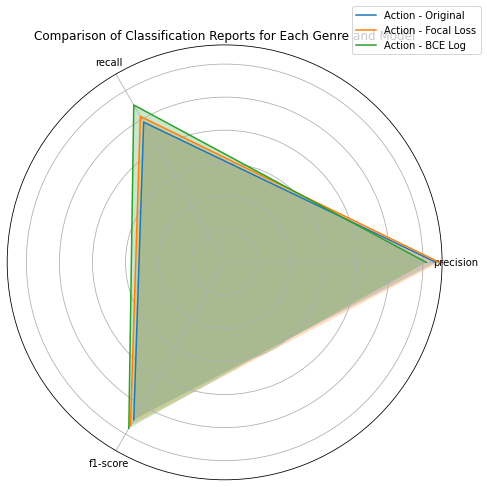

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Example classification report data (replace with your actual data)
classification_reports = {
    "Action": {
        "Original": {"precision": 0.64, "recall": 0.49, "f1-score": 0.55},
        "Focal Loss": {"precision": 0.65, "recall": 0.51, "f1-score": 0.57},
        "BCE Log": {"precision": 0.61, "recall": 0.55, "f1-score": 0.58}
    },
}

# Define metrics to plot
metrics = ["precision", "recall", "f1-score"]
genres = list(classification_reports.keys())  # Genres

# Number of categories (metrics)
num_metrics = len(metrics)

# Setup the radar chart
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()

# Create a figure
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot the data for each genre
for genre in genres:
    # Gather values for the three models (Original, Focal Loss, BCE Log)
    for model in ["Original", "Focal Loss", "BCE Log"]:
        values = [classification_reports[genre][model][metric] for metric in metrics]
        # values += values[:1]  # Repeat the first value to close the radar chart (this is important)
        
        # Now we ensure that the number of angles and values match
        ax.plot(angles, values, label=f"{genre} - {model}")
        ax.fill(angles, values, alpha=0.25)  # Filling the area for each genre/model

# Configure the radar chart
ax.set_yticklabels([])  # Hide the radial axis labels
ax.set_xticks(angles)  # Set the metric labels on the radial axis
ax.set_xticklabels(metrics)

# Add a title and legend
ax.set_title('Comparison of Classification Reports for Each Genre and Model')
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Show the chart
plt.show()


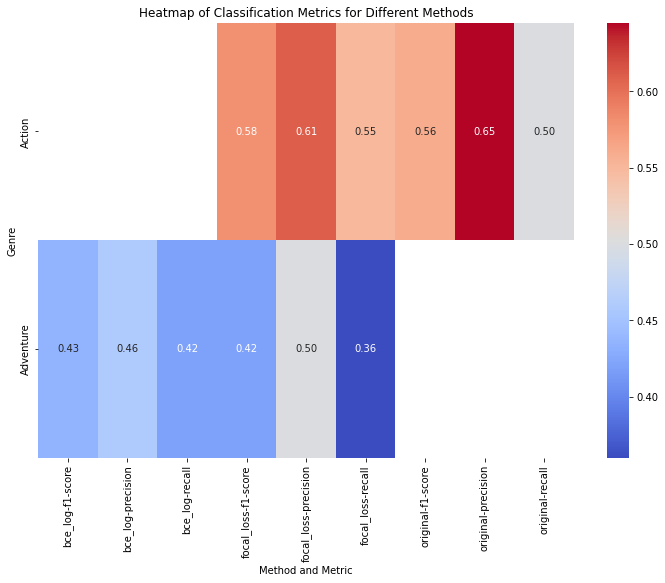

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data structure (Replace this with your actual data)
classification_reports = {
    "Action": {
        "original": {"precision": 0.64, "recall": 0.49, "f1-score": 0.55},
        "focal_loss": {"precision": 0.65, "recall": 0.51, "f1-score": 0.57},
        "bce_log": {"precision": 0.61, "recall": 0.55, "f1-score": 0.58}
    },
    "Adventure": {
        "original": {"precision": 0.50, "recall": 0.36, "f1-score": 0.42},
        "focal_loss": {"precision": 0.49, "recall": 0.35, "f1-score": 0.41},
        "bce_log": {"precision": 0.43, "recall": 0.49, "f1-score": 0.46}
    },
    # Add all other genres here...
}

# Create empty lists to store values
genres = []
metrics = ['precision', 'recall', 'f1-score']
methods = ['original', 'focal_loss', 'bce_log']
data = []

# Iterate through the classification reports and extract the values
for genre, methods_data in classification_reports.items():
    for method in methods:
        for metric in metrics:
            genres.append(genre)
            data.append(methods_data[method][metric])

# Create a DataFrame for the heatmap
df = pd.DataFrame({
    "genre": genres,
    "method": [method for method in methods for _ in classification_reports for _ in metrics],
    "metric": [metric for _ in methods for _ in classification_reports for metric in metrics],
    "value": data
})

# Pivot the DataFrame to get methods and metrics as columns
heatmap_data = df.pivot_table(index="genre", columns=["method", "metric"], values="value")

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title('Heatmap of Classification Metrics for Different Methods')
plt.xlabel('Method and Metric')
plt.ylabel('Genre')
plt.show()


In [63]:
import json

# Load data from the file
with open('models/distilbert_movie_genres/metrics/best_metrics.json', 'r') as file:
    data = json.load(file)

# Extract classification report
classification_report = data['classification_report']

# Create a sorted dictionary based on support value
sorted_genres = [genre for genre, stats in sorted(classification_report.items(), key=lambda x: x[1]['support'], reverse=True)]

# Output the sorted dictionary
print(sorted_genres)


['micro avg', 'macro avg', 'weighted avg', 'samples avg', 'Drama', 'Comedy', 'Action', 'Romance', 'Thriller', 'Crime', 'Horror', 'Adventure', 'Mystery', 'Family', 'Fantasy', 'Sci-Fi', 'Biography', 'Animation', 'Music', 'History', 'War', 'Musical', 'Film-Noir', 'Sport', 'Western']


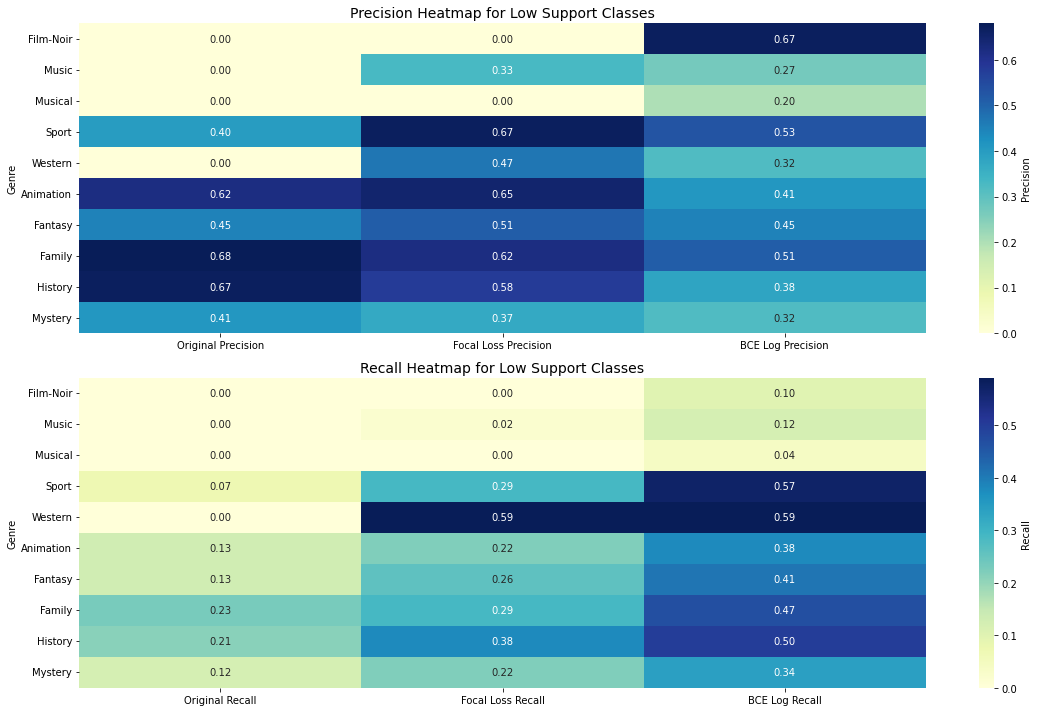

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the data
data = {
    'Genre': ['Film-Noir', 'Music', 'Musical', 'Sport', 'Western', 'Animation', 'Fantasy', 'Family', 'History', 'Mystery'],
    'Support': [40, 59, 48, 28, 17, 60, 107, 113, 58, 128],
    'Original Precision': [0.00, 0.00, 0.00, 0.40, 0.00, 0.62, 0.45, 0.68, 0.67, 0.41],
    'Focal Loss Precision': [0.00, 0.33, 0.00, 0.67, 0.47, 0.65, 0.51, 0.62, 0.58, 0.37],
    'BCE Log Precision': [0.67, 0.27, 0.20, 0.53, 0.32, 0.41, 0.45, 0.51, 0.38, 0.32],
    'Original Recall': [0.00, 0.00, 0.00, 0.07, 0.00, 0.13, 0.13, 0.23, 0.21, 0.12],
    'Focal Loss Recall': [0.00, 0.02, 0.00, 0.29, 0.59, 0.22, 0.26, 0.29, 0.38, 0.22],
    'BCE Log Recall': [0.10, 0.12, 0.04, 0.57, 0.59, 0.38, 0.41, 0.47, 0.50, 0.34]
}

# Create DataFrame
df = pd.DataFrame(data)

# Prepare data for heatmap
precision_data = df[['Genre', 'Original Precision', 'Focal Loss Precision', 'BCE Log Precision']].set_index('Genre')
recall_data = df[['Genre', 'Original Recall', 'Focal Loss Recall', 'BCE Log Recall']].set_index('Genre')

# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Create subplots
plt.subplot(2, 1, 1)
sns.heatmap(precision_data, annot=True, cmap='YlGnBu', fmt='.2f', cbar_kws={'label': 'Precision'})
plt.title('Precision Heatmap for Low Support Classes', fontsize=14)
plt.ylabel('Genre')

plt.subplot(2, 1, 2)
sns.heatmap(recall_data, annot=True, cmap='YlGnBu', fmt='.2f', cbar_kws={'label': 'Recall'})
plt.title('Recall Heatmap for Low Support Classes', fontsize=14)
plt.ylabel('Genre')

# Adjust layout and save
plt.tight_layout()

plt.savefig('performance_heatmap.svg', format='svg', bbox_inches='tight', facecolor='white')
plt.show()


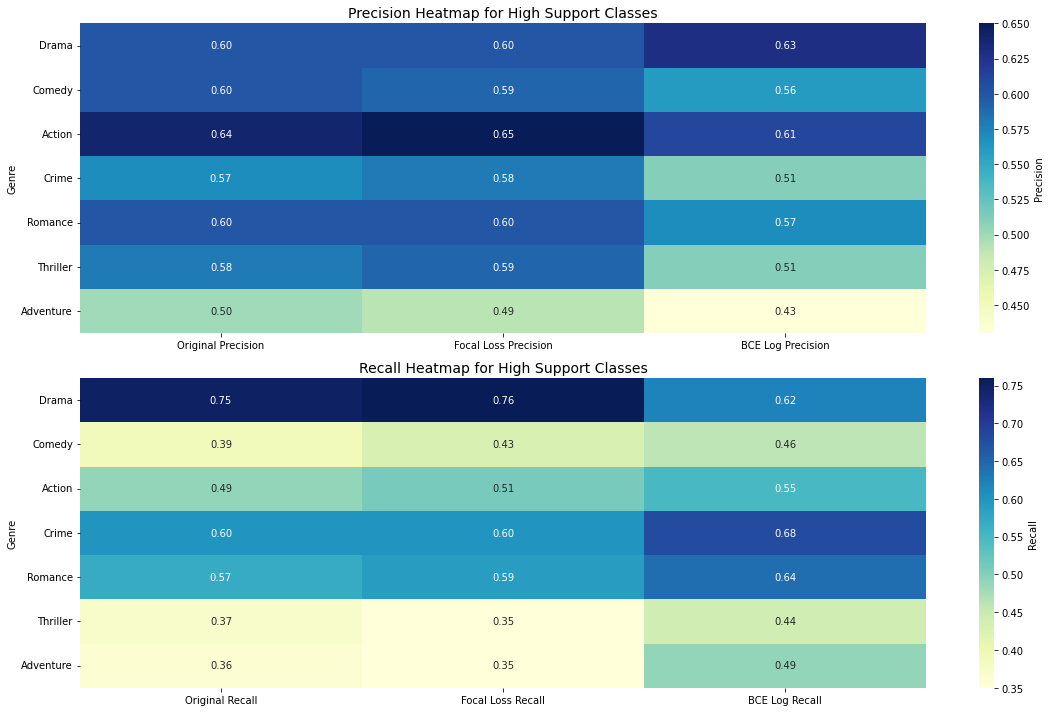

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the data
data = {
    'Genre': ['Drama', 'Comedy', 'Action', 'Crime', 'Romance', 'Thriller', 'Adventure'],
    'Support': [728, 371, 358, 282, 335, 329, 185],
    'Original Precision': [0.60, 0.60, 0.64, 0.57, 0.60, 0.58, 0.50],
    'Focal Loss Precision': [0.60, 0.59, 0.65, 0.58, 0.60, 0.59, 0.49],
    'BCE Log Precision': [0.63, 0.56, 0.61, 0.51, 0.57, 0.51, 0.43],
    'Original Recall': [0.75, 0.39, 0.49, 0.60, 0.57, 0.37, 0.36],
    'Focal Loss Recall': [0.76, 0.43, 0.51, 0.60, 0.59, 0.35, 0.35],
    'BCE Log Recall': [0.62, 0.46, 0.55, 0.68, 0.64, 0.44, 0.49]
}

# Create DataFrame
df = pd.DataFrame(data)

# Prepare data for heatmap
precision_data = df[['Genre', 'Original Precision', 'Focal Loss Precision', 'BCE Log Precision']].set_index('Genre')
recall_data = df[['Genre', 'Original Recall', 'Focal Loss Recall', 'BCE Log Recall']].set_index('Genre')

# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Create subplots
plt.subplot(2, 1, 1)
sns.heatmap(precision_data, annot=True, cmap='YlGnBu', fmt='.2f', cbar_kws={'label': 'Precision'})
plt.title('Precision Heatmap for High Support Classes', fontsize=14)
plt.ylabel('Genre')

plt.subplot(2, 1, 2)
sns.heatmap(recall_data, annot=True, cmap='YlGnBu', fmt='.2f', cbar_kws={'label': 'Recall'})
plt.title('Recall Heatmap for High Support Classes', fontsize=14)
plt.ylabel('Genre')

# Adjust layout and save
plt.tight_layout()

plt.savefig('performance_heatmap_high.svg', format='svg', bbox_inches='tight', facecolor='white')
plt.savefig('performance_heatmap_high.pdf', format='pdf', bbox_inches='tight')
plt.savefig('performance_heatmap_high.png', format='png', bbox_inches='tight')

plt.show()

In [1]:
import numpy as np
from sklearn.metrics import (
    jaccard_score,
    hamming_loss,
    accuracy_score,
    balanced_accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    multilabel_confusion_matrix,
    classification_report
)
import warnings


def signed_overlap(y_true, y_pred):
    """
    Compute signed overlap metric for multilabel classification.

    Args:
        y_true (np.ndarray): Ground truth (binary matrix, shape [n_samples, n_classes]).
        y_pred (np.ndarray): Predictions (binary matrix, shape [n_samples, n_classes]).

    Returns:
        float: Signed overlap score.
    """
    intersection = np.sum(np.logical_and(y_true, y_pred), axis=1)
    false_negatives = np.sum(np.logical_and(y_true, ~y_pred), axis=1)
    false_positives = np.sum(np.logical_and(~y_true, y_pred), axis=1)
    union = np.sum(np.logical_or(y_true, y_pred), axis=1)

    signed_overlap_score = np.mean(
        (intersection - false_negatives - false_positives) / (union + 1e-9))
    return signed_overlap_score


def single_signed_overlap(y_true, y_pred):
    # signed overlap for single observations
    intersection = np.sum(np.logical_and(y_true, y_pred))
    false_negatives = np.sum(np.logical_and(y_true, ~y_pred))
    false_positives = np.sum(np.logical_and(~y_true, y_pred))
    union = np.sum(np.logical_or(y_true, y_pred))

    signed_overlap_score = (
        intersection - false_negatives - false_positives) / (union + 1e-9)
    return signed_overlap_score


def at_least_k(y_true, y_pred, k: int = 1):
    """
    Compute the fraction of samples for which at least one label is predicted correctly.

    Args:
        y_true (np.ndarray): Ground truth (binary matrix, shape [n_samples, n_classes]).
        y_pred (np.ndarray): Predictions (binary matrix, shape [n_samples, n_classes]).

    Returns:
        float: Fraction of samples for which at least k label is predicted correctly
    """
    correct = np.sum(np.logical_and(y_true, y_pred), axis=1)
    at_least_k_score = np.mean(correct >= k)
    return at_least_k_score


def confusion_matrix(y_true, y_pred, plot=False):
    """
    Compute per label confusion matrix

    Args:
        y_true (np.ndarray): Ground truth (binary matrix, shape [n_samples, n_classes]).
        y_pred (np.ndarray): Predictions (binary matrix, shape [n_samples, n_classes]).

    Returns:
        float: list of confusion matrices.
    """

    cfm = multilabel_confusion_matrix(y_true, y_pred)
    return cfm


def score_per_sample(y_true, y_preds, metric: str = 'jaccard'):
    """
    Computes the Jaccard index per sample.

    Args:
        y_true (np.ndarray): Ground truth (binary matrix, shape [n_samples, n_classes]).
        y_pred (np.ndarray): Predictions (binary matrix, shape [n_samples, n_classes]).r.

    Returns:
        list: scores per sample
    """
    scores = []

    scorer = get_scorer(metric)
    for truth, pred in zip(y_true, y_preds):
        scores.append(scorer(truth, pred))

    return np.array(scores)


def get_scorer(metric: str):
    """
    Get the scorer function for a given metric.

    Args:
        metric (str): Name of the metric.

    Returns:
        function: Scorer function.
    """
    if metric == 'jaccard':
        return jaccard_score
    elif metric == 'hamming':
        return hamming_loss
    elif metric == 'accuracy':
        return accuracy_score
    elif metric == 'balanced_accuracy':
        return balanced_accuracy_score
    elif metric == 'f1':
        return f1_score
    elif metric == 'precision':
        return precision_score
    elif metric == 'recall':
        return recall_score
    else:
        raise ValueError(f"Invalid metric: {metric}")


def compute_metrics(y_true,
                    y_pred,
                    metrics_names=None):
    '''
    Get metrics for multilabel classification.

    Args:
        y_true (np.ndarray): Ground truth (binary matrix, shape [n_samples, n_classes]).
        y_pred (np.ndarray): Predictions (binary matrix, shape [n_samples, n_classes]).
        metrics_names (list[str]):  List of metrics to compute. Default: ['jaccard', 'hamming', 'accuracy', 'f1', 'precision', 'recall', ...].

    Returns:
        metrics (dict): Dictionary containing the computed metrics.
    '''

    if metrics_names is None:
        metrics_names = ['jaccard', 'hamming', 'accuracy', 'f1', 'precision', 'recall', 'at_least_one',
                         'at_least_two', 'signed_overlap', 'confusion_matrix', 'classification_report']

    if len(y_true.shape) == 1:
        averaging = 'binary'
    else:
        averaging = 'samples'
        warnings.filterwarnings("ignore")
    metrics = {}

    if 'jaccard' in metrics_names:
        metrics['jaccard'] = jaccard_score(y_true, y_pred, average=averaging)
    if 'hamming' in metrics_names:
        metrics['hamming'] = hamming_loss(y_true, y_pred)
    if 'accuracy' in metrics_names:
        metrics['accuracy'] = accuracy_score(y_true, y_pred)
    if 'balanced_accuracy' in metrics_names:
        metrics['balanced_accuracy'] = balanced_accuracy_score(y_true, y_pred)
    if 'f1' in metrics_names:
        metrics['f1'] = f1_score(y_true, y_pred, average=averaging)
    if 'precision' in metrics_names:
        metrics['precision'] = precision_score(
            y_true, y_pred, average=averaging)
    if 'recall' in metrics_names:
        metrics['recall'] = recall_score(y_true, y_pred, average=averaging)
    if 'at_least_one' in metrics_names:
        metrics['at_least_one'] = at_least_k(y_true, y_pred, 1)
    if 'at_least_two' in metrics_names:
        metrics['at_least_two'] = at_least_k(y_true, y_pred, 2)
    if 'signed_overlap' in metrics_names:
        metrics['signed_overlap'] = signed_overlap(y_true, y_pred)
    if 'confusion_matrix' in metrics_names:
        metrics['confusion_matrix'] = confusion_matrix(y_true, y_pred)
    if 'classification_report' in metrics_names:
        metrics['classification_report'] = classification_report(
            y_true, y_pred, target_names=UNIQUE_GENRES, output_dict=True)
    return metrics


In [41]:
UNIQUE_GENRES = ['Action',
                 'Adventure',
                 'Animation',
                 'Biography',
                 'Comedy',
                 'Crime',
                 'Family',
                 'Fantasy',
                 'Film-Noir',
                 'History',
                 'Horror',
                 'Music',
                 'Musical',
                 'Mystery',
                 'Romance',
                 'Sci-Fi',
                 'Sport',
                 'Thriller',
                 'War',
                 'Western']

In [49]:
import matplotlib.pyplot as plt

def plot_metrics_per_genre_distribution(y_true: np.ndarray,
                                        y_pred: np.ndarray,
                                        path: str, model,
                                        metric: str = 'jaccard'):
    '''
    Plots the distribution of metrics per genre. 
    '''
    log.info("Plotting metrics per genre distribution...")
    path = os.path.join(path, 'metrics_per_genre_distribution')
    if not os.path.exists(path):
        os.makedirs(path)
    genre_counts = np.sum(y_true, axis=0)
    metrics = score_per_sample(y_true, y_pred, metric=metric)
    metrics_per_genre = []
    for i in range(y_true.shape[1]):
        indices = y_true[:, i] == 1
        metrics_per_genre.append(np.mean(metrics[indices]))

    plt.figure(figsize=(10, 5))
    plt.scatter(genre_counts, metrics_per_genre)
    for i, txt in enumerate(UNIQUE_GENRES):
        plt.annotate(txt, (genre_counts[i], metrics_per_genre[i]))
    plt.xlabel('Number of samples per genre')
    plt.ylabel('Average Jaccard Score per genre')
    plt.title('Metrics per genre distribution')
    plt.tight_layout()
    filename = os.path.join(path, f'metrics_per_genre_distribution_{model}.svg')
    plt.savefig(filename, facecolor='white', format='svg')
    plt.close()

In [16]:
import pandas as pd
import numpy as np

# Assuming the data is already loaded into a DataFrame called df
# Example: df = pd.read_csv('data.csv')

def transform_y_true(y_true):
    # Convert string representation of list to an actual list
    y_true_list = eval(y_true)
    # Convert the list of strings to integers
    y_true_list = list(map(int, y_true_list))
    # Convert to numpy array for easier manipulation
    y_true_array = np.array(y_true_list)
    return y_true_array



In [73]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "res_log_reg.csv"
df = pd.read_csv(file_path)

# Define a function to parse the space-separated string into a list
def parse_array(array_str):
    # Remove brackets and split by spaces
    return list(map(int, array_str.strip('[]').split()))

# Apply parsing function to y_pred and y_true columns
y_pred_lr = np.array(df['y_pred'].apply(parse_array).tolist())
print(y_pred_lr)

# Assuming y_true is in the same format as y_pred
y_true_lr = np.array(df['y_true'].apply(parse_array).tolist())
print(y_true_lr)

# Confirm shapes
print("y_pred shape:", y_pred_lr.shape)
print("y_true shape:", y_true_lr.shape)

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[1 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]]
y_pred shape: (18813, 21)
y_true shape: (18813, 21)


In [72]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "res.csv"
df = pd.read_csv(file_path)

# Define a function to parse the space-separated string into a list
def parse_array(array_str):
    # Remove brackets and split by spaces
    return list(map(int, array_str.strip('[]').split()))

# Apply parsing function to y_pred and y_true columns
y_pred_dl = np.array(df['y_pred'].apply(parse_array).tolist())
print(y_pred_dl)

# Assuming y_true is in the same format as y_pred
y_true_dl = np.array(df['y_true'].apply(parse_array).tolist())
print(y_true_dl)

# Confirm shapes
print("y_pred shape:", y_true_dl.shape)
print("y_true shape:", y_true_dl.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[1 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]]
y_pred shape: (18813, 21)
y_true shape: (18813, 21)


In [31]:
# find if y_true_dl and y_true_lr are the same
are_same = np.array_equal(y_true_dl, y_true_lr)
print("Are y_true_dl and y_true_lr the same?", are_same)


Are y_true_dl and y_true_lr the same? True


In [78]:
def plot_metrics_per_genre_distribution_multi(y_true: np.ndarray,
                                        y_pred_lr: np.ndarray,
                                        y_pred_dl: np.ndarray,
                                        path: str, 
                                        metric: str = 'jaccard'):
    '''
    Plots the distribution of metrics per genre for two models. 
    
    Parameters:
    -----------
    y_true : np.ndarray
        True label matrix
    y_pred_lr : np.ndarray
        Predictions from Logistic Regression model
    y_pred_dl : np.ndarray
        Predictions from Deep Learning model
    path : str
        Base path to save the plot
    metric : str, optional
        Metric to use for evaluation (default is 'jaccard')
    '''
    log.info("Plotting metrics per genre distribution...")
    path = os.path.join(path, 'metrics_per_genre_distribution')
    if not os.path.exists(path):
        os.makedirs(path)
    
    # Genre counts based on true labels
    genre_counts = np.sum(y_true, axis=0)
    
    # Calculate metrics for both models
    metrics_lr = score_per_sample(y_true, y_pred_lr, metric=metric)
    metrics_dl = score_per_sample(y_true, y_pred_dl, metric=metric)
    
    # Calculate average metrics per genre for each model
    metrics_per_genre_lr = []
    metrics_per_genre_dl = []
    for i in range(y_true.shape[1]):
        indices = y_true[:, i] == 1
        metrics_per_genre_lr.append(np.mean(metrics_lr[indices]))
        metrics_per_genre_dl.append(np.mean(metrics_dl[indices]))

    plt.figure(figsize=(12, 5))
    
    for i in range(len(UNIQUE_GENRES)):
        plt.plot([genre_counts[i], genre_counts[i]], 
                    [metrics_per_genre_lr[i], metrics_per_genre_dl[i]], 
                    color='gray', 
                    linestyle='--', 
                    alpha=0.5)
        
         # Annotate the line with genre name
        plt.annotate(UNIQUE_GENRES[i], 
                     xy=(genre_counts[i], (metrics_per_genre_lr[i] + metrics_per_genre_dl[i]) / 2),
                     xytext=(-5, 0),
                     textcoords='offset points',
                     fontsize=8,
                     color='black',
                     ha='right',
                     va='center')
    
    print("scattering dl")
    # Scatter plot for Logistic Regression (default blue)
    plt.scatter(genre_counts, metrics_per_genre_lr, label='LogReg', color='tab:blue')
    print("scattering lr")
    
    # Scatter plot for Deep Learning (red)
    plt.scatter(genre_counts, metrics_per_genre_dl, label='DL', color='tab:red')
    print("annotatig")
    

    print("annotatig done")
    
    plt.xlabel('Number of samples per genre')
    plt.ylabel(f'Average {metric.capitalize()} Score per genre')
    plt.title('Metrics per Genre Distribution')
    plt.legend()
    plt.tight_layout()
    
    filename = os.path.join(path, f'metrics_per_genre_distribution.svg')
    plt.savefig(filename, facecolor='white', format='svg')
    plt.close()

In [79]:
plot_metrics_per_genre_distribution_multi(
    y_true,
    y_pred_lr, y_pred_dl,
    path='test',
    metric='jaccard'
)


INFO:root:Plotting metrics per genre distribution...


scattering dl
scattering lr
annotatig
annotatig done


In [50]:
import logging as log
import os
log.basicConfig(level=log.INFO)
plot_metrics_per_genre_distribution(y_true_dl, y_pred_dl, '', metric='jaccard', model='dl')
plot_metrics_per_genre_distribution(y_true_lr, y_pred_lr, '', metric='jaccard', model='lr')


INFO:root:Plotting metrics per genre distribution...
INFO:root:Plotting metrics per genre distribution...


In [108]:
def decode_genres(encoded_genre):
    '''
    Takes an encoded genre and return the correspondind genres as a list of strings.
    '''
    genres = UNIQUE_GENRES
    indices = np.where(encoded_genre == 1)[0]
    if len(indices) == 0:
        return []
    return [genres[i] for i in indices]


In [74]:

metrics_dl = np.array([jaccard_score(y_t, y_p) for y_t, y_p in zip(y_true_dl, y_pred_dl)])


In [75]:
metrics_lr = np.array([jaccard_score(y_t, y_p) for y_t, y_p in zip(y_true_lr, y_pred_lr)])

In [76]:
metrics_dl

array([0. , 0.5, 0. , ..., 0.5, 0. , 0. ])

In [289]:
# Count zeros
count_zeros = np.count_nonzero(metrics_lr >= 0.5)
# Count ones
count_ones = np.count_nonzero(metrics_lr <= 0.5)
count_onesminus = np.count_nonzero(metrics_lr == 0)

count_zeros, count_ones,  count_onesminus
6963/metrics_lr.shape[0]

0.37011640886620956

In [247]:
d = metrics_dl - metrics_lr

test_data = pd.read_csv("data/split/test.csv")
test_data['diff'] = d
test_data['y_true'] = [decode_genres(i) for i in y_true_dl]
test_data['y_pred'] = [decode_genres(i) for i in y_pred_dl]




# Assuming your DataFrame is named df
df_sorted = test_data.sort_values(by='diff', ascending=False).head(100)  # Sorting by 'diff' and getting top 100 rows

# Dropping the specified columns
df_top_100 = df_sorted.drop(columns=['genre', 'lemmatized_description'])

# Display the resulting DataFrame
print(df_top_100)

# Assuming 'y_true' is a column in your DataFrame
y_true_counts = df_top_100['y_true'].value_counts()

# Display the sorted list of most common values in 'y_true'
print(y_true_counts)


df_top_100.to_csv('top_100_diff.csv', index=False)


        movie_id                                        description  diff  \
13088  tt0133936  This short animated film deals with problems i...   1.0   
3341   tt0031062  In 1918 in Damascus a German garrison, allied ...   1.0   
16522  tt0448707  A supernatural story about a mystic events occ...   1.0   
11792  tt0102247  After his father is killed, King Valemon ascen...   1.0   
16574  tt0455822  Six different people all believe an unconsciou...   1.0   
...          ...                                                ...   ...   
291    tt0008485  In New York's notorious Pell Street district, ...   1.0   
15468  tt0311373  Ki-tae and Cheol-su hang out on their ragged o...   1.0   
15472  tt0311866  America's best player is being pulled in to th...   1.0   
15482  tt0312737  A North Korean spy arrives in the south via a ...   1.0   
15642  tt0335319  Toryo Liwanag can no longer remember how many ...   1.0   

                             y_true                        y_pred  
13088  

In [149]:
n_samples=90


In [151]:
bad_indices = np.argsort(metrics_dl)[:n_samples]
# get descriptions
test_data = pd.read_csv("data/split/test.csv")
X = test_data['description']
descriptions = X.iloc[bad_indices]
# get movie_ids
movie_ids = test_data['movie_id'].iloc[bad_indices]

for i, movie_id in enumerate(movie_ids):
    print(f"Movie ID: {movie_id}")
    print(f"Description: {descriptions.iloc[i]}")
    
if not isinstance(descriptions[0], str):
    descriptions = np.array(list(map(' '.join, descriptions)))



true_genres = [decode_genres(y_true_dl[i]) for i in bad_indices]
predicted_genres = [decode_genres(y_pred_dl[i]) for i in bad_indices]
results_dl = pd.DataFrame({
    "movie_id": movie_ids,
    "Description": descriptions,
    "True Labels": true_genres,
    "Predicted Labels": predicted_genres,
})

results_dl.to_csv("bad_qualitative_results_dl.csv", index=False)

Movie ID: tt0000574
Description: Story of Ned Kelly, an infamous 19th-century Australian outlaw.
Movie ID: tt0094249
Description: An adaptation of the homonym Pere Calders' work, a history full of other histories, centered in the reunion of his protagonist's first love.
Movie ID: tt0094124
Description: Lance Hayward, a silent movie star, appears as various characters, killing quite a handful of unfortunates, using various weapons.
Movie ID: tt0094046
Description: In a female-ruled society where men are kept solely for breeding, two women come to believe that their society's treatment of men is wrong, and lead them in a revolt against the system.
Movie ID: tt0094039
Description: Follows the 15-year-old, Heinz Stilke, a member of the Hitler Youth. Heinz is proud of his father, who died bravely for his fatherland, but suddenly learns that he himself is half Jewish. Heinz leaves his gymnasium and is forced to flee his classmates lest his secret be revealed.
Movie ID: tt0093984
Description:

In [301]:
bad_indices = np.argsort(metrics_dl)
# get descriptions
test_data = pd.read_csv("data/split/test.csv")
X = test_data['description']
descriptions = X.iloc[bad_indices]
# get movie_ids
movie_ids = test_data['movie_id'].iloc[bad_indices]

for i, movie_id in enumerate(movie_ids):
    print(f"Movie ID: {movie_id}")
    print(f"Description: {descriptions.iloc[i]}")
    
# if not isinstance(descriptions[0], str):
#     descriptions = np.array(list(map(' '.join, descriptions)))



true_genres = [decode_genres(y_true_dl[i]) for i in bad_indices]
predicted_genres = [decode_genres(y_pred_dl[i]) for i in bad_indices]
results_dl = pd.DataFrame({
    "movie_id": movie_ids,
    "Description": descriptions,
    "True Labels": true_genres,
    "Predicted Labels": predicted_genres,
})

genres_to_remove = {"Sport"}

# Drop rows where "True Labels" contains any of the genres to remove
filtered_df = results_dl[results_dl["Predicted Labels"].apply(lambda labels: any(genre in genres_to_remove for genre in labels))]
filtered_df.to_csv("good_qualitative_results_dl.csv", index=False)

Movie ID: tt0000574
Description: Story of Ned Kelly, an infamous 19th-century Australian outlaw.
Movie ID: tt0094249
Description: An adaptation of the homonym Pere Calders' work, a history full of other histories, centered in the reunion of his protagonist's first love.
Movie ID: tt0094124
Description: Lance Hayward, a silent movie star, appears as various characters, killing quite a handful of unfortunates, using various weapons.
Movie ID: tt0094046
Description: In a female-ruled society where men are kept solely for breeding, two women come to believe that their society's treatment of men is wrong, and lead them in a revolt against the system.
Movie ID: tt0094039
Description: Follows the 15-year-old, Heinz Stilke, a member of the Hitler Youth. Heinz is proud of his father, who died bravely for his fatherland, but suddenly learns that he himself is half Jewish. Heinz leaves his gymnasium and is forced to flee his classmates lest his secret be revealed.
Movie ID: tt0093984
Description:

In [152]:
bad_indices = np.argsort(metrics_lr)[:n_samples]
# get descriptions
test_data = pd.read_csv("data/split/test.csv")
X = test_data['lemmatized_description']
descriptions = X.iloc[bad_indices]
# get movie_ids
movie_ids = test_data['movie_id'].iloc[bad_indices]

for i, movie_id in enumerate(movie_ids):
    print(f"Movie ID: {movie_id}")
    print(f"Description: {descriptions.iloc[i]}")
    
if not isinstance(descriptions[0], str):
    descriptions = np.array(list(map(' '.join, descriptions)))

descriptions = descriptions.apply(lambda x: ' '.join(eval(x)))  # Join list into space-separated string


true_genres = [decode_genres(y_true_lr[i]) for i in bad_indices]
predicted_genres = [decode_genres(y_pred_lr[i]) for i in bad_indices]
results_lr = pd.DataFrame({
    "movie_id": movie_ids,
    "Description": descriptions,
    "True Labels": true_genres,
    "Predicted Labels": predicted_genres,
})

results_lr.to_csv("bad_qualitative_results_lreg.csv", index=False)

Movie ID: tt0000574
Description: ['Story', 'of', 'Ned', 'Kelly', ',', 'a', 'infamous', '19th', '-', 'century', 'Australian', 'outlaw', '.']
Movie ID: tt0092933
Description: ['3', 'punk', 'loving', 'dude', 'in', 'NYC', 'need', 'a', 'change', 'and', 'drive', 'a', 'VW', 'Beetle', 'to', 'California', '.', 'after', 'rednecks', 'kill', 'one', 'of', 'they', 'in', 'Arizona', ',', 'they', 'want', 'justice', '.', 'a', 'cute', 'girl', 'help', 'they', '.']
Movie ID: tt0092962
Description: ['Emmanuelle', 'have', 'a', 'streak', 'of', 'bad', 'luck', 'that', 'start', 'when', 'she', 'be', 'strip', 'by', 'a', 'mob', 'of', 'adore', 'fan', 'at', 'the', 'Cannes', 'Film', 'Festival', '.', 'her', 'rotten', 'luck', 'continue', 'when', 'the', 'dictator', 'of', 'a', 'banana', 'republic', 'use', 'the', 'screen', 'of', 'one', 'of', 'her', 'film', 'as', 'a', 'pretext', 'to', 'get', 'her', 'into', 'his', 'country', '.', 'our', 'heroine', 'find', 'herself', 'admit', 'into', 'his', 'harem', 'as', 'a', 'slave', '.']
M

In [154]:
# Find differences in movie_ids
dl_movie_ids = set(results_dl['movie_id'].dropna())
lr_movie_ids = set(results_lr['movie_id'].dropna())


print(len(dl_movie_ids))
print(len(lr_movie_ids))
# Find differences
dl_diff = dl_movie_ids - lr_movie_ids
lr_diff = lr_movie_ids - dl_movie_ids

# Find movie_ids in both res.csv and res_log_reg.csv
common_movie_ids = dl_movie_ids & lr_movie_ids  # Using set intersection

print(f"Movie IDs present in both res.csv and res_log_reg.csv: {common_movie_ids}")


print(f"Movie IDs in res.csv but not in res_log_reg.csv: {dl_diff}")
print(f"Movie IDs in res_log_reg.csv but not in res.csv: {lr_diff}")

90
90
Movie IDs present in both res.csv and res_log_reg.csv: {'tt0093210', 'tt0093199', 'tt0092705', 'tt0093903', 'tt0094039', 'tt0094658', 'tt0094124', 'tt0093379', 'tt0092841', 'tt0093959', 'tt0000574', 'tt0094046', 'tt0093685', 'tt0094373', 'tt0094249', 'tt0093984', 'tt0092755', 'tt0093897', 'tt0092754', 'tt0093117', 'tt0092971', 'tt0092917', 'tt0093637', 'tt0093608'}
Movie IDs in res.csv but not in res_log_reg.csv: {'tt0095431', 'tt0090199', 'tt0090779', 'tt0090142', 'tt0090362', 'tt0093201', 'tt0090386', 'tt0095322', 'tt0095010', 'tt0093118', 'tt0091120', 'tt0092892', 'tt0095243', 'tt0095424', 'tt0090326', 'tt0090310', 'tt0094752', 'tt0095512', 'tt0090694', 'tt0095162', 'tt0095448', 'tt0091278', 'tt0092872', 'tt0090675', 'tt0089949', 'tt0093699', 'tt0093578', 'tt0095483', 'tt0090915', 'tt0095560', 'tt0094914', 'tt0090755', 'tt0094857', 'tt0090192', 'tt0091149', 'tt0091072', 'tt0093798', 'tt0092937', 'tt0095076', 'tt0090274', 'tt0094656', 'tt0094974', 'tt0090126', 'tt0093346', 'tt0

In [155]:
len(common_movie_ids)

24

In [147]:
dl_df = results_dl
lr_df = results_lr
# Filter rows in dl.csv and lr.csv for common_movie_ids
common_dl_df = dl_df[dl_df['movie_id'].isin(common_movie_ids)]
common_lr_df = lr_df[lr_df['movie_id'].isin(common_movie_ids)]

# Print descriptions, true labels, and predicted labels for common movie_ids
for movie_id in common_movie_ids:
    # Get rows for this movie_id from both datasets
    dl_row = common_dl_df[common_dl_df['movie_id'] == movie_id]
    lr_row = common_lr_df[common_lr_df['movie_id'] == movie_id]
    
    # Extract values
    dl_description = dl_row['Description'].values[0]
    dl_true_labels = dl_row['True Labels'].values[0]
    dl_predicted_labels = dl_row['Predicted Labels'].values[0]

    lr_description = lr_row['Description'].values[0]
    lr_true_labels = lr_row['True Labels'].values[0]
    lr_predicted_labels = lr_row['Predicted Labels'].values[0]

    # Print information
    print(f"Movie ID: {movie_id}")
    print(f"  dl.csv - Description: {dl_description}")
    print(f"  dl.csv - True Labels: {dl_true_labels}")
    print(f"  dl.csv - Predicted Labels: {dl_predicted_labels}")
    print(f"  lr.csv - Predicted Labels: {lr_predicted_labels}")
    print("-" * 50)


Movie ID: tt0093210
  dl.csv - Description: A hobo (Julio Alemán) is given the power to know what will happen in the future, but only for 24 hours.
  dl.csv - True Labels: ['Drama', 'Fantasy']
  dl.csv - Predicted Labels: ['Sci-Fi']
  lr.csv - Predicted Labels: ['Thriller']
--------------------------------------------------
Movie ID: tt0093199
  dl.csv - Description: A film follows the surreal and often comic quests of young Andris, an orphan searching for a father who doesn't exist, and Orban, a government clerk who's had enough of oppressive bureaucracy.
  dl.csv - True Labels: ['Fantasy']
  dl.csv - Predicted Labels: ['Family']
  lr.csv - Predicted Labels: ['Adventure']
--------------------------------------------------
Movie ID: tt0092705
  dl.csv - Description: Mr. Yen Lieh-San is a ruthless nightclub owner who holds a grudge against King Gambler Lo Tien-Peh.
  dl.csv - True Labels: ['Crime', 'Drama', 'Thriller']
  dl.csv - Predicted Labels: ['Action']
  lr.csv - Predicted Labels:

In [90]:
# load res.csv, res_log_reg.csv, split/test.csv
# find movie_id in test.csv using descriptions in res.csv and res_log_reg.csv
# res.csv had the raw text description so it will be easy
# res_log_reg.csv has lemmatized description, you need to tranform it to a list so you can find it more easiily (or transfrom the list in test.csv to a string)
# find differences of movie_ids in res.csv and res_log_reg.csv
# append the movie_id to the res and res_log_reg dataframes and save

In [176]:
l = "In 2030 during World War III in which a small group of survivors make it into a bunker. Two years later they have to exit to find new supplies, but they are greeted by dinosaur predators."

test_data = pd.DataFrame({"description": [l], "genre": [np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])]})

classifier = MovieGenreClassifier(model_name="best",
                                      unique_genres=UNIQUE_GENRES, num_labels=len(UNIQUE_GENRES), seed=42069)
classifier.load_model("models/distilbert_movie_genres/best")
preds = classifier.test(test_data=test_data)


Map: 100%|██████████| 1/1 [00:00<00:00,  2.87 examples/s]
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
100%|██████████| 1/1 [00:00<00:00, 124.82it/s]


In [178]:
print(preds)

logits = preds[0] if isinstance(preds, tuple) else preds
probabilities = torch.sigmoid(torch.tensor(logits)).numpy()
y_pred = (probabilities > 0.45).astype(int)
print(probabilities)

print(y_pred)
# If no class is predicted as positive
no_positive_class = np.sum(y_pred, axis=1) == 0
# Put the the one with highest prob as positive
y_pred[no_positive_class, np.argmax(
    probabilities[no_positive_class], axis=1)] = 1
print(y_pred)


PredictionOutput(predictions=array([[-1.0432891 , -0.41229972, -1.7330832 , -4.593353  , -1.7202482 ,
        -4.2216477 , -2.3302586 , -2.9855366 , -1.5819829 , -5.3039083 ,
        -3.901197  , -2.1695046 , -4.5407095 , -4.2562637 , -3.3547556 ,
        -3.523267  ,  1.1117953 , -4.5680385 , -2.7568662 , -4.049157  ,
        -4.6414366 ]], dtype=float32), label_ids=array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0.]], dtype=float32), metrics={'test_loss': 0.1194150373339653, 'test_model_preparation_time': 0.011, 'test_runtime': 0.285, 'test_samples_per_second': 3.509, 'test_steps_per_second': 3.509})
[[0.26051587 0.39836082 0.15019362 0.01001751 0.1518392  0.01446222
  0.08864777 0.04808357 0.17051484 0.00494752 0.01981704 0.1025226
  0.01055328 0.01397704 0.03373978 0.02865741 0.7524637  0.01027169
  0.05970004 0.01713823 0.00955172]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]]


In [180]:
genre_counts = np.sum(y_true_dl, axis=0)
metrics = score_per_sample(y_true_dl, y_pred_dl, metric="jaccard")
metrics_per_genre = []
for i in range(y_true_dl.shape[1]):
    indices = y_true_dl[:, i] == 1
    metrics_per_genre.append(np.mean(metrics[indices]))

In [77]:
metrics_per_genre_dl = []
for i in range(y_true_dl.shape[1]):
    indices = y_true_dl[:, i] == 1
    metrics_per_genre_dl.append(np.mean(metrics_dl[indices]))

In [78]:
metrics_per_genre_lr = []
for i in range(y_true_dl.shape[1]):
    indices = y_true_dl[:, i] == 1
    metrics_per_genre_lr.append(np.mean(metrics_lr[indices]))

In [79]:
metrics_per_genre_lr

[0.35545243480654387,
 0.2651287032540068,
 0.20620272314674737,
 0.32574645129711205,
 0.315132173455498,
 0.32688080670745523,
 0.39506198749300436,
 0.26314857142857145,
 0.22060906233838568,
 0.29053819444444445,
 0.31463541666666667,
 0.40432119389687043,
 0.30466479137365216,
 0.26219399731723675,
 0.24488982653539612,
 0.42518924863178353,
 0.31758771929824564,
 0.29925213675213674,
 0.30966785290628707,
 0.3817089093701997,
 0.22941943900848014]

In [80]:
metrics_per_genre_dl

[0.4232302923682667,
 0.32175813501699857,
 0.20859808371154814,
 0.37415565345080765,
 0.3617503402994635,
 0.43014955812372535,
 0.4828457673309487,
 0.3299066666666667,
 0.2401559454191033,
 0.3736979166666667,
 0.34763020833333325,
 0.5152522552622786,
 0.3630567276136896,
 0.3271713615023474,
 0.2547233942803563,
 0.5254520229144289,
 0.4021345029239767,
 0.2767094017094017,
 0.37315904735833566,
 0.46139784946236556,
 0.26727549467275497]

In [ ]:
[0.4232302923682667,
 0.32175813501699857,
 0.20859808371154814,
 0.37415565345080765,
 0.3617503402994635,
 0.43014955812372535,
 0.4828457673309487,
 0.3299066666666667,
 0.2401559454191033,
 0.3736979166666667,
 0.34763020833333325,
 0.5152522552622786,
 0.3630567276136896,
 0.3271713615023474,
 0.2547233942803563,
 0.5254520229144289,
 0.4021345029239767,
 0.2767094017094017,
 0.37315904735833566,
 0.46139784946236556,
 0.26727549467275497]

In [81]:
diff = np.array(metrics_per_genre_dl) - np.array(metrics_per_genre_lr)

diff_dict = {genre: diff for genre, diff in zip(UNIQUE_GENRES, diff)}

genre_differences = sorted(diff_dict.items(), key=lambda x: x[1], reverse=True)

In [82]:
genre_differences

[('Horror', 0.11093106136540815),
 ('Crime', 0.10326875141627012),
 ('Romance', 0.1002627742826454),
 ('Drama', 0.08778377983794433),
 ('Sci-Fi', 0.08454678362573104),
 ('Film-Noir', 0.08315972222222223),
 ('War', 0.07968894009216587),
 ('Action', 0.06777785756172283),
 ('Family', 0.06675809523809523),
 ('Musical', 0.06497736418511063),
 ('Thriller', 0.0634911944520486),
 ('Music', 0.05839193624003747),
 ('Adventure', 0.05662943176299179),
 ('Biography', 0.048409202153695596),
 ('Comedy', 0.046618166843965525),
 ('Western', 0.03785605566427483),
 ('History', 0.03299479166666658),
 ('Fantasy', 0.019546883080717614),
 ('Mystery', 0.009833567744960164),
 ('Animation', 0.0023953605648007747),
 ('Sport', -0.022542735042735018)]

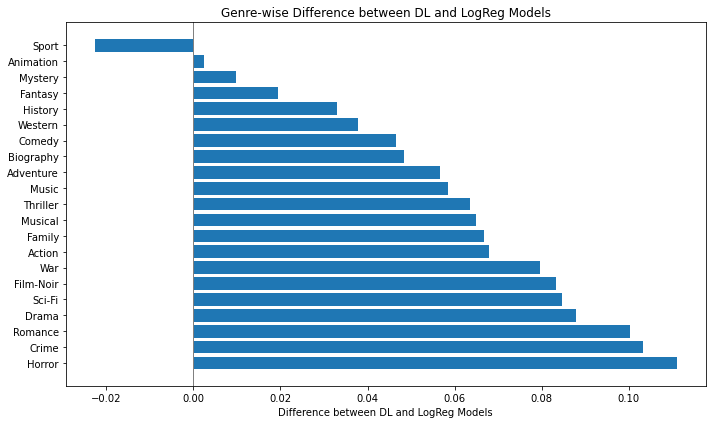

In [227]:
genres = [item[0] for item in genre_differences]
differences = [item[1] for item in genre_differences]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(genres, differences)
plt.xlabel('Difference between DL and LogReg Models')
plt.title('Genre-wise Difference between DL and LogReg Models')
plt.axvline(0, color='gray', linewidth=1)
plt.tight_layout()
plt.savefig('images/genre_scores_diff.svg', format='svg', bbox_inches='tight', facecolor='white')

plt.show()

[('Horror', 0.5152522552622786), ('Crime', 0.43014955812372535), ('Romance', 0.5254520229144289), ('Drama', 0.4828457673309487), ('Sci-Fi', 0.4021345029239767), ('Film-Noir', 0.3736979166666667), ('War', 0.46139784946236556), ('Action', 0.4232302923682667), ('Family', 0.3299066666666667), ('Musical', 0.3271713615023474), ('Thriller', 0.37315904735833566), ('Music', 0.3630567276136896), ('Adventure', 0.32175813501699857), ('Biography', 0.37415565345080765), ('Comedy', 0.3617503402994635), ('Western', 0.26727549467275497), ('History', 0.34763020833333325), ('Fantasy', 0.2401559454191033), ('Mystery', 0.2547233942803563), ('Animation', 0.20859808371154814), ('Sport', 0.2767094017094017)]
[('Horror', 0.40432119389687043), ('Crime', 0.32688080670745523), ('Romance', 0.42518924863178353), ('Drama', 0.39506198749300436), ('Sci-Fi', 0.31758771929824564), ('Film-Noir', 0.29053819444444445), ('War', 0.3817089093701997), ('Action', 0.35545243480654387), ('Family', 0.26314857142857145), ('Musical'

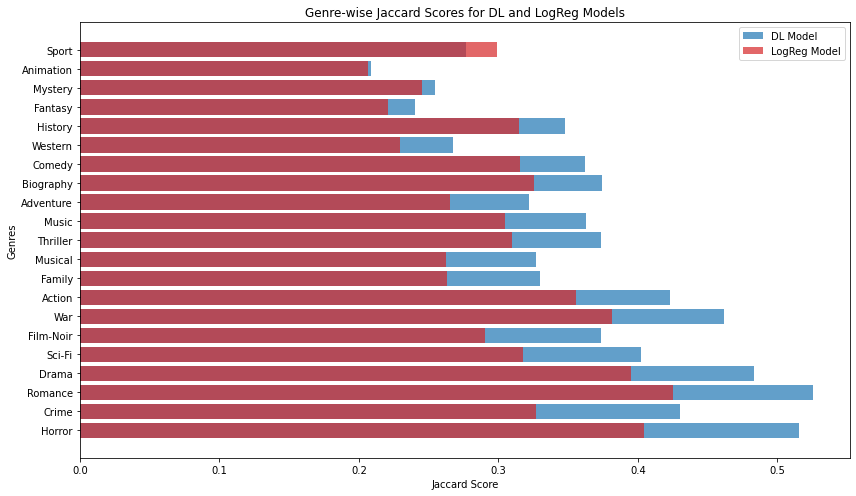

In [228]:
import matplotlib.pyplot as plt
import numpy as np


dl_dict = {genre: diff for genre, diff in zip(UNIQUE_GENRES, metrics_per_genre_dl)}
lr_dict = {genre: diff for genre, diff in zip(UNIQUE_GENRES, metrics_per_genre_lr)}

dl_list = [(key, dl_dict[key]) for key in genres]
lr_list = [(key, lr_dict[key]) for key in genres]


print(dl_list)
print(lr_list)
# Set positions for the bars
indices = np.arange(len(genres))
scores_dl = [item[1] for item in dl_list]
scores_lr = [item[1] for item in lr_list]

# Create the plot
plt.figure(figsize=(12, 7))

# Plot bars for DL and LogReg, with some transparency to see the overlap
plt.barh(indices, scores_dl, label='DL Model', color='tab:blue', alpha=0.7)
plt.barh(indices, scores_lr, label='LogReg Model', color='tab:red', alpha=0.7)

# Labels and title
plt.xlabel('Jaccard Score')
plt.ylabel('Genres')
plt.title('Genre-wise Jaccard Scores for DL and LogReg Models')
plt.yticks(indices, genres)
plt.legend()

# Adjust layout
plt.tight_layout()
plt.savefig('images/genre_wise_jaccard_scores.svg', format='svg', bbox_inches='tight', facecolor='white')

plt.show()


In [304]:
np.sum(y_true_dl, axis=0)

{genre: count for genre, count in zip(UNIQUE_GENRES, np.sum(y_true_dl, axis=0))}

{'Action': 3979,
 'Adventure': 2059,
 'Animation': 661,
 'Biography': 681,
 'Comedy': 4163,
 'Crime': 2942,
 'Drama': 7828,
 'Family': 1250,
 'Fantasy': 1197,
 'Film-Noir': 192,
 'History': 640,
 'Horror': 2993,
 'Music': 711,
 'Musical': 568,
 'Mystery': 1422,
 'Romance': 3724,
 'Sci-Fi': 1140,
 'Sport': 312,
 'Thriller': 3653,
 'War': 620,
 'Western': 219}

In [155]:
import numpy as np
from sklearn.metrics import (
    jaccard_score,
    hamming_loss,
    accuracy_score,
    balanced_accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    multilabel_confusion_matrix,
    classification_report
)
import warnings


def signed_overlap(y_true, y_pred):
    """
    Compute signed overlap metric for multilabel classification.

    Args:
        y_true (np.ndarray): Ground truth (binary matrix, shape [n_samples, n_classes]).
        y_pred (np.ndarray): Predictions (binary matrix, shape [n_samples, n_classes]).

    Returns:
        float: Signed overlap score.
    """
    intersection = np.sum(np.logical_and(y_true, y_pred), axis=1)
    false_negatives = np.sum(np.logical_and(y_true, ~y_pred), axis=1)
    false_positives = np.sum(np.logical_and(~y_true, y_pred), axis=1)
    union = np.sum(np.logical_or(y_true, y_pred), axis=1)

    signed_overlap_score = np.mean(
        (intersection - false_negatives - false_positives) / (union + 1e-9))
    return signed_overlap_score


def single_signed_overlap(y_true, y_pred):
    # signed overlap for single observations
    intersection = np.sum(np.logical_and(y_true, y_pred))
    false_negatives = np.sum(np.logical_and(y_true, ~y_pred))
    false_positives = np.sum(np.logical_and(~y_true, y_pred))
    union = np.sum(np.logical_or(y_true, y_pred))

    signed_overlap_score = (
        intersection - false_negatives - false_positives) / (union + 1e-9)
    return signed_overlap_score


def at_least_k(y_true, y_pred, k: int = 1):
    """
    Compute the fraction of samples for which at least one label is predicted correctly.

    Args:
        y_true (np.ndarray): Ground truth (binary matrix, shape [n_samples, n_classes]).
        y_pred (np.ndarray): Predictions (binary matrix, shape [n_samples, n_classes]).

    Returns:
        float: Fraction of samples for which at least k label is predicted correctly
    """
    correct = np.sum(np.logical_and(y_true, y_pred), axis=1)
    at_least_k_score = np.mean(correct >= k)
    return at_least_k_score


def confusion_matrix(y_true, y_pred, plot=False):
    """
    Compute per label confusion matrix

    Args:
        y_true (np.ndarray): Ground truth (binary matrix, shape [n_samples, n_classes]).
        y_pred (np.ndarray): Predictions (binary matrix, shape [n_samples, n_classes]).

    Returns:
        float: list of confusion matrices.
    """

    cfm = multilabel_confusion_matrix(y_true, y_pred)
    return cfm


def score_per_sample(y_true, y_preds, metric: str = 'jaccard'):
    """
    Computes the Jaccard index per sample.

    Args:
        y_true (np.ndarray): Ground truth (binary matrix, shape [n_samples, n_classes]).
        y_pred (np.ndarray): Predictions (binary matrix, shape [n_samples, n_classes]).r.

    Returns:
        list: scores per sample
    """
    scores = []

    scorer = get_scorer(metric)
    for truth, pred in zip(y_true, y_preds):
        scores.append(scorer(truth, pred))

    return np.array(scores)


def get_scorer(metric: str):
    """
    Get the scorer function for a given metric.

    Args:
        metric (str): Name of the metric.

    Returns:
        function: Scorer function.
    """
    if metric == 'jaccard':
        return jaccard_score
    elif metric == 'hamming':
        return hamming_loss
    elif metric == 'accuracy':
        return accuracy_score
    elif metric == 'balanced_accuracy':
        return balanced_accuracy_score
    elif metric == 'f1':
        return f1_score
    elif metric == 'precision':
        return precision_score
    elif metric == 'recall':
        return recall_score
    else:
        raise ValueError(f"Invalid metric: {metric}")


def compute_metrics(y_true,
                    y_pred,
                    metrics_names=None):
    '''
    Get metrics for multilabel classification.

    Args:
        y_true (np.ndarray): Ground truth (binary matrix, shape [n_samples, n_classes]).
        y_pred (np.ndarray): Predictions (binary matrix, shape [n_samples, n_classes]).
        metrics_names (list[str]):  List of metrics to compute. Default: ['jaccard', 'hamming', 'accuracy', 'f1', 'precision', 'recall', ...].

    Returns:
        metrics (dict): Dictionary containing the computed metrics.
    '''
    if metrics_names is None:
        metrics_names = ['jaccard', 'hamming', 'accuracy', 'f1', 'precision', 'recall', 'at_least_one',
                         'at_least_two', 'confusion_matrix', 'classification_report']

    if len(y_true.shape) == 1:
        averaging = 'binary'
    else:
        averaging = 'samples'
        warnings.filterwarnings("ignore")
    metrics = {}
    print(averaging, y_true.shape)
    if 'jaccard' in metrics_names:
        metrics['jaccard'] = jaccard_score(y_true, y_pred, average=averaging)
    if 'hamming' in metrics_names:
        metrics['hamming'] = hamming_loss(y_true, y_pred)
    if 'accuracy' in metrics_names:
        metrics['accuracy'] = accuracy_score(y_true, y_pred)
    if 'balanced_accuracy' in metrics_names:
        metrics['balanced_accuracy'] = balanced_accuracy_score(y_true, y_pred)
    if 'f1' in metrics_names:
        metrics['f1'] = f1_score(y_true, y_pred, average=averaging)
    if 'precision' in metrics_names:
        metrics['precision'] = precision_score(
            y_true, y_pred, average=averaging)
    if 'recall' in metrics_names:
        metrics['recall'] = recall_score(y_true, y_pred, average=averaging)
    if 'at_least_one' in metrics_names:
        metrics['at_least_one'] = at_least_k(y_true, y_pred, 1)
    if 'at_least_two' in metrics_names:
        metrics['at_least_two'] = at_least_k(y_true, y_pred, 2)
    if 'signed_overlap' in metrics_names:
        metrics['signed_overlap'] = signed_overlap(y_true, y_pred)
    if 'confusion_matrix' in metrics_names:
        metrics['confusion_matrix'] = confusion_matrix(y_true, y_pred)
    if 'classification_report' in metrics_names:
        metrics['classification_report'] = classification_report(
            y_true, y_pred, target_names=UNIQUE_GENRES, output_dict=True)
    return metrics

In [14]:
metrics = {}
metrics['classification_report'] = classification_report(y_true, y_pred, target_names=UNIQUE_GENRES, output_dict=True)

print(metrics)

{'classification_report': {'Action': {'precision': 0.6497652582159624, 'recall': 0.5217391304347826, 'f1-score': 0.5787566211318651, 'support': 3979.0}, 'Adventure': {'precision': 0.5236486486486487, 'recall': 0.3763963088878096, 'f1-score': 0.437976829612885, 'support': 2059.0}, 'Animation': {'precision': 0.8658536585365854, 'recall': 0.10741301059001512, 'f1-score': 0.1911170928667564, 'support': 661.0}, 'Biography': {'precision': 0.8340807174887892, 'recall': 0.27312775330396477, 'f1-score': 0.41150442477876104, 'support': 681.0}, 'Comedy': {'precision': 0.6251531237239689, 'recall': 0.36776363199615664, 'f1-score': 0.4630973986690865, 'support': 4163.0}, 'Crime': {'precision': 0.5727891156462585, 'recall': 0.5723997280761387, 'f1-score': 0.5725943556613396, 'support': 2942.0}, 'Drama': {'precision': 0.5828159423192469, 'recall': 0.7434849259070005, 'f1-score': 0.6534186594813068, 'support': 7828.0}, 'Family': {'precision': 0.5665529010238908, 'recall': 0.2656, 'f1-score': 0.3616557

c:\Users\pewdi\miniconda3\envs\test\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "models/distilbert_movie_genres/predictions/best_metrics_.csv"
df = pd.read_csv(file_path)

# Define a function to parse the space-separated string into a list
def parse_array(array_str):
    # Remove brackets and split by spaces
    return list(map(int, array_str.strip('[]').split()))

# Apply parsing function to y_pred and y_true columns
y_pred_dl = np.array(df['y_pred'].apply(parse_array).tolist())
print(y_pred_dl)

# Assuming y_true is in the same format as y_pred
y_true_dl = np.array(df['y_true'].apply(parse_array).tolist())
print(y_true_dl)

# Confirm shapes
print("y_pred shape:", y_true_dl.shape)

print("y_true shape:", y_true_dl.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
y_pred shape: (1674, 20)
y_true shape: (1674, 20)


In [21]:
cfm2 = confusion_matrix(y_true_dl, y_pred_dl)


In [17]:
cfm1=cfm

In [22]:
cfm1, cfm2

(array([[[1234,  101],
         [ 182,  176]],
 
        [[1442,   66],
         [ 119,   66]],
 
        [[1628,    5],
         [  52,    8]],
 
        [[1623,    8],
         [  45,   17]],
 
        [[1227,   95],
         [ 226,  145]],
 
        [[1282,  129],
         [ 112,  170]],
 
        [[ 592,  373],
         [ 179,  549]],
 
        [[1568,   12],
         [  87,   26]],
 
        [[1569,   17],
         [  93,   14]],
 
        [[1653,    0],
         [  40,    0]],
 
        [[1629,    6],
         [  46,   12]],
 
        [[1365,   59],
         [  81,  188]],
 
        [[1634,    0],
         [  59,    0]],
 
        [[1645,    0],
         [  48,    0]],
 
        [[1542,   23],
         [ 112,   16]],
 
        [[1231,  127],
         [ 145,  190]],
 
        [[1576,   15],
         [  50,   52]],
 
        [[1662,    3],
         [  26,    2]],
 
        [[1275,   89],
         [ 207,  122]],
 
        [[1627,    9],
         [  36,   21]],
 
        [[1676,    0

In [16]:
UNIQUE_GENRES = ['Action',
                 'Adventure',
                 'Animation',
                 'Biography',
                 'Comedy',
                 'Crime', 
                #  'Drama',
                 'Family',
                 'Fantasy',
                 'Film-Noir',
                 'History',
                 'Horror',
                 'Music',
                 'Musical',
                 'Mystery',
                 'Romance',
                 'Sci-Fi',
                 'Sport',
                 'Thriller',
                 'War',
                 'Western']

UNIQUE_GENRES_REDUCED = ['Action',
                         'Adventure',
                         'Crime',
                         'Family',
                         'Fantasy',
                         'Horror',
                         'Mystery',
                         'Romance',
                         'Sci-Fi',
                         'Thriller', 'War']

# UNIQUE_GENRES = UNIQUE_GENRES_REDUCED


In [13]:
import pandas as pd

def calculate_accuracy_difference(df1, df2, key_col='Genre', value_col='balanced_accuracy'):
    """
    Calculate the difference in balanced_accuracy for common genres between two dataframes.
    
    Parameters:
        df1 (pd.DataFrame): The first dataframe.
        df2 (pd.DataFrame): The second dataframe.
        key_col (str): The column name representing the unique identifier (e.g., 'genre').
        value_col (str): The column name representing the metric to compare (e.g., 'balanced_accuracy').
    
    Returns:
        pd.DataFrame: A new dataframe containing the key_col and the difference in value_col.
    """
    # Find common keys
    common_keys = set(df1[key_col]).intersection(set(df2[key_col]))
    
    # Filter dataframes for common keys
    df1_common = df1[df1[key_col].isin(common_keys)].set_index(key_col)
    df2_common = df2[df2[key_col].isin(common_keys)].set_index(key_col)
    
    # Ensure the indices align
    df1_common = df1_common.sort_index()
    df2_common = df2_common.sort_index()
    
    # Calculate the difference
    difference = df1_common[value_col] - df2_common[value_col]
    
    # Create the result dataframe
    result = difference.reset_index(name=f'{value_col}_diff')
    return result

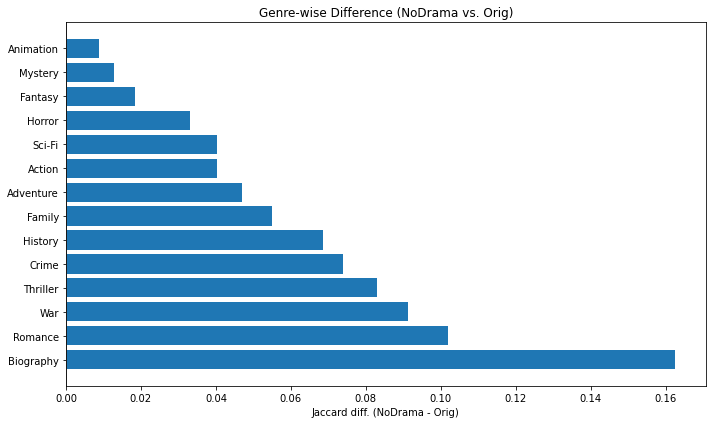

In [115]:
import matplotlib.pyplot as plt
# genres = [item[0] for item in genre_differences]
# differences = [item[1] for item in genre_differences]
result_no_drama = result_no_drama.sort_values(by='jaccard_diff', ascending=False)

result_no_drama = result_no_drama[result_no_drama['Genre'].isin(UNIQUE_GENRES_REDUCED)]
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(result_no_drama['Genre'], result_no_drama['jaccard_diff'])
plt.xlabel('Jaccard diff. (NoDrama - Orig)')
plt.title('Genre-wise Difference (NoDrama vs. Orig)')
plt.axvline(0, color='gray', linewidth=1)
plt.tight_layout()
plt.savefig('images/jaccard_diff_nodrama_orig_long_logregTfidf.svg', format='svg', bbox_inches='tight', facecolor='white')

plt.show()

# import matplotlib.pyplot as plt
# # genres = [item[0] for item in genre_differences]
# # differences = [item[1] for item in genre_differences]
# result_no_drama = result_no_drama.sort_values(by='precision_diff', ascending=False)

# # Create the bar plot
# plt.figure(figsize=(10, 6))
# plt.barh(result_no_drama['Genre'], result_no_drama['precision_diff'])
# plt.xlabel('Precision diff. (NoDrama - Orig)')
# plt.title('Genre-wise Difference (NoDrama vs. Orig)')
# plt.axvline(0, color='gray', linewidth=1)
# plt.tight_layout()
# # plt.savefig('images/genre_scores_diff.svg', format='svg', bbox_inches='tight', facecolor='white')

# plt.show()

# import matplotlib.pyplot as plt
# # genres = [item[0] for item in genre_differences]
# # differences = [item[1] for item in genre_differences]
# result_no_drama = result_no_drama.sort_values(by='recall_diff', ascending=False)

# # Create the bar plot
# plt.figure(figsize=(10, 6))
# plt.barh(result_no_drama['Genre'], result_no_drama['recall_diff'])
# plt.xlabel('Recall diff. (NoDrama - Orig)')
# plt.title('Genre-wise Difference (NoDrama vs. Orig)')
# plt.axvline(0, color='gray', linewidth=1)
# plt.tight_layout()
# # plt.savefig('images/genre_scores_diff.svg', format='svg', bbox_inches='tight', facecolor='white')

# plt.show()

# import matplotlib.pyplot as plt
# # genres = [item[0] for item in genre_differences]
# # differences = [item[1] for item in genre_differences]
# result_no_drama = result_no_drama.sort_values(by='balanced_accuracy_diff', ascending=False)

# # Create the bar plot
# plt.figure(figsize=(10, 6))
# plt.barh(result_no_drama['Genre'], result_no_drama['balanced_accuracy_diff'])
# plt.xlabel('Balanced_accuracy diff. (NoDrama - Orig)')
# plt.title('Genre-wise Difference (NoDrama vs. Orig)')
# plt.axvline(0, color='gray', linewidth=1)
# plt.tight_layout()
# # plt.savefig('images/genre_scores_diff.svg', format='svg', bbox_inches='tight', facecolor='white')

# plt.show()

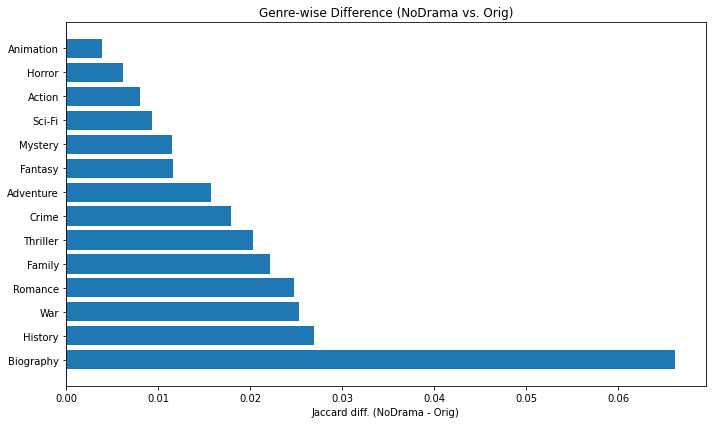

In [112]:
import matplotlib.pyplot as plt
# genres = [item[0] for item in genre_differences]
# differences = [item[1] for item in genre_differences]
result_no_drama = result_no_drama.sort_values(by='jaccard_diff', ascending=False)

result_no_drama = result_no_drama[result_no_drama['Genre'].isin(UNIQUE_GENRES_REDUCED)]
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(result_no_drama['Genre'], result_no_drama['jaccard_diff'])
plt.xlabel('Jaccard diff. (NoDrama - Orig)')
plt.title('Genre-wise Difference (NoDrama vs. Orig)')
plt.axvline(0, color='gray', linewidth=1)
plt.tight_layout()
plt.savefig('images/jaccard_diff_nodrama_orig_long_logregCount.svg', format='svg', bbox_inches='tight', facecolor='white')

plt.show()

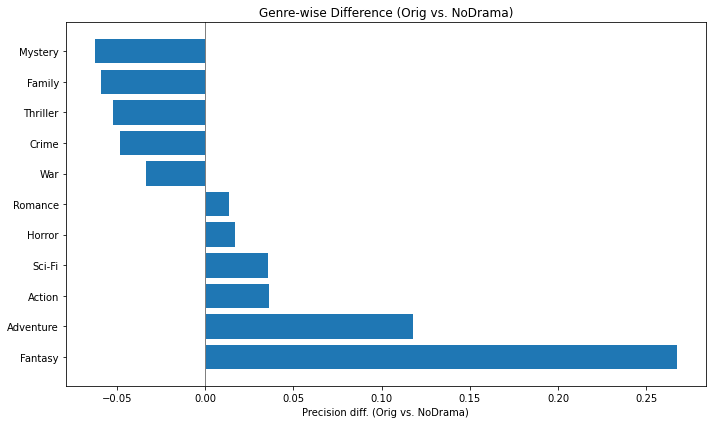

In [34]:
# genres = [item[0] for item in genre_differences]
# differences = [item[1] for item in genre_differences]
result = result.sort_values(by='precision_diff', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(result['Genre'], result['precision_diff'])
plt.xlabel('Precision diff. (Orig vs. Reduced)')
plt.title('Genre-wise Difference (Orig vs. Reduced)')
plt.axvline(0, color='gray', linewidth=1)
plt.tight_layout()
# plt.savefig('images/genre_scores_diff.svg', format='svg', bbox_inches='tight', facecolor='white')

plt.show()

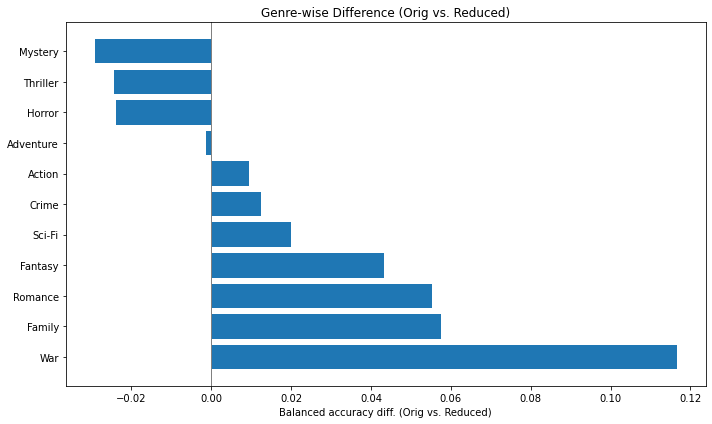

In [35]:
# genres = [item[0] for item in genre_differences]
# differences = [item[1] for item in genre_differences]
result = result.sort_values(by='balanced_accuracy_diff', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(result['Genre'], result['balanced_accuracy_diff'])
plt.xlabel('Balanced accuracy diff. (Orig vs. Reduced)')
plt.title('Genre-wise Difference (Orig vs. Reduced)')
plt.axvline(0, color='gray', linewidth=1)
plt.tight_layout()
# plt.savefig('images/genre_scores_diff.svg', format='svg', bbox_inches='tight', facecolor='white')

plt.show()

In [ ]:
# Set global font sizes for different elements
plt.rcParams['axes.labelsize'] = 12    # Font size for x and y labels
plt.rcParams['axes.titlesize'] = 14    # Font size for title
plt.rcParams['xtick.labelsize'] = 11   # Font size for x-axis ticks
plt.rcParams['ytick.labelsize'] = 11   # Font size for y-axis ticks
plt.rcParams['legend.fontsize'] = 11   # Font size for legend

In [224]:
metrics_orig.to_csv("metrics_orig.csv")
metrics_no_drama.to_csv("metrics_no_drama.csv")
metrics_reduced.to_csv("metrics_reduced.csv")
metrics_reduced_other.to_csv("metrics_reduced_other.csv")

In [672]:
import pandas as pd
metrics_orig = pd.read_csv("metrics_orig.csv")
metrics_no_drama = pd.read_csv("metrics_no_drama.csv")
metrics_reduced = pd.read_csv("metrics_reduced.csv")
metrics_reduced_other = pd.read_csv("metrics_reduced_other.csv")

In [125]:

# Calculate precision difference and initialize the result DataFrame
result_no_drama = calculate_accuracy_difference(metrics_no_drama, metrics_orig, value_col='precision')

# Add new columns for recall, balanced_accuracy, and jaccard
result_no_drama['recall_diff'] = calculate_accuracy_difference(metrics_no_drama, metrics_orig, value_col='recall')['recall_diff']
result_no_drama['balanced_accuracy_diff'] = calculate_accuracy_difference(metrics_no_drama, metrics_orig, value_col='balanced_accuracy')['balanced_accuracy_diff']
result_no_drama['jaccard_diff'] = calculate_accuracy_difference(metrics_no_drama, metrics_orig, value_col='jaccard')['jaccard_diff']
# result_no_drama['accuracy_diff'] = calculate_accuracy_difference(metrics_reduced, metrics_orig, value_col='jaccard')['jaccard_diff']

# Reset the index to ensure a clean DataFrame (optional)
result_no_drama.reset_index(inplace=True)
result_no_drama = result_no_drama.sort_values(by='jaccard_diff', ascending=False)
print(result_no_drama)

    index      Genre  precision_diff  recall_diff  balanced_accuracy_diff  \
16     16      Sport        0.060881     0.108974                0.054325   
3       3  Biography       -0.206154     0.145374                0.068716   
9       9    History       -0.055556     0.057813                0.027613   
6       6     Family       -0.069473     0.066400                0.029471   
18     18        War       -0.075174     0.101613                0.048251   
7       7    Fantasy       -0.063140     0.030911                0.013071   
14     14    Romance       -0.025110     0.045113                0.014040   
15     15     Sci-Fi       -0.042424     0.034211                0.015379   
17     17   Thriller       -0.009140     0.019984                0.006199   
4       4     Comedy       -0.029648     0.020178                0.003707   
19     19    Western        0.000000     0.000000                0.000000   
8       8  Film-Noir        0.000000     0.000000                0.000000   

In [110]:

# Calculate precision difference and initialize the result DataFrame
result_no_drama = calculate_accuracy_difference(metrics_no_drama_logreg, metrics_orig_logreg, value_col='precision')

# Add new columns for recall, balanced_accuracy, and jaccard
result_no_drama['recall_diff'] = calculate_accuracy_difference(metrics_no_drama_logreg, metrics_orig_logreg, value_col='recall')['recall_diff']
result_no_drama['balanced_accuracy_diff'] = calculate_accuracy_difference(metrics_no_drama_logreg, metrics_orig_logreg, value_col='balanced_accuracy')['balanced_accuracy_diff']
result_no_drama['jaccard_diff'] = calculate_accuracy_difference(metrics_no_drama_logreg, metrics_orig_logreg, value_col='jaccard')['jaccard_diff']
# result_no_drama['accuracy_diff'] = calculate_accuracy_difference(metrics_reduced, metrics_orig, value_col='jaccard')['jaccard_diff']

# Reset the index to ensure a clean DataFrame (optional)
result_no_drama.reset_index(inplace=True)
result_no_drama = result_no_drama.sort_values(by='jaccard_diff', ascending=False)
print(result_no_drama)

    index      Genre  precision_diff  recall_diff  balanced_accuracy_diff  \
3       3  Biography       -0.037726     0.102790                0.049685   
16     16      Sport        0.026542     0.044872                0.022355   
9       9    History       -0.023218     0.045312                0.021171   
18     18        War       -0.015057     0.046774                0.022480   
14     14    Romance       -0.036549     0.082438                0.025048   
6       6     Family       -0.026804     0.042400                0.018353   
17     17   Thriller       -0.019720     0.050643                0.013844   
5       5      Crime       -0.020325     0.048946                0.017196   
1       1  Adventure       -0.012170     0.034968                0.013515   
7       7    Fantasy       -0.011428     0.019215                0.008188   
13     13    Mystery       -0.007260     0.021800                0.008313   
4       4     Comedy       -0.027679     0.036032                0.006753   

In [114]:

# Calculate precision difference and initialize the result DataFrame
result_no_drama = calculate_accuracy_difference(metrics_no_drama_logreg_tdidf, metrics_orig_logreg_tdidf, value_col='precision')

# Add new columns for recall, balanced_accuracy, and jaccard
result_no_drama['recall_diff'] = calculate_accuracy_difference(metrics_no_drama_logreg_tdidf, metrics_orig_logreg_tdidf, value_col='recall')['recall_diff']
result_no_drama['balanced_accuracy_diff'] = calculate_accuracy_difference(metrics_no_drama_logreg_tdidf, metrics_orig_logreg_tdidf, value_col='balanced_accuracy')['balanced_accuracy_diff']
result_no_drama['jaccard_diff'] = calculate_accuracy_difference(metrics_no_drama_logreg_tdidf, metrics_orig_logreg_tdidf, value_col='jaccard')['jaccard_diff']
# result_no_drama['accuracy_diff'] = calculate_accuracy_difference(metrics_reduced, metrics_orig, value_col='jaccard')['jaccard_diff']

# Reset the index to ensure a clean DataFrame (optional)
result_no_drama.reset_index(inplace=True)
result_no_drama = result_no_drama.sort_values(by='jaccard_diff', ascending=False)
print(result_no_drama)

    index      Genre  precision_diff  recall_diff  balanced_accuracy_diff  \
3       3  Biography       -0.093514     0.182085                0.089443   
14     14    Romance       -0.138380     0.256713                0.085246   
18     18        War       -0.065277     0.119355                0.058028   
17     17   Thriller       -0.060444     0.136874                0.046801   
4       4     Comedy       -0.115269     0.138122                0.038310   
5       5      Crime       -0.040522     0.121686                0.050132   
9       9    History        0.243478     0.073438                0.035756   
6       6     Family       -0.053044     0.062400                0.029406   
1       1  Adventure       -0.126338     0.070423                0.028496   
0       0     Action       -0.114185     0.127419                0.034789   
15     15     Sci-Fi       -0.013681     0.047368                0.023118   
10     10     Horror       -0.060332     0.081858                0.032079   

In [71]:
resuls_to_save = result_no_drama[['Genre', 'jaccard_diff', 'precision_diff', 'recall_diff',]]
# round the values to 4 decimal places
resuls_to_save = resuls_to_save.round(4)
resuls_to_save.to_csv("results_no_drama_long.csv", index=False)

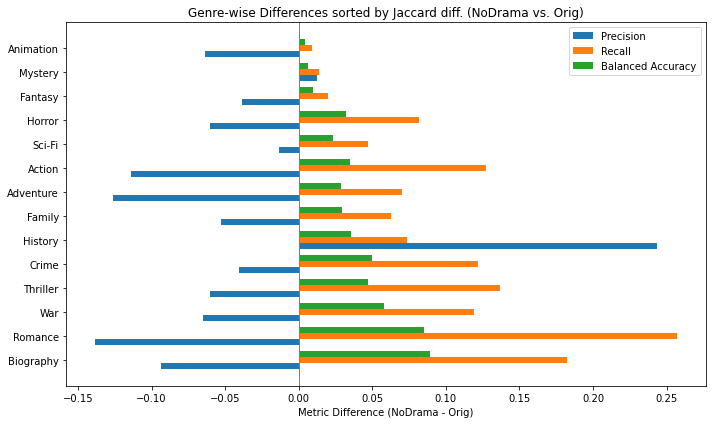

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

UNIQUE_GENRES_REDUCED = ['Action',
                         'Adventure',
                         'Animation',
                         'Biography',
                         'Crime',
                         'Family',
                         'Fantasy',
                         'History',
                         'Horror',
                         'Mystery',
                         'Romance',
                         'Sci-Fi',
                         'Thriller', 'War']

# UNIQUE_GENRES_REDUCED = [
#                          'Animation',
#                          'Biography',
#                          'History',
#                          'War']

# result = result.sort_values(by='precision', ascending=False)
result_no_drama = result_no_drama[result_no_drama['Genre'].isin(UNIQUE_GENRES_REDUCED)]

# Set positions for bars
x_labels = result_no_drama['Genre']
x = np.arange(len(x_labels))  # Label locations
width = 0.25  # Bar width

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(x - width, result_no_drama['precision_diff'], width, label='Precision')
plt.barh(x, result_no_drama['recall_diff'], width, label='Recall')
plt.barh(x + width, result_no_drama['balanced_accuracy_diff'], width, label='Balanced Accuracy')
# plt.barh(x + 1.5 * width, result['jaccard'], width, label='Jaccard')

# Add labels, title, and legend
plt.yticks(x, x_labels)
# plt.xlim(left=-0.1)
plt.xlabel('Metric Difference (NoDrama - Orig)')
plt.title('Genre-wise Differences sorted by Jaccard diff. (NoDrama vs. Orig)')
plt.axvline(0, color='gray', linewidth=1)  # Line for zero difference
plt.legend()
plt.tight_layout()

# Show or save the plot
plt.savefig('images/genre_metrics_diff_nodrama_orig_long_1_logregTdidf.svg', format='svg', bbox_inches='tight', facecolor='white')
plt.show()

In [14]:
# Calculate precision difference and initialize the result DataFrame
result = calculate_accuracy_difference(metrics_reduced, metrics_orig, value_col='precision')

# Add new columns for recall, balanced_accuracy, and jaccard
result['recall_diff'] = calculate_accuracy_difference(metrics_reduced, metrics_orig, value_col='recall')['recall_diff']
result['balanced_accuracy_diff'] = calculate_accuracy_difference(metrics_reduced, metrics_orig, value_col='balanced_accuracy')['balanced_accuracy_diff']
result['jaccard_diff'] = calculate_accuracy_difference(metrics_reduced, metrics_orig, value_col='jaccard')['jaccard_diff']
# result['accuracy_diff'] = calculate_accuracy_difference(metrics_reduced, metrics_orig, value_col='jaccard')['jaccard_diff']

# Reset the index to ensure a clean DataFrame (optional)
result.reset_index(inplace=True)
result = result.sort_values(by='jaccard_diff', ascending=False)
print(result)


    index      Genre  precision_diff  recall_diff  balanced_accuracy_diff  \
3       3     Family       -0.029981     0.209600                0.097473   
10     10        War       -0.060503     0.190323                0.091427   
8       8     Sci-Fi       -0.013066     0.092982                0.044518   
7       7    Romance        0.009375     0.089151                0.035356   
4       4    Fantasy        0.005748     0.069340                0.032308   
9       9   Thriller       -0.000373     0.050370                0.015006   
6       6    Mystery       -0.011044     0.023910                0.010415   
2       2      Crime       -0.044113     0.095853                0.026537   
0       0     Action        0.013742     0.014074                0.004361   
5       5     Horror        0.026587    -0.020381               -0.008322   
1       1  Adventure        0.072643    -0.035940               -0.012298   

    jaccard_diff  
3       0.134961  
10      0.090760  
8       0.061196  

In [59]:
# Calculate precision difference and initialize the result DataFrame
result = calculate_accuracy_difference(metrics_reduced_logreg, metrics_orig_logreg, value_col='precision')

# Add new columns for recall, balanced_accuracy, and jaccard
result['recall_diff'] = calculate_accuracy_difference(metrics_reduced_logreg, metrics_orig_logreg, value_col='recall')['recall_diff']
result['balanced_accuracy_diff'] = calculate_accuracy_difference(metrics_reduced_logreg, metrics_orig_logreg, value_col='balanced_accuracy')['balanced_accuracy_diff']
result['jaccard_diff'] = calculate_accuracy_difference(metrics_reduced_logreg, metrics_orig_logreg, value_col='jaccard')['jaccard_diff']
# result['accuracy_diff'] = calculate_accuracy_difference(metrics_reduced, metrics_orig, value_col='jaccard')['jaccard_diff']

# Reset the index to ensure a clean DataFrame (optional)
result.reset_index(inplace=True)
result = result.sort_values(by='jaccard_diff', ascending=False)
print(result)


    index      Genre  precision_diff  recall_diff  balanced_accuracy_diff  \
7       7    Romance       -0.006281     0.165414                0.059309   
3       3     Family        0.003772     0.099200                0.044768   
10     10        War        0.000493     0.083871                0.040436   
4       4    Fantasy        0.028986     0.058480                0.026547   
1       1  Adventure       -0.000999     0.058766                0.022356   
9       9   Thriller       -0.013398     0.067616                0.015608   
2       2      Crime       -0.027306     0.069001                0.020081   
8       8     Sci-Fi       -0.010641     0.039474                0.018171   
0       0     Action       -0.022930     0.059060                0.013856   
5       5     Horror       -0.027498     0.050785                0.016822   
6       6    Mystery       -0.007821     0.030942                0.010613   

    jaccard_diff  
7       0.077867  
3       0.060767  
10      0.051488  

In [93]:
# Calculate precision difference and initialize the result DataFrame
result = calculate_accuracy_difference(metrics_reduced_logreg_tdidf, metrics_orig_logreg_tdidf, value_col='precision')

# Add new columns for recall, balanced_accuracy, and jaccard
result['recall_diff'] = calculate_accuracy_difference(metrics_reduced_logreg_tdidf, metrics_orig_logreg_tdidf, value_col='recall')['recall_diff']
result['balanced_accuracy_diff'] = calculate_accuracy_difference(metrics_reduced_logreg_tdidf, metrics_orig_logreg_tdidf, value_col='balanced_accuracy')['balanced_accuracy_diff']
result['jaccard_diff'] = calculate_accuracy_difference(metrics_reduced_logreg_tdidf, metrics_orig_logreg_tdidf, value_col='jaccard')['jaccard_diff']
# result['accuracy_diff'] = calculate_accuracy_difference(metrics_reduced, metrics_orig, value_col='jaccard')['jaccard_diff']

# Reset the index to ensure a clean DataFrame (optional)
result.reset_index(inplace=True)
result = result.sort_values(by='jaccard_diff', ascending=False)
print(result)


    index      Genre  precision_diff  recall_diff  balanced_accuracy_diff  \
7       7    Romance       -0.125056     0.378357                0.130018   
10     10        War       -0.038961     0.130645                0.063654   
3       3     Family       -0.026368     0.107200                0.050849   
2       2      Crime       -0.042016     0.155337                0.061947   
9       9   Thriller       -0.063406     0.150014                0.047240   
1       1  Adventure       -0.107300     0.094220                0.039083   
0       0     Action       -0.113458     0.165620                0.044240   
8       8     Sci-Fi        0.011067     0.053509                0.026322   
5       5     Horror       -0.066921     0.100234                0.037286   
4       4    Fantasy       -0.052970     0.042607                0.019909   
6       6    Mystery       -0.018421     0.019691                0.008373   

    jaccard_diff  
7       0.160842  
10      0.103209  
3       0.093798  

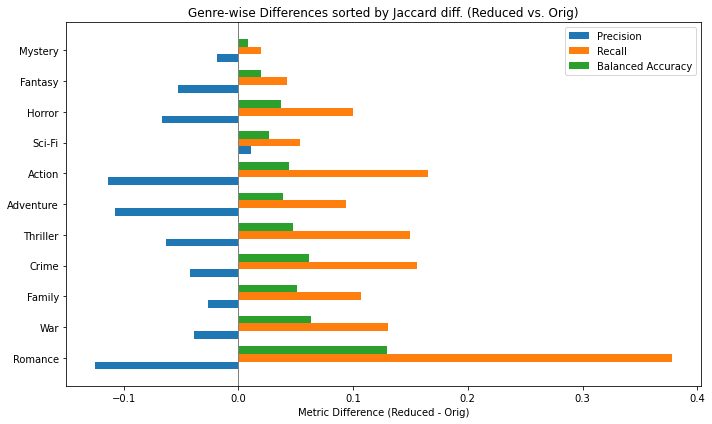

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# result = result.sort_values(by='precision', ascending=False)
result = result[result['Genre']!= 'Sport']

# Set positions for bars
x_labels = result['Genre']
x = np.arange(len(x_labels))  # Label locations
width = 0.25  # Bar width


# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(x - width, result['precision_diff'], width, label='Precision')
plt.barh(x, result['recall_diff'], width, label='Recall')
plt.barh(x + width, result['balanced_accuracy_diff'], width, label='Balanced Accuracy')
# plt.barh(x + 1.5 * width, result['jaccard'], width, label='Jaccard')

# Add labels, title, and legend
plt.yticks(x, x_labels)
plt.xlabel('Metric Difference (Reduced - Orig)')
plt.title('Genre-wise Differences sorted by Jaccard diff. (Reduced vs. Orig)')
plt.axvline(0, color='gray', linewidth=1)  # Line for zero difference
plt.legend()
plt.tight_layout()

# Show or save the plot
plt.savefig('images/genre_metrics_diff_reduced_orig1_logregTfidf.svg', format='svg', bbox_inches='tight', facecolor='white')
plt.show()


In [65]:

# Calculate precision difference and initialize the result DataFrame
result_no_drama_red = calculate_accuracy_difference(metrics_reduced, metrics_no_drama, value_col='precision')

# Add new columns for recall, balanced_accuracy, and jaccard
result_no_drama_red['recall_diff'] = calculate_accuracy_difference(metrics_reduced, metrics_no_drama, value_col='recall')['recall_diff']
result_no_drama_red['balanced_accuracy_diff'] = calculate_accuracy_difference(metrics_reduced, metrics_no_drama, value_col='balanced_accuracy')['balanced_accuracy_diff']
result_no_drama_red['jaccard_diff'] = calculate_accuracy_difference(metrics_reduced, metrics_no_drama, value_col='jaccard')['jaccard_diff']
# result_no_drama_red['accuracy_diff'] = calculate_accuracy_difference(metrics_reduced, metrics_orig, value_col='jaccard')['jaccard_diff']

# Reset the index to ensure a clean DataFrame (optional)
result_no_drama_red.reset_index(inplace=True)
result_no_drama_red = result_no_drama_red.sort_values(by='jaccard_diff', ascending=False)
print(result_no_drama_red)


    index      Genre  precision_diff  recall_diff  balanced_accuracy_diff  \
3       3     Family        0.039491     0.143200                0.068002   
10     10        War        0.014671     0.088710                0.043177   
8       8     Sci-Fi        0.029358     0.058772                0.029138   
7       7    Romance        0.034485     0.044039                0.021316   
6       6    Mystery        0.009351     0.042194                0.019126   
4       4    Fantasy        0.068888     0.038429                0.019237   
2       2      Crime       -0.031895     0.094154                0.027893   
0       0     Action        0.029571     0.012063                0.006423   
9       9   Thriller        0.008767     0.030386                0.008807   
5       5     Horror        0.060977    -0.036752               -0.011198   
1       1  Adventure        0.085199    -0.035940               -0.011193   

    jaccard_diff  
3       0.096524  
10      0.053542  
8       0.052248  

In [61]:

# Calculate precision difference and initialize the result DataFrame
result_no_drama_red = calculate_accuracy_difference(metrics_reduced_logreg, metrics_no_drama_logreg, value_col='precision')

# Add new columns for recall, balanced_accuracy, and jaccard
result_no_drama_red['recall_diff'] = calculate_accuracy_difference(metrics_reduced_logreg, metrics_no_drama_logreg, value_col='recall')['recall_diff']
result_no_drama_red['balanced_accuracy_diff'] = calculate_accuracy_difference(metrics_reduced_logreg, metrics_no_drama_logreg, value_col='balanced_accuracy')['balanced_accuracy_diff']
result_no_drama_red['jaccard_diff'] = calculate_accuracy_difference(metrics_reduced_logreg, metrics_no_drama_logreg, value_col='jaccard')['jaccard_diff']
# result_no_drama_red['accuracy_diff'] = calculate_accuracy_difference(metrics_reduced, metrics_orig, value_col='jaccard')['jaccard_diff']

# Reset the index to ensure a clean DataFrame (optional)
result_no_drama_red.reset_index(inplace=True)
result_no_drama_red = result_no_drama_red.sort_values(by='jaccard_diff', ascending=False)
print(result_no_drama_red)


    index      Genre  precision_diff  recall_diff  balanced_accuracy_diff  \
7       7    Romance        0.030268     0.082975                0.034261   
3       3     Family        0.030577     0.056800                0.026415   
4       4    Fantasy        0.040413     0.039265                0.018359   
10     10        War        0.015550     0.037097                0.017955   
0       0     Action        0.004714     0.025383                0.005680   
1       1  Adventure        0.011172     0.023798                0.008841   
8       8     Sci-Fi        0.006685     0.019298                0.008932   
5       5     Horror       -0.001934     0.021049                0.006410   
9       9   Thriller        0.006323     0.016972                0.001764   
2       2      Crime       -0.006981     0.020054                0.002885   
6       6    Mystery       -0.000561     0.009142                0.002300   

    jaccard_diff  
7       0.053103  
3       0.038587  
4       0.029518  

In [95]:

# Calculate precision difference and initialize the result DataFrame
result_no_drama_red = calculate_accuracy_difference(metrics_reduced_logreg_tdidf, metrics_no_drama_logreg_tdidf, value_col='precision')

# Add new columns for recall, balanced_accuracy, and jaccard
result_no_drama_red['recall_diff'] = calculate_accuracy_difference(metrics_reduced_logreg_tdidf, metrics_no_drama_logreg_tdidf, value_col='recall')['recall_diff']
result_no_drama_red['balanced_accuracy_diff'] = calculate_accuracy_difference(metrics_reduced_logreg_tdidf, metrics_no_drama_logreg_tdidf, value_col='balanced_accuracy')['balanced_accuracy_diff']
result_no_drama_red['jaccard_diff'] = calculate_accuracy_difference(metrics_reduced_logreg_tdidf, metrics_no_drama_logreg_tdidf, value_col='jaccard')['jaccard_diff']
# result_no_drama_red['accuracy_diff'] = calculate_accuracy_difference(metrics_reduced, metrics_orig, value_col='jaccard')['jaccard_diff']

# Reset the index to ensure a clean DataFrame (optional)
result_no_drama_red.reset_index(inplace=True)
result_no_drama_red = result_no_drama_red.sort_values(by='jaccard_diff', ascending=False)
print(result_no_drama_red)


    index      Genre  precision_diff  recall_diff  balanced_accuracy_diff  \
7       7    Romance        0.013324     0.121643                0.044773   
3       3     Family        0.026676     0.044800                0.021443   
4       4    Fantasy       -0.014764     0.022556                0.010480   
2       2      Crime       -0.001495     0.033651                0.011815   
0       0     Action        0.000728     0.038201                0.009450   
1       1  Adventure        0.019038     0.023798                0.010587   
10     10        War        0.026316     0.011290                0.005626   
5       5     Horror       -0.006589     0.018376                0.005207   
8       8     Sci-Fi        0.024747     0.006140                0.003204   
9       9   Thriller       -0.002962     0.013140                0.000439   
6       6    Mystery       -0.030921     0.005626                0.001916   

    jaccard_diff  
7       0.058833  
3       0.038820  
4       0.020177  

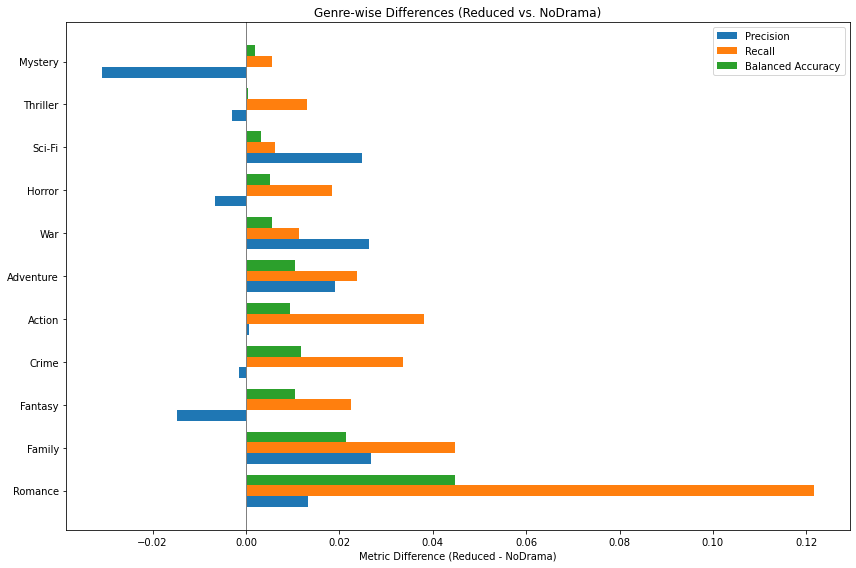

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# result_no_drama_red = result_no_drama_red.sort_values(by='precision', ascending=False)
result_no_drama_red = result_no_drama_red[result_no_drama_red['Genre']!= 'Sport']

# Set positions for bars
x_labels = result_no_drama_red['Genre']
x = np.arange(len(x_labels))  # Label locations
width = 0.25  # Bar width


# Create the plot
plt.figure(figsize=(12, 8))
plt.barh(x - width, result_no_drama_red['precision_diff'], width, label='Precision')
plt.barh(x, result_no_drama_red['recall_diff'], width, label='Recall')
plt.barh(x + width, result_no_drama_red['balanced_accuracy_diff'], width, label='Balanced Accuracy')
# plt.barh(x + 1.5 * width, result_no_drama_red['jaccard'], width, label='Jaccard')

# Add labels, title, and legend
plt.yticks(x, x_labels)
plt.xlabel('Metric Difference (Reduced - NoDrama)')
plt.title('Genre-wise Differences (Reduced vs. NoDrama)')
plt.axvline(0, color='gray', linewidth=1)  # Line for zero difference
plt.legend()
plt.tight_layout()

# Show or save the plot
plt.savefig('images/genre_metrics_diff_reduced_nodrama_logregTfidf.svg', format='svg', bbox_inches='tight', facecolor='white')
plt.show()


In [120]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "models/distilbert_movie_genres/predictions/best_preds_longtest.csv"
df = pd.read_csv(file_path)

# Define a function to parse the space-separated string into a list
def parse_array(array_str):
    # Remove brackets and split by spaces
    return list(map(int, array_str.strip('[]').split()))

# Apply parsing function to y_pred and y_true columns
y_pred_dl = np.array(df['y_pred'].apply(parse_array).tolist())
print(y_pred_dl)

# Assuming y_true is in the same format as y_pred
y_true_dl = np.array(df['y_true'].apply(parse_array).tolist())
print(y_true_dl)

# Confirm shapes
print("y_pred shape:", y_true_dl.shape)

print("y_true shape:", y_true_dl.shape)

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[1 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]]
y_pred shape: (18813, 21)
y_true shape: (18813, 21)


In [122]:
UNIQUE_GENRES = ['Action',
                 'Adventure',
                 'Animation',
                 'Biography',
                 'Comedy',
                 'Crime', 
                 'Drama',
                 'Family',
                 'Fantasy',
                 'Film-Noir',
                 'History',
                 'Horror',
                 'Music',
                 'Musical',
                 'Mystery',
                 'Romance',
                 'Sci-Fi',
                 'Sport',
                 'Thriller',
                 'War',
                 'Western']

UNIQUE_GENRES_REDUCED = ['Action',
                         'Adventure',
                         'Crime',
                         'Family',
                         'Fantasy',
                         'Horror',
                         'Mystery',
                         'Romance',
                         'Sci-Fi',
                         'Thriller', 'War']
# UNIQUE_GENRES = UNIQUE_GENRES_REDUCED


In [10]:
metrics_reduced = metrics_df

In [124]:
metrics_orig = metrics_df

In [119]:
metrics_no_drama = metrics_df

In [58]:
metrics_reduced_logreg = metrics_df

In [34]:
metrics_orig_logreg = metrics_df

In [38]:
metrics_no_drama_logreg = metrics_df

In [83]:
metrics_orig_logreg_tdidf = metrics_df

In [78]:
metrics_no_drama_logreg_tdidf = metrics_df

In [89]:
metrics_reduced_logreg_tdidf = metrics_df

In [175]:
DEV_FILE = "dev.csv"
TEST_FILE = "test.csv"

In [176]:
X, y_pred_logreg_count, y_true_logreg_count, classifier, text_model = fit_predict(MultiLabelClassifier("lreg", n_jobs=-1), BagOfWords("count", ngram_range=(1, 1)), lemmatized=True)

In [178]:
UNIQUE_GENRES = ['Action',
                    'Adventure',
                    'Animation',
                    'Biography',
                    'Comedy',
                    'Crime', 
                    'Drama',
                    'Family',
                    'Fantasy',
                    'Film-Noir',
                    'History',
                    'Horror',
                    'Music',
                    'Musical',
                    'Mystery',
                    'Romance',
                    'Sci-Fi',
                    'Sport',
                    'Thriller',
                    'War',
                    'Western']
                 
                 

results_logreg_orig_count = compute_metrics(y_true_logreg_count, y_pred_logreg_count)
results_logreg_orig_count

samples (18813, 21)


{'jaccard': 0.34569535250447386,
 'hamming': 0.09706560559694032,
 'accuracy': 0.09987774411311327,
 'f1': 0.4394874702481144,
 'precision': 0.5503346217028245,
 'recall': 0.4162821807615301,
 'at_least_one': 0.69016105884229,
 'at_least_two': 0.161430925423909,
 'confusion_matrix': array([[[13560,  1274],
         [ 2145,  1834]],
 
        [[16051,   703],
         [ 1512,   547]],
 
        [[18089,    63],
         [  538,   123]],
 
        [[18034,    98],
         [  501,   180]],
 
        [[13229,  1421],
         [ 2707,  1456]],
 
        [[14809,  1062],
         [ 1765,  1177]],
 
        [[ 7120,  3865],
         [ 2994,  4834]],
 
        [[17273,   290],
         [  994,   256]],
 
        [[17364,   252],
         [ 1035,   162]],
 
        [[18576,    45],
         [  186,     6]],
 
        [[18046,   127],
         [  542,    98]],
 
        [[15046,   774],
         [ 1267,  1726]],
 
        [[18014,    88],
         [  666,    45]],
 
        [[18179,    66],
   

In [174]:
results_logreg_orig_count = compute_metrics(y_true_logreg_count, y_pred_logreg_count)
results_logreg_orig_count

samples (18813, 20)


{'jaccard': 0.36110541596110085,
 'hamming': 0.08642162334555892,
 'accuracy': 0.16802211236910647,
 'f1': 0.432149754602314,
 'precision': 0.5160217225677279,
 'recall': 0.41685713779478734,
 'at_least_one': 0.6042098548875777,
 'at_least_two': 0.0721841279965981,
 'confusion_matrix': array([[[13303,  1531],
         [ 2011,  1968]],
 
        [[15918,   836],
         [ 1440,   619]],
 
        [[18071,    81],
         [  532,   129]],
 
        [[17972,   160],
         [  431,   250]],
 
        [[12899,  1751],
         [ 2557,  1606]],
 
        [[14578,  1293],
         [ 1621,  1321]],
 
        [[17173,   390],
         [  941,   309]],
 
        [[17314,   302],
         [ 1012,   185]],
 
        [[18572,    49],
         [  186,     6]],
 
        [[17992,   181],
         [  513,   127]],
 
        [[14905,   915],
         [ 1178,  1815]],
 
        [[18002,   100],
         [  662,    49]],
 
        [[18169,    76],
         [  531,    37]],
 
        [[16884,   507],


In [161]:
X, y_pred_logreg, y_true_logreg, classifier, text_model = fit_predict(MultiLabelClassifier("lreg", n_jobs=-1), BagOfWords("tf-idf", ngram_range=(1, 1)), lemmatized=True)

In [167]:
results_logreg_orig = compute_metrics(y_true_logreg, y_pred_logreg)
results_logreg_orig

samples (18813, 21)


{'jaccard': 0.31978684951894965,
 'hamming': 0.09225889898828823,
 'accuracy': 0.09583798437250837,
 'f1': 0.40745684974675567,
 'precision': 0.5928480306171264,
 'recall': 0.33786566027038034,
 'at_least_one': 0.632488173071812,
 'at_least_two': 0.07271567533088821,
 'confusion_matrix': array([[[14095,   739],
         [ 2430,  1549]],
 
        [[16606,   148],
         [ 1755,   304]],
 
        [[18150,     2],
         [  635,    26]],
 
        [[18124,     8],
         [  650,    31]],
 
        [[14129,   521],
         [ 3352,   811]],
 
        [[15393,   478],
         [ 2135,   807]],
 
        [[ 5947,  5038],
         [ 2011,  5817]],
 
        [[17523,    40],
         [ 1176,    74]],
 
        [[17586,    30],
         [ 1143,    54]],
 
        [[18621,     0],
         [  192,     0]],
 
        [[18166,     7],
         [  637,     3]],
 
        [[15334,   486],
         [ 1500,  1493]],
 
        [[18102,     0],
         [  711,     0]],
 
        [[18245,     0]

In [163]:
DEV_FILE = "dev_no_drama.csv"
TEST_FILE = "test_no_drama.csv"

In [164]:
X, y_pred_logreg_no_drama, y_true_logreg_no_drama, classifier, text_model = fit_predict(MultiLabelClassifier("lreg", n_jobs=-1), BagOfWords("tf-idf", ngram_range=(1, 1)), lemmatized=True)

In [170]:
UNIQUE_GENRES = ['Action',
                 'Adventure',
                 'Animation',
                 'Biography',
                 'Comedy',
                 'Crime', 
                #  'Drama',
                 'Family',
                 'Fantasy',
                 'Film-Noir',
                 'History',
                 'Horror',
                 'Music',
                 'Musical',
                 'Mystery',
                 'Romance',
                 'Sci-Fi',
                 'Sport',
                 'Thriller',
                 'War',
                 'Western']

results_logreg_no_drama = compute_metrics(y_true_logreg_no_drama, y_pred_logreg_no_drama)
results_logreg_no_drama

samples (18813, 20)


{'jaccard': 0.36427736139903255,
 'hamming': 0.08111678094934353,
 'accuracy': 0.18853983947270506,
 'f1': 0.4286073712959377,
 'precision': 0.5623460727511118,
 'recall': 0.37338542497209376,
 'at_least_one': 0.5765162387710626,
 'at_least_two': 0.018710466167012173,
 'confusion_matrix': array([[[13237,  1597],
         [ 1923,  2056]],
 
        [[16381,   373],
         [ 1610,   449]],
 
        [[18147,     5],
         [  629,    32]],
 
        [[18066,    66],
         [  526,   155]],
 
        [[13228,  1422],
         [ 2777,  1386]],
 
        [[15053,   818],
         [ 1777,  1165]],
 
        [[17460,   103],
         [ 1098,   152]],
 
        [[17565,    51],
         [ 1119,    78]],
 
        [[18621,     0],
         [  192,     0]],
 
        [[18131,    42],
         [  590,    50]],
 
        [[15054,   766],
         [ 1255,  1738]],
 
        [[18102,     0],
         [  711,     0]],
 
        [[18245,     0],
         [  568,     0]],
 
        [[17305,    86

In [130]:
results_balanced_classes = compute_metrics(y_true_logreg, y_pred_logreg)

In [140]:
results_balanced_classes_filtered = {k: v for k, v in results_balanced_classes.items() if k not in {'confusion_matrix', 'classification_report'}}
results_balanced_classes_filtered

{'jaccard': 0.3723977594014271,
 'hamming': 0.12751820549619944,
 'accuracy': 0.051453781959283476,
 'f1': 0.49685781124148204,
 'precision': 0.44535123888496553,
 'recall': 0.6537482946189692,
 'at_least_one': 0.8711529261680753,
 'at_least_two': 0.4207728698240578}

In [132]:
X, y_pred_logreg, y_true_logreg, classifier, text_model = fit_predict(MultiLabelClassifier("lreg", n_jobs=-1), BagOfWords("tf-idf", ngram_range=(1, 1)), lemmatized=True)

In [134]:
results_orig = compute_metrics(y_true_logreg, y_pred_logreg)

In [138]:
results_orig_filtered = {k: v for k, v in results_orig.items() if k not in {'confusion_matrix', 'classification_report'}}
results_orig_filtered

{'jaccard': 0.31978684951894965,
 'hamming': 0.09225889898828823,
 'accuracy': 0.09583798437250837,
 'f1': 0.40745684974675567,
 'precision': 0.5928480306171264,
 'recall': 0.33786566027038034,
 'at_least_one': 0.632488173071812,
 'at_least_two': 0.07271567533088821}

In [149]:
results_orig

{'jaccard': 0.31978684951894965,
 'hamming': 0.09225889898828823,
 'accuracy': 0.09583798437250837,
 'f1': 0.40745684974675567,
 'precision': 0.5928480306171264,
 'recall': 0.33786566027038034,
 'at_least_one': 0.632488173071812,
 'at_least_two': 0.07271567533088821,
 'confusion_matrix': array([[[14095,   739],
         [ 2430,  1549]],
 
        [[16606,   148],
         [ 1755,   304]],
 
        [[18150,     2],
         [  635,    26]],
 
        [[18124,     8],
         [  650,    31]],
 
        [[14129,   521],
         [ 3352,   811]],
 
        [[15393,   478],
         [ 2135,   807]],
 
        [[ 5947,  5038],
         [ 2011,  5817]],
 
        [[17523,    40],
         [ 1176,    74]],
 
        [[17586,    30],
         [ 1143,    54]],
 
        [[18621,     0],
         [  192,     0]],
 
        [[18166,     7],
         [  637,     3]],
 
        [[15334,   486],
         [ 1500,  1493]],
 
        [[18102,     0],
         [  711,     0]],
 
        [[18245,     0]

In [144]:
from itertools import product

def fit_and_evaluate(settings):
    """
    Fit and evaluate the model with the given settings.

    Args:
        settings (dict): Dictionary containing the settings to apply.

    Returns:
        dict: Filtered results for the current settings.
    """
    # Configure the classifier and vectorizer
    classifier = MultiLabelClassifier("lreg", n_jobs=-1, 
                                      class_weight=settings.get("class_weights", None))
    
    # Ensure sublinear_tf is explicitly True or False
    sublinear_tf_value = settings.get("sublinear_tf", False)  # Default to False if None
    if sublinear_tf_value not in [True, False]:
        sublinear_tf_value = False  # Force default to False if an invalid value is provided

    vectorizer = BagOfWords("tf-idf", 
                            ngram_range=(1, 1),
                            stop_words=settings.get("stop_words", None),
                            sublinear_tf=sublinear_tf_value)

    # Fit and predict
    X, y_pred_logreg, y_true_logreg, _, _ = fit_predict(classifier, vectorizer, lemmatized=True)

    # Compute metrics
    results = compute_metrics(y_true_logreg, y_pred_logreg)
    print(results)
    return {k: v for k, v in results.items() if k not in {'confusion_matrix', 'classification_report'}}

# Define the settings to test
setting_combinations = list(product([False, True], repeat=3))
keys = ["stop_words", "sublinear_tf", "class_weights"]

# Store results in a dictionary
results_dict = {}
for combination in setting_combinations[1:]:  # Skip first since you already ran it
    settings = {keys[i]: ("english" if keys[i] == "stop_words" else "balanced" if keys[i] == "class_weights" else True) 
                if combination[i] else None for i in range(3)}
    settings_key = "_".join(f"{k}={v}" for k, v in settings.items() if v is not None)
    results_dict[settings_key] = fit_and_evaluate(settings)

# Display results
results_dict


{'jaccard': 0.3723977594014271, 'hamming': 0.12751820549619944, 'accuracy': 0.051453781959283476, 'f1': 0.49685781124148204, 'precision': 0.44535123888496553, 'recall': 0.6537482946189692, 'at_least_one': 0.8711529261680753, 'at_least_two': 0.4207728698240578, 'confusion_matrix': array([[[12181,  2653],
        [ 1283,  2696]],

       [[14049,  2705],
        [  852,  1207]],

       [[17440,   712],
        [  334,   327]],

       [[17311,   821],
        [  263,   418]],

       [[11232,  3418],
        [ 1615,  2548]],

       [[13365,  2506],
        [  960,  1982]],

       [[ 7072,  3913],
        [ 2579,  5249]],

       [[15884,  1679],
        [  535,   715]],

       [[15974,  1642],
        [  623,   574]],

       [[17838,   783],
        [  124,    68]],

       [[17113,  1060],
        [  268,   372]],

       [[14212,  1608],
        [  738,  2255]],

       [[17344,   758],
        [  515,   196]],

       [[17471,   774],
        [  393,   175]],

       [[15070,  23

{'class_weights=balanced': {'jaccard': 0.3723977594014271,
  'hamming': 0.12751820549619944,
  'accuracy': 0.051453781959283476,
  'f1': 0.49685781124148204,
  'precision': 0.44535123888496553,
  'recall': 0.6537482946189692,
  'at_least_one': 0.8711529261680753,
  'at_least_two': 0.4207728698240578},
 'sublinear_tf=True': {'jaccard': 0.32269795708641186,
  'hamming': 0.09185897289867949,
  'accuracy': 0.09743262637537872,
  'f1': 0.41074586215712033,
  'precision': 0.596130335406368,
  'recall': 0.3411479650596219,
  'at_least_one': 0.6366873970127039,
  'at_least_two': 0.07478870993461968},
 'sublinear_tf=True_class_weights=balanced': {'jaccard': 0.37456195859161895,
  'hamming': 0.12673354038367593,
  'accuracy': 0.05304842396215383,
  'f1': 0.49907385738991544,
  'precision': 0.44781989657607585,
  'recall': 0.6559010613228441,
  'at_least_one': 0.8721628661032265,
  'at_least_two': 0.42364322542922445},
 'stop_words=english': {'jaccard': 0.31950601534399975,
  'hamming': 0.0922791

In [156]:
results = compute_metrics(y_true_dl, y_pred_dl)

samples (18813, 21)


binary (18813,)
binary (18813,)
binary (18813,)
binary (18813,)
binary (18813,)
binary (18813,)
binary (18813,)
binary (18813,)
binary (18813,)
binary (18813,)
binary (18813,)
binary (18813,)
binary (18813,)
binary (18813,)
binary (18813,)
binary (18813,)
binary (18813,)
binary (18813,)
binary (18813,)
binary (18813,)
Metric      Genre  balanced_accuracy   jaccard  precision    recall   support
0          Action           0.704527  0.368723   0.562825  0.516713  0.120117
1       Adventure           0.597902  0.184622   0.546229  0.218067  0.062157
2       Animation           0.524068  0.048048   0.864865  0.048411  0.019954
3       Biography           0.611983  0.207497   0.701357  0.227606  0.020558
4          Comedy           0.617934  0.248165   0.493590  0.332933  0.125672
5           Crime           0.672224  0.309840   0.587494  0.395989  0.088812
6          Family           0.557868  0.112343   0.596078  0.121600  0.037735
7         Fantasy           0.531134  0.062500   0.60465

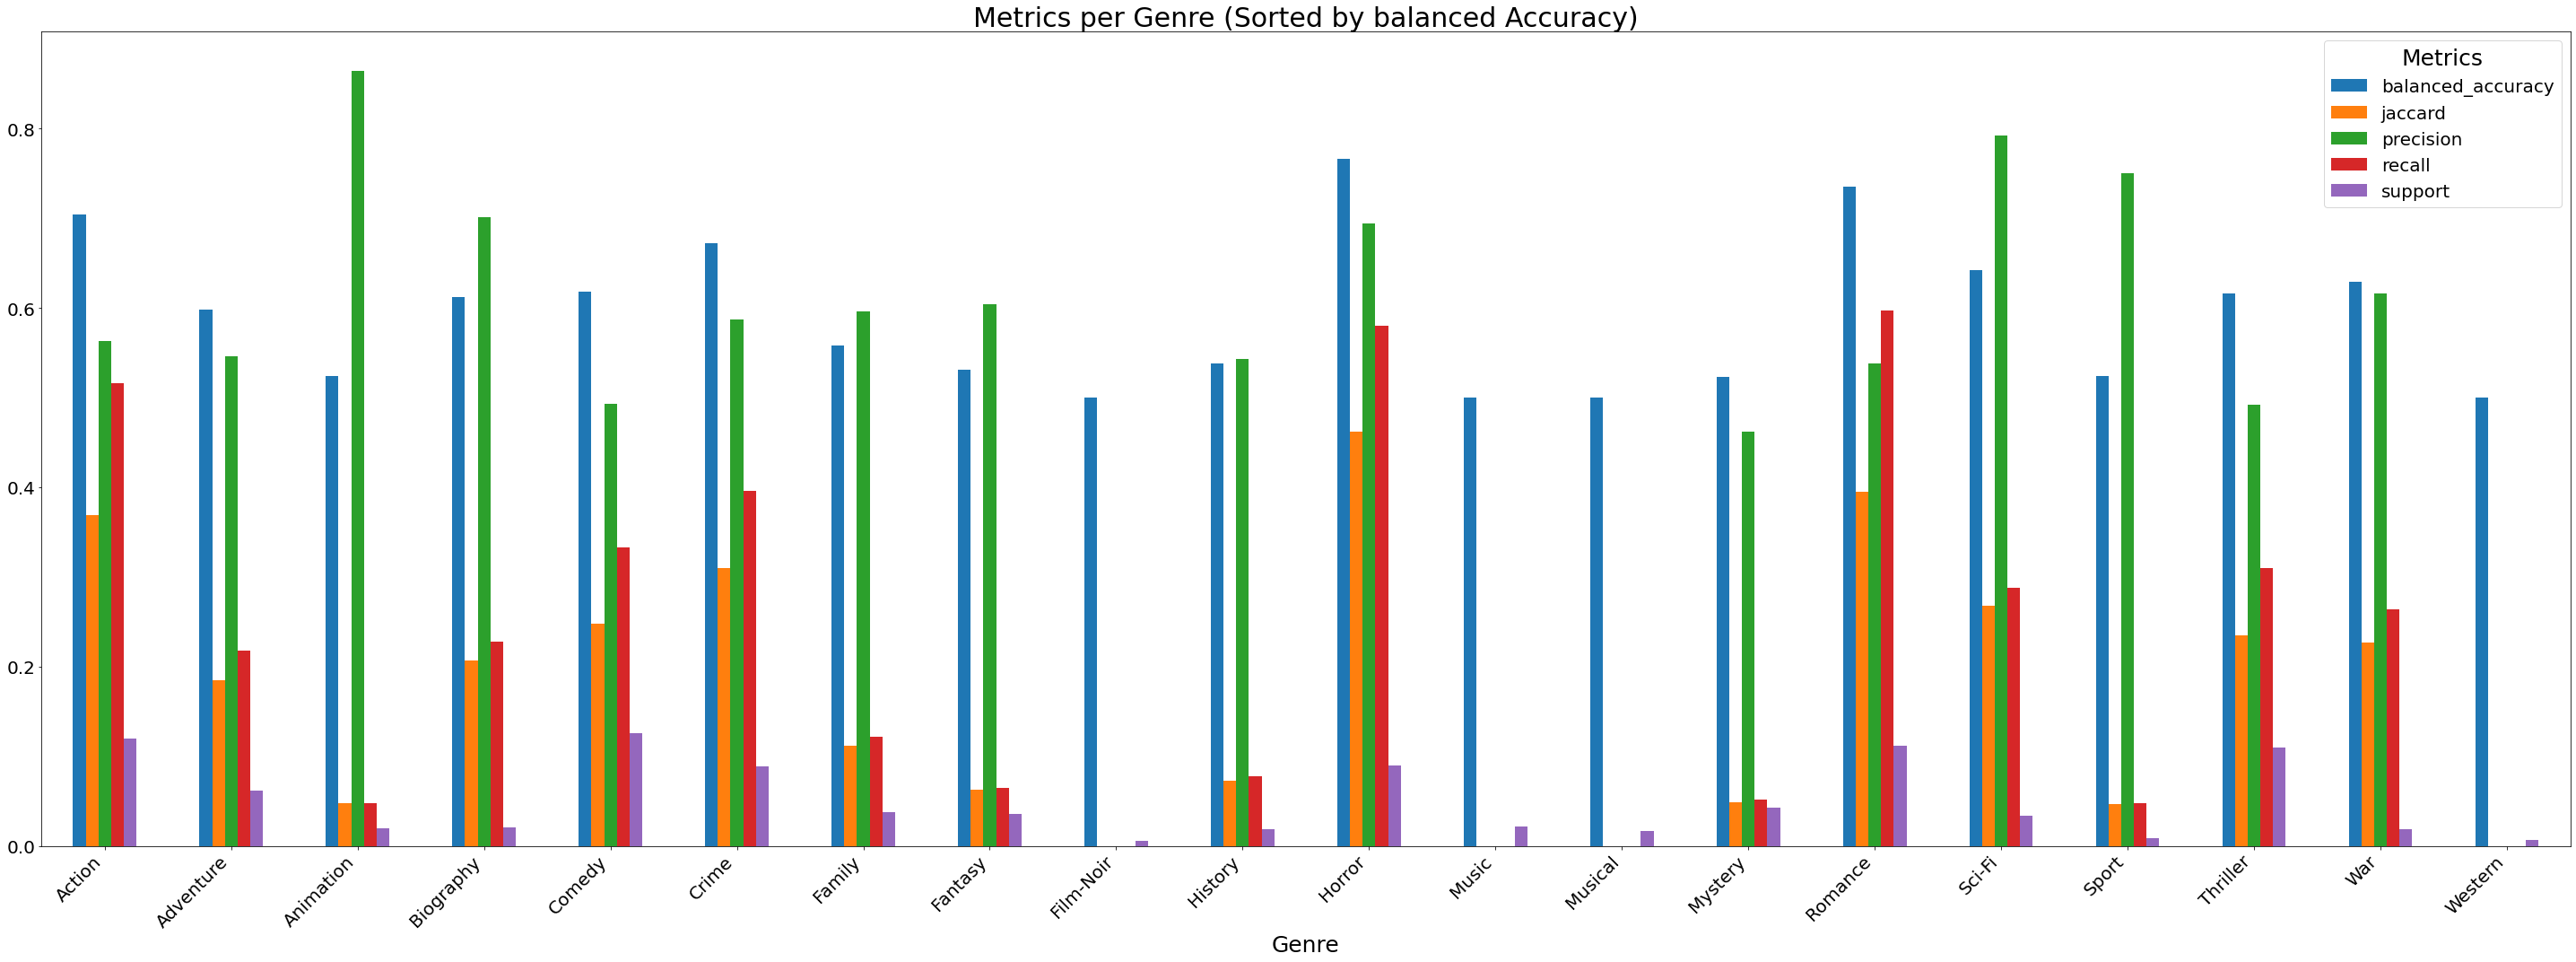

In [171]:
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd

y_true = y_true_logreg_no_drama
y_pred = y_pred_logreg_no_drama

metrics_names = ['precision', 'recall', 'balanced_accuracy', 'jaccard']

genres = UNIQUE_GENRES

metrics = defaultdict(list)
genre_occurences = []

for i, genre in enumerate(genres):
    y_true_genre = y_true[:, i]
    y_pred_genre = y_pred[:, i]
    metrics_genre = compute_metrics(y_true_genre, y_pred_genre, metrics_names)
    metrics[genre] = metrics_genre
    genre_occurences.append(np.sum(y_true_genre))

genre_occurences = np.array(genre_occurences) / np.sum(genre_occurences)
# turn into dataframe containing columns: genre, [metrics_names]
metrics_df = pd.DataFrame(metrics).T.reset_index().rename(columns={'index': 'Genre'})
metrics_df = metrics_df.melt(id_vars=['Genre'], var_name='Metric', value_name='Value')
metrics_df = metrics_df.pivot(index='Genre', columns='Metric', values='Value').reset_index()
metrics_df['support'] = genre_occurences
balanced_accuracy = metrics_df['balanced_accuracy']
# metrics_df = metrics_df.sort_values(by='balanced_accuracy', ascending=False)

# save balanced accuracy

print(metrics_df)

fig, axs = plt.subplots(1, 1, figsize=(40, 15))
metrics_df.plot(
    x='Genre',
    kind='bar',
    stacked=False,
    title='Metrics per Genre',
    ax=axs,
)

plt.xticks(fontsize=20, rotation=45, ha='right')  # Increased fontsize and rotated labels
plt.yticks(fontsize=20)  # Increased fontsize and rotated labels
plt.xlabel('Genre', fontsize=25)
plt.title('Metrics per Genre (Sorted by balanced Accuracy)', fontsize=30)
plt.legend(title='Metrics', fontsize=20, title_fontsize=25)

plt.tight_layout()
import os
# plt.savefig('images/metrics_per_genre_reduced_other.svg', format='svg', bbox_inches='tight', facecolor='white')
plt.show()
plt.close()

In [86]:
metrics_df[['Genre','support']].values

array([['Horror', 0.07200214132762313],
       ['Crime', 0.07548179871520343],
       ['Sci-Fi', 0.027301927194860815],
       ['Romance', 0.08966809421841541],
       ['Action', 0.09582441113490364],
       ['Drama', 0.1948608137044968],
       ['War', 0.015256959314775161],
       ['Comedy', 0.09930406852248394],
       ['Adventure', 0.04951820128479657],
       ['Thriller', 0.08806209850107066],
       ['Biography', 0.016595289079229122],
       ['Family', 0.03024625267665953],
       ['History', 0.015524625267665952],
       ['Animation', 0.016059957173447537],
       ['Fantasy', 0.028640256959314776],
       ['Mystery', 0.034261241970021415],
       ['Sport', 0.007494646680942184],
       ['Musical', 0.01284796573875803],
       ['Music', 0.015792291220556746],
       ['Film-Noir', 0.010706638115631691],
       ['Western', 0.004550321199143469]], dtype=object)

In [19]:
import pandas as pd
df = pd.read_csv("data/split/test.csv")

l = df['description'].apply(lambda x: len(x))
l.describe(),l.median()

(count    18813.000000
 mean       266.770850
 std        301.902441
 min         12.000000
 25%        124.000000
 50%        181.000000
 75%        261.000000
 max       6301.000000
 Name: description, dtype: float64,
 181.0)

In [17]:
import pandas as pd
df = pd.read_csv("data/clean_data.csv")

l = df['description'].apply(lambda x: len(x))
, l.median()
# 90 percentile and 99 percentile
l.quantile(0.95), l.quantile(0.99)

(686.0, 1218.0)

In [18]:
l.describe()

count    190677.000000
mean        241.680407
std         244.081654
min           3.000000
25%         124.000000
50%         181.000000
75%         237.000000
max        9733.000000
Name: description, dtype: float64

In [6]:
# how many rows have only the genre = "Drama" in the dataset in data/clean_data.csv
import pandas as pd
df = pd.read_csv("data/clean_data.csv")
df[df['genre'] == "['Drama']"].shape[0]

# for each genre get the number of rows where only the one genre is present
import pandas as pd
df = pd.read_csv("data/clean_data.csv")
for genre in UNIQUE_GENRES:
    print(genre, df[df['genre'] == f"['{genre}']"].shape[0])


Action 7993
Adventure 2564
Animation 2019
Biography 1601
Comedy 0
Crime 2898
Drama 0
Family 2409
Fantasy 1678
Film-Noir 0
History 824
Horror 12218
Music 0
Musical 0
Mystery 1484
Romance 3940
Sci-Fi 3009
Sport 618
Thriller 10430
War 828
Western 0


In [12]:
import re
def get_genre_converter():
    '''
    Returns a dictionary that can be used to convert genres when loading from a CSV file.
    Returns:
    -------
    dict
        The dictionary that can be used to convert genres when loading from a CSV file.
    '''
    return {"genre": lambda x: re.sub(r"[\[\]']", '', x).split(' ')}


In [145]:
UNIQUE_GENRES = ['Action',
                 'Adventure',
                 'Animation',
                 'Biography',
                 'Comedy',
                 'Crime',
                 'Drama',
                 'Family',
                 'Fantasy',
                 'Film-Noir',
                 'History',
                 'Horror',
                 'Music',
                 'Musical',
                 'Mystery',
                 'Romance',
                 'Sci-Fi',
                 'Sport',
                 'Thriller',
                 'War',
                 'Western']

# UNIQUE_GENRES_REDUCED = ['Action',
#                          'Adventure',
#                         'Animation',
#                         'Biography',
#                          'Crime',
#                          'Family',
#                          'Fantasy',
#                         'History',
#                          'Horror',
#                          'Mystery',
#                          'Romance',
#                          'Sci-Fi',
#                          'Thriller', 'War']

UNIQUE_GENRES_REDUCED = ['Action',
                 'Adventure',
                 'Animation',
                 'Biography',
                 'Comedy',
                 'Crime',
                #  'Drama',
                 'Family',
                 'Fantasy',
                 'Film-Noir',
                 'History',
                 'Horror',
                 'Music',
                 'Musical',
                 'Mystery',
                 'Romance',
                 'Sci-Fi',
                 'Sport',
                 'Thriller',
                 'War',
                 'Western']

# Create the occurrence list
occurrence_list = [1 if genre in UNIQUE_GENRES_REDUCED else 0 for genre in UNIQUE_GENRES]

print(occurrence_list)


[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [148]:
import pandas as pd

# Load the dataset
data = pd.read_csv("data/split/train.csv")

print(len(data))

def parse_array(array_str):
    # Remove brackets and split by spaces
    return list(map(int, array_str.strip('[]').split()))

data['genre'] = data['genre'].apply(parse_array)

data["genre"] = data["genre"].apply(lambda x: [int(x[i]) for i, occ in enumerate(occurrence_list) if occ == 1])
# if no y_true is present, add the "other" y_true
# data['y_true'] = data['y_true'].apply(lambda x: x + [1] if sum(x) == 0 else x + [0])

# if no y_true is present, remove the row
# data = data[data['y_true'].apply(lambda x: sum(x) > 0)]
data = data[data['genre'].apply(lambda x: sum(x) > 0)]


data["genre"] = data["genre"].apply(lambda x: "[" + " ".join(map(str, x)) + "]")
# data["y_pred"] = data["y_pred"].apply(lambda x: "[" + " ".join(map(str, x)) + "]")

# Save the modified dataset to a new CSV file
data.to_csv("train_no_drama.csv", index=False)


# Preview the updated dataset
print(data.head())

171862
    movie_id                                        description  \
0  tt0000009  The adventures of a female reporter in the 1890s.   
1  tt0001175  Marguerite is a courtesan in Paris. She falls ...   
2  tt0001285  The persecution of the children of Israel by t...   
3  tt0001370  The loves, the death and the coronation of Ine...   
4  tt0001993  The body of a cook is brought to life by an el...   

                              lemmatized_description  \
0  ['the', 'adventure', 'of', 'a', 'female', 'rep...   
1  ['Marguerite', 'be', 'a', 'courtesan', 'in', '...   
2  ['the', 'persecution', 'of', 'the', 'child', '...   
3  ['the', 'love', ',', 'the', 'death', 'and', 't...   
4  ['the', 'body', 'of', 'a', 'cook', 'be', 'brin...   

                                       genre  
0  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]  
1  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]  
2  [0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]  
3  [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]  
4  [0 0 0 0 0 0 0 

In [43]:
len(data)

15825

In [44]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "removed.csv"
df = pd.read_csv(file_path)

# Define a function to parse the space-separated string into a list
def parse_array(array_str):
    # Remove brackets and split by spaces
    return list(map(int, array_str.strip('[]').split()))

# Apply parsing function to y_pred and y_true columns
y_pred_dl = np.array(df['y_pred'].apply(parse_array).tolist())
print(y_pred_dl)

# Assuming y_true is in the same format as y_pred
y_true_dl = np.array(df['y_true'].apply(parse_array).tolist())
print(y_true_dl)

# Confirm shapes
print("y_pred shape:", y_true_dl.shape)

print("y_true shape:", y_true_dl.shape)

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[1 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]]
y_pred shape: (15825, 14)
y_true shape: (15825, 14)


In [50]:
UNIQUE_GENRES = ['Action',
                         'Adventure',
                        'Animation',
                        'Biography',
                         'Crime',
                         'Family',
                         'Fantasy',
                        'History',
                         'Horror',
                         'Mystery',
                         'Romance',
                         'Sci-Fi',
                         'Thriller', 'War']
print(compute_metrics(y_true_dl, y_pred_dl))

{'jaccard': 0.517250131648236, 'hamming': 0.0838095238095238, 'accuracy': 0.34812006319115324, 'f1': 0.5774386519220642, 'precision': 0.6436861506055818, 'recall': 0.5679620853080569, 'at_least_one': 0.713996840442338, 'at_least_two': 0.05339652448657188, 'confusion_matrix': array([[[11030,  1201],
        [ 1456,  2138]],

       [[13334,   710],
        [  981,   800]],

       [[15235,    29],
        [  449,   112]],

       [[15339,    39],
        [  266,   181]],

       [[11873,  1283],
        [  963,  1706]],

       [[14703,   168],
        [  701,   253]],

       [[14686,   152],
        [  807,   180]],

       [[15330,    65],
        [  328,   102]],

       [[12203,   805],
        [  719,  2098]],

       [[14433,   132],
        [ 1118,   142]],

       [[11523,  1136],
        [  913,  2253]],

       [[14585,   184],
        [  478,   578]],

       [[11338,  1221],
        [ 1917,  1349]],

       [[15223,   129],
        [  218,   255]]], dtype=int64), 'classific

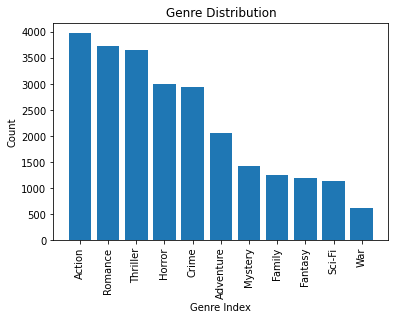

In [33]:
import pandas as pd
import numpy as np

# Example DataFrame

df = pd.read_csv("test_reduced.csv")

# Step 1: Parse Labels into a NumPy array
df["Parsed_Labels"] = df["genre"].apply(lambda x: np.array(list(map(int, x.strip("[]").split()))))

# Step 2: Sum up genre occurrences
genre_counts = np.sum(np.stack(df["Parsed_Labels"]), axis=0)

# Step 3: Display genre distribution
genre_distribution = pd.DataFrame({
    "Genre_Index": ['Action',
                         'Adventure',
                         'Animation',
                        'Biography',
                         'Crime',
                         'Family',
                         'Fantasy',
                         'History',
                         'Horror',
                         'Mystery',
                         'Romance',
                         'Sci-Fi',
                         'Thriller', 'War'],
    "Count": genre_counts
})

genre_distribution = genre_distribution.sort_values(by="Count", ascending=False)

# Optional: Visualization (requires matplotlib)
import matplotlib.pyplot as plt

plt.bar(genre_distribution["Genre_Index"], genre_distribution["Count"])
plt.xlabel("Genre Index")
plt.ylabel("Count")
plt.title("Genre Distribution")
plt.xticks(rotation=90)  # Pivot the x labels to vertical
plt.show()

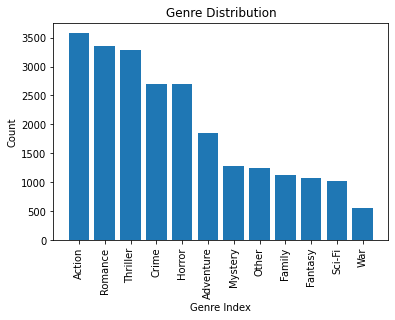

ValueError: All arrays must be of the same length

In [96]:
import pandas as pd
import numpy as np

# Example DataFrame

df = pd.read_csv("dev_no_drama.csv")

# Step 1: Parse Labels into a NumPy array
df["Parsed_Labels"] = df["genre"].apply(lambda x: np.array(list(map(int, x.strip("[]").split()))))

# Step 2: Sum up genre occurrences
genre_counts = np.sum(np.stack(df["Parsed_Labels"]), axis=0)

# Step 3: Display genre distribution
genre_distribution = pd.DataFrame({
    "Genre_Index": ['Action',
                         'Adventure',
                         'Crime',
                         'Family',
                         'Fantasy',
                         'Horror',
                         'Mystery',
                         'Romance',
                         'Sci-Fi',
                         'Thriller', 'War', 'Other'],
    "Count": genre_counts
})

genre_distribution = genre_distribution.sort_values(by="Count", ascending=False)

# Optional: Visualization (requires matplotlib)
import matplotlib.pyplot as plt

plt.bar(genre_distribution["Genre_Index"], genre_distribution["Count"])
plt.xlabel("Genre Index")
plt.ylabel("Count")
plt.title("Genre Distribution")
plt.xticks(rotation=90)  # Pivot the x labels to vertical
plt.show()

df = pd.read_csv("data/split/dev_no_drama/val.csv")

# Step 1: Parse Labels into a NumPy array
df["Parsed_Labels"] = df["genre"].apply(lambda x: np.array(list(map(int, x.strip("[]").split()))))

# Step 2: Sum up genre occurrences
genre_counts = np.sum(np.stack(df["Parsed_Labels"]), axis=0)

# Step 3: Display genre distribution
genre_distribution = pd.DataFrame({
    "Genre_Index": UNIQUE_GENRES,
    "Count": genre_counts
})

# sort by count
genre_distribution = genre_distribution.sort_values(by="Count", ascending=False)


# Optional: Visualization (requires matplotlib)
import matplotlib.pyplot as plt

plt.bar(genre_distribution["Genre_Index"], genre_distribution["Count"])
plt.xlabel("Genre Index")
plt.ylabel("Count")
plt.title("Genre Distribution")
plt.xticks(rotation=90)  # Pivot the x labels to vertical
plt.show()

df = pd.read_csv("data/split/dev_no_drama/test.csv")

# Step 1: Parse Labels into a NumPy array
df["Parsed_Labels"] = df["genre"].apply(lambda x: np.array(list(map(int, x.strip("[]").split()))))

# Step 2: Sum up genre occurrences, sorted
genre_counts = np.sum(np.stack(df["Parsed_Labels"]), axis=0)
# sorted by count

# Step 3: Display genre distribution
genre_distribution = pd.DataFrame({
    "Genre_Index": UNIQUE_GENRES,
    "Count": genre_counts
})

genre_distribution = genre_distribution.sort_values(by="Count", ascending=False)

# Optional: Visualization (requires matplotlib)
import matplotlib.pyplot as plt

plt.bar(genre_distribution["Genre_Index"], genre_distribution["Count"])
plt.xlabel("Genre Index")
plt.ylabel("Count")
plt.title("Genre Distribution")
plt.xticks(rotation=90)  # Pivot the x labels to vertical
plt.show()


In [56]:
print(genre_distribution)

   Genre_Index  Count
4       Comedy    371
0       Action    358
14     Romance    335
17    Thriller    329
5        Crime    282
10      Horror    269
1    Adventure    185
13     Mystery    128
6       Family    113
7      Fantasy    107
15      Sci-Fi    102
3    Biography     62
2    Animation     60
11       Music     59
9      History     58
18         War     57
12     Musical     48
8    Film-Noir     40
16       Sport     28
19     Western     17


In [105]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score
y_true = [0, 1, 0, 0, 1, 0]
y_pred = [0, 1, 0, 0, 0, 1]
balanced_accuracy_score(y_true, y_pred)

0.625

In [106]:
accuracy_score(y_true, y_pred)


0.6666666666666666

In [64]:

import os


# Data PATHS
# Folders
DATA_PATH = "data"
CRAWL_FOLDER = "crawl"
SPLIT_FOLDER = "split"

# Stratified Data
TEST_FILE = "test.csv"
TRAIN_FILE = "train.csv"
DEV_FILE = "dev.csv"
# TEST_FILE = "test_no_drama.csv"
# DEV_FILE = "dev_no_drama.csv"
# TEST_FILE = "test_reduced.csv"
# DEV_FILE = "dev_reduced.csv"

# Export PATHS
EXPORT_PATH = "export"

# Config
CONFIG_PATH = "config.json"
MODEL_PATH = "models"
WORD_EMBEDDING_PATH = os.path.join(MODEL_PATH, "word_embeddings")

# Constants
SEED = 42069
UNIQUE_GENRES = ['Action',
                 'Adventure',
                 'Animation',
                 'Biography',
                 'Comedy',
                 'Crime',
                 "Drama",
                 'Family',
                 'Fantasy',
                 'Film-Noir',
                 'History',
                 'Horror',
                 'Music',
                 'Musical',
                 'Mystery',
                 'Romance',
                 'Sci-Fi',
                 'Sport',
                 'Thriller',
                 'War',
                 'Western']

# UNIQUE_GENRES = ['Action',
#                  'Adventure',
#                  'Crime',
#                  'Family',
#                  'Fantasy',
#                  'Horror',
#                  'Mystery',
#                  'Romance',
#                  'Sci-Fi',
#                  'Thriller', 'War']


In [65]:
import re
import pandas as pd
import numpy as np
import json
import os
# from globals import DATA_PATH, UNIQUE_GENRES


def numpy_to_pandas(X, columns):
    # TODO: might not work (but should)
    '''
    Converts a numpy array to a pandas DataFrame.

    Parameters:
    ----------
    X : numpy.ndarray
        The numpy array to convert.
    columns : pandas.Columns
        The columns of the DataFrame.

    Returns:
    -------
    pandas.DataFrame
        The DataFrame.
    '''
    return pd.DataFrame(X, columns=columns)


def pandas_ndarray_series_to_numpy(series):
    '''
    Converts a pandas Series of ndarrays to a numpy array.

    Parameters:
    ----------
    series : pandas.Series
        The Series to convert.

    Returns:
    -------
    numpy.ndarray
        The numpy array.
    '''
    return np.array(series.tolist()).astype(int)


def get_genre_converter():
    '''
    Returns a dictionary that can be used to convert genres when loading from a CSV file.
    Returns:
    -------
    dict
        The dictionary that can be used to convert genres when loading from a CSV file.
    '''
    return {"genre": lambda x: re.sub(r"[\[\]']", '', x).split(' ')}


def get_converters():
    return {"genre": lambda x: re.sub(r"[\[\]']", '', x).split(' '),
            "lemmatized_description": lambda x: " ".join(re.sub(r"[\[\],']", '', x).split(' '))}


def get_lemmatized_converter():
    '''
    Returns a dictionary that can be used to convert the lemmatized description when loading from a CSV file via pandas.
    Returns:
    -------
    dict
        The dictionary that can be used to convert lemmatized description when loading from a CSV file.
    '''
    return {"lemmatized_description": lambda x: re.sub(r"[\[\]']", '', x).split(' ')}


def load_genres():
    try:
        with open(os.path.join(DATA_PATH, 'genres.json'), 'r') as f:
            genres = json.load(f)
    except FileNotFoundError:
        genres = UNIQUE_GENRES
    return genres


def encode_genres(genre):
    genres = load_genres()
    return np.isin(genres, genre).astype(int)


def decode_genres(encoded_genre):
    '''
    Takes an encoded genre and return the correspondind genres as a list of strings.
    '''
    genres = load_genres()
    indices = np.where(encoded_genre == 1)[0]
    if len(indices) == 0:
        return []
    return [genres[i] for i in indices]


In [67]:
import glob
import itertools
import pandas as pd
import os
import logging as log
import numpy as np
from skmultilearn.model_selection.iterative_stratification import iterative_train_test_split

import re


def __load_csv(filename, converters=None):
    return pd.read_csv(filename, converters=converters)


def __save_csv(filename, data):
    data.to_csv(filename, index=False)


def load_raw_data():
    path = os.path.join(DATA_PATH, 'raw', "*.csv")
    log.info('Loading raw data from %s', path)

    df = None
    for filename in glob.glob(path):
        if df is None:
            df = __load_csv(filename)
        else:
            df = pd.concat([df, __load_csv(filename)],
                           axis=0, ignore_index=True)
    log.info('Raw data loaded: %s', df.shape)
    return df


def load_stratified_data(stop=None):
    log.info(f"Checking if all initial data is loaded...")
    log.info(f"Loading stratified data splits...")
    SPLIT_FOLDER_PATH = os.path.join(DATA_PATH, SPLIT_FOLDER)
    TEST_FILE_PATH = os.path.join(SPLIT_FOLDER_PATH, TEST_FILE)
    TRAIN_FILE_PATH = os.path.join(SPLIT_FOLDER_PATH, TRAIN_FILE)
    DEV_FILE_PATH = os.path.join(SPLIT_FOLDER_PATH, DEV_FILE)

    if os.path.exists(SPLIT_FOLDER_PATH) and os.path.isfile(TEST_FILE_PATH) and os.path.isfile(TRAIN_FILE_PATH) and os.path.isfile(DEV_FILE_PATH) and stop is None:
        converter = get_converters()
        test = __load_csv(TEST_FILE_PATH, converters=converter)
        train = __load_csv(TRAIN_FILE_PATH, converters=converter)
        dev = __load_csv(DEV_FILE_PATH, converters=converter)
        log.info(f"Splits found and loaded.")
        return train, test, dev

    log.info(f"No splits found, creating stratified splits...")
    os.makedirs(SPLIT_FOLDER_PATH, exist_ok=True)
    df = conllu2df('conllu_data.conllu', stop=stop)
    y = np.vstack(df["genre"].to_numpy()).astype(int)
    X = df.drop(["genre"], axis=1).to_numpy()

    log.info(f"Creating train-test split with ration 0.1")
    X_train, y_train, X_test, y_test = iterative_train_test_split(
        X, y, 0.1)

    log.info(f"Creating stratified dev set as subset with ration 0.1")
    _, _, X_dev, y_dev = iterative_train_test_split(X_train, y_train, 0.1)

    test = pd.DataFrame(X_test, columns=df.drop(["genre"], axis=1).columns)
    train = pd.DataFrame(X_train, columns=df.drop(["genre"], axis=1).columns)
    dev = pd.DataFrame(X_dev, columns=df.drop(["genre"], axis=1).columns)

    test["genre"] = pd.Series(list(y_test))
    log.info(f"Test set: \n{test.head()}")
    dev["genre"] = pd.Series(list(y_dev))
    log.info(f"Dev set: \n{dev.head()}")
    train["genre"] = pd.Series(list(y_train))
    log.info(f"Train set: \n{train.head()}")

    if stop is None:
        __save_csv(TEST_FILE_PATH, test)
        __save_csv(TRAIN_FILE_PATH, train)
        __save_csv(DEV_FILE_PATH, dev)

    log.info(f"Stratified splits created and saved.")
    return train, test, dev


def conllu2df(filename, stop=None):
    def movie_entry_generator():
        current_id = None
        current_genre = None
        current_description = []
        current_lemmatized_description = []

        filepath = os.path.join(DATA_PATH, filename)
        with open(filepath, 'r', encoding="utf-8") as f:
            for line in f:
                if line.startswith("# movie_id"):
                    # Yield previous movie entry if exists
                    if current_id is not None:
                        yield {
                            "movie_id": current_id,
                            "genre": current_genre,
                            "description": " ".join(current_description),
                            "lemmatized_description": current_lemmatized_description
                        }

                    # Reset for new movie
                    current_id = line.split('=')[1].strip()
                    current_genre = None
                    current_description = []
                    current_lemmatized_description = []

                elif line.startswith("# genre"):
                    current_genre = line.split('=')[1].strip()
                    current_genre = np.array(
                        re.sub(r"[\[\]']", '', current_genre).split(' '))

                elif line.startswith("# text"):
                    current_description.append(line.split('=', 1)[1].strip())

                elif line[0].isdigit():
                    # Split line and take lemma
                    current_lemmatized_description.append(line.split('\t')[2])

            # Yield last movie entry
            if current_id is not None:
                yield {
                    "movie_id": current_id,
                    "genre": current_genre,
                    "description": " ".join(current_description),
                    "lemmatized_description": current_lemmatized_description
                }

    log.info(f"Converting conllu file {filename} to a dataframe...")
    # Limit number of entries if stop is provided
    return pd.DataFrame(itertools.islice(movie_entry_generator(), stop))


In [42]:
def fit_predict(classifier, text_model, lemmatized=False, fine_tune=False):
    # load stratified data
    _, test, dev = load_stratified_data()

    # depending on model and classifier, lemmatized input data may be beneficial
    if lemmatized:
        X_dev, y_dev = dev["lemmatized_description"].to_numpy(), pandas_ndarray_series_to_numpy(dev["genre"])
        X_test, y_test = test["lemmatized_description"].to_numpy(), pandas_ndarray_series_to_numpy(test["genre"])
    else:
        X_dev, y_dev = dev["description"].to_numpy(), pandas_ndarray_series_to_numpy(dev["genre"])
        X_test, y_test = test["description"].to_numpy(), pandas_ndarray_series_to_numpy(test["genre"])

    if type(classifier).__name__ == "MovieGenreClassifier":
        output_dir = os.path.join(MODEL_PATH, "distilbert_movie_genres")
        X_dev = X_dev.reshape(-1, 1)
        X_dev_train, y_dev_train, X_dev_val, y_dev_val = iterative_train_test_split(X_dev, y_dev, test_size=0.2)
        train_data = pd.DataFrame({'description': X_dev_train.reshape(-1), 'genre': pd.Series(list(y_dev_train))})
        val_data = pd.DataFrame({'description': X_dev_val.reshape(-1), 'genre': pd.Series(list(y_dev_val))})
        test_data = pd.DataFrame({'description': X_test, 'genre': pd.Series(list(y_test))})

        if fine_tune:
            log.info(f'Fine-tuning model (Path: {output_dir})')
            classifier.fine_tune(output_dir=output_dir,
                                 train_data=train_data, eval_data=val_data)
            log.info('Fine-tuning finished')
        classifier.load_model(model_path=os.path.join(output_dir, 'best'))
        log.info(f"Loaded best model (Path: {os.path.join(output_dir, 'best')})")
        y_pred = classifier.predict(test_data)
    else:
        transformed_data = text_model.fit_transform(X_dev)
        classifier = classifier.fit(transformed_data, y_dev)
        y_pred = classifier.predict_at_least_1(text_model.transform(X_test))

    return X_test, y_pred, y_test, classifier, text_model

In [43]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

import logging as log
import pandas as pd
from sklearn.tree import DecisionTreeClassifier


class MultiLabelClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, estimator_name, verbose=True, **kwargs):
        if verbose:
            log.info(f"Creating multilabel classifier {estimator_name}")

        if estimator_name == "lreg":
            self.base_estimator = LogisticRegression(**kwargs)
        elif estimator_name == "knn":
            self.base_estimator = KNeighborsClassifier(**kwargs)
        elif estimator_name == "svm":
            self.base_estimator = SVC(**kwargs)
        elif estimator_name == "bayes":
            self.base_estimator = MultinomialNB(**kwargs)
        elif estimator_name == "dt":
            self.base_estimator = DecisionTreeClassifier(**kwargs, random_state=SEED)
        elif estimator_name == "rf":
            self.base_estimator = RandomForestClassifier(**kwargs)
        elif estimator_name == "mlp":
            self.base_estimator = MLPClassifier(**kwargs)
        else:
            raise ValueError(
                "Base estimator not found. Choose from: lreg, knn, svm, bayes, rf, mlp")

        if estimator_name == "svm":
            self.multi_output_clf_ = MultiOutputClassifier(BaggingClassifier(self.base_estimator, n_jobs=-1, n_estimators=10))
        else:
            self.multi_output_clf_ = MultiOutputClassifier(self.base_estimator)

        try:
            # raise an AttributeError if `predict_proba` does not exist for the base estimator
            self.multi_output_clf_._check_predict_proba()
            self._has_predict_proba = True
        except AttributeError:
            self._has_predict_proba = False

    def fit(self, X, y):
        if isinstance(y, pd.Series):
            y = helper.pandas_ndarray_series_to_numpy(y)
        self.multi_output_clf_.fit(X, y)
        return self

    def predict(self, X):
        return self.multi_output_clf_.predict(X)

    def predict_proba(self, X):
        return np.array(self.multi_output_clf_.predict_proba(X)).transpose()[1]

    def predict_at_least_1(self, X):
        predictions = self.multi_output_clf_.predict(X)
        if self._has_predict_proba:
            predictions_proba = self.predict_proba(X)
            idx = predictions.sum(axis=1) == 0
            predictions[idx] = (predictions_proba[idx] >= predictions_proba.max(axis=1)[idx][:, None]).astype(int)
        return predictions


In [44]:
from abc import ABC, abstractmethod
import numpy as np
import os
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import logging as log


class BagOfWords(BaseEstimator, TransformerMixin):
    def __init__(self, vectorizer_name, **kwargs):
        '''
        Initializes the BagOfWords model.

        Parameters:
        ----------
        vectorizer_name : str
            Name of the vectorizer to use. Supported values are 'count' and 'tf-idf'.
        kwargs : dict
            Arguments to pass to the vectorizer.
            ngram_range : tuple, optional
                The lower and upper boundary of the range of n-values for different n-grams to be extracted.

        '''
        if vectorizer_name not in ['count', 'tf-idf']:
            raise ValueError("Vectorizer not supported")
        self.vectorizer_name = vectorizer_name
        self.kwargs = kwargs
        self.model = self.set_vectorizer(vectorizer_name)

    def fit(self, X, y=None):
        self.model.fit(self.check_X(X))
        return self

    def check_X(self, X):
        if isinstance(X[0], list):
            X_input = [" ".join(x) for x in X]
        else:
            X_input = X
        return X_input

    def transform(self, X):
        return self.model.transform(self.check_X(X))

    def fit_transform(self, X, y=None):
        return self.model.fit_transform(self.check_X(X))

    def set_vectorizer(self, vectorizer_name):
        if vectorizer_name == 'count':
            return CountVectorizer(**self.kwargs)
        else:
            return TfidfVectorizer(**self.kwargs)

    def get_feature_names_out(self):
        return self.model.get_feature_names_out()


In [68]:
X, y_pred_logreg, y_true_logreg, classifier, text_model = fit_predict(MultiLabelClassifier("lreg", n_jobs=-1, balanced_weights=True), BagOfWords("tf-idf", ngram_range=(1, 1)), lemmatized=True)

In [384]:
_, test, dev = load_stratified_data()

# Extract lemmatized descriptions and genre labels
lemmatized_descriptions = dev["lemmatized_description"].to_numpy()

In [394]:
def check_X(X):
    if isinstance(X[0], list):
        print('here')
        X_input = [" ".join(x) for x in X]
    else:
        print('her2e')
        
        X_input = X
    return X_input

In [396]:
lemmatized_descriptions

array(['the adventure of a female reporter in the 1890s .',
       'the persecution of the child of Israel by the Egyptians . now there arise up a new king in Egypt . and he say unto his person . behold  the person of the child of Israel be more and',
       'the fabled queen of _ Egypt "s" affair with Roman general Marc Antony be ultimately disastrous for both of they .',
       ...,
       '" regue Chicken " tell the story of two teenager . Violeta  a orphan chicken who love reggaeton and Gabriel  the son of a rooster _ who be a champion in fighting . both of they go on a adventure which they _ do not only learn to accept themselves  but also tolerance and peace .',
       '" Com meus olhos de Cão " ( with my dog - Eyes )  be a " friction " film that mix documentary element from the life and work of the erudite composer Gilberto Mendes with fictional element from the book com Meus Olhos de Cão  by Hilda Hilst',
       'the life of three friend and their family be compromise as they b

In [451]:
# Load data (assuming `dev` contains the data with lemmatized descriptions and genres)
_, test, dev = load_stratified_data()

In [423]:
print(dev['genre'])

0        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1        [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
2        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...
3        [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
4        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...
                               ...                        
17075    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...
17076    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...
17077    [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, ...
17078    [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ...
17079    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
Name: genre, Length: 17080, dtype: object


In [590]:
filtered2 = dev[dev["genre"].apply(lambda x: x[6] == '1')]

In [453]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Extract lemmatized descriptions and genre labels
lemmatized_descriptions = dev["lemmatized_description"].to_numpy()
genres = dev["genre"].to_numpy()


# Specify genres to compare
UNIQUE_GENRES_REDUCED = [
    'Action', 'Adventure', 'Animation', 'Biography', 'Crime',
    'Family', 'Fantasy', 'History', 'Horror', 'Mystery',
    'Romance', 'Sci-Fi', 'Thriller', 'War'
]

UNIQUE_GENRES = ['Action',
                 'Adventure',
                 'Animation',
                 'Biography',
                 'Comedy',
                 'Crime',
                 "Drama",
                 'Family',
                 'Fantasy',
                 'Film-Noir',
                 'History',
                 'Horror',
                 'Music',
                 'Musical',
                 'Mystery',
                 'Romance',
                 'Sci-Fi',
                 'Sport',
                 'Thriller',
                 'War',
                 'Western']

# Initialize a dictionary to store descriptions grouped by genre
genre_descriptions = {genre: [] for genre in UNIQUE_GENRES}

print("appending descs")
# Group descriptions by genre
for desc, genre_vector in zip(lemmatized_descriptions, genres):
    for idx, genre_flag in enumerate(genre_vector):
        if int(genre_flag) == 1:  # If the movie belongs to this genre
            genre_name = UNIQUE_GENRES[idx]
            # if genre_name in UNIQUE_GENRES_REDUCED + ['Drama']:
            genre_descriptions[genre_name].append(desc)

# print(genre_descriptions['Crime'])

# Combine all descriptions for each genre into a single "super-document"
super_documents = {genre: " ".join(docs) for genre, docs in genre_descriptions.items()}

# Ensure that super-documents are not empty
# super_documents = {genre: doc for genre, doc in super_documents.items() if doc.strip()}

print("transforming docs")
# Use TfidfVectorizer to vectorize the "super-documents"
vectorizer = CountVectorizer()
genre_vectors = vectorizer.fit_transform(super_documents.values())
from sklearn.preprocessing import normalize

genre_vectors = normalize(genre_vectors, norm='l2', axis=1)
# Get the vector for the "Drama" genre
drama_vector = genre_vectors[6]


print("cosine sim")
# Compute cosine similarity between "Drama" and all other genres
similarities = cosine_similarity(drama_vector, genre_vectors)

# sort similiarties
# similarities = np.sort(similarities)
# Display the similarities
for genre, similarity in zip(UNIQUE_GENRES, similarities[0]):
    # if genre in UNIQUE_GENRES_REDUCED:
    print(f"{genre}: {similarity:.4f}")

appending descs
transforming docs
cosine sim
Cosine similarity between Drama and Action: 0.9924
Cosine similarity between Drama and Adventure: 0.9893
Cosine similarity between Drama and Animation: 0.9742
Cosine similarity between Drama and Biography: 0.9540
Cosine similarity between Drama and Comedy: 0.9968
Cosine similarity between Drama and Crime: 0.9937
Cosine similarity between Drama and Drama: 1.0000
Cosine similarity between Drama and Family: 0.9931
Cosine similarity between Drama and Fantasy: 0.9896
Cosine similarity between Drama and Film-Noir: 0.9784
Cosine similarity between Drama and History: 0.9576
Cosine similarity between Drama and Horror: 0.9857
Cosine similarity between Drama and Music: 0.9898
Cosine similarity between Drama and Musical: 0.9891
Cosine similarity between Drama and Mystery: 0.9892
Cosine similarity between Drama and Romance: 0.9912
Cosine similarity between Drama and Sci-Fi: 0.9773
Cosine similarity between Drama and Sport: 0.9723
Cosine similarity betwee

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load your stratified data
# Assuming dev is already loaded with "lemmatized_description" and "genre"
lemmatized_descriptions = dev["lemmatized_description"].to_numpy()
genres = dev["genre"].to_numpy()


# Define genres
UNIQUE_GENRES_REDUCED = [
    'Action', 'Adventure', 'Animation', 'Biography', 'Crime',
    'Family', 'Fantasy', 'History', 'Horror', 'Mystery',
    'Romance', 'Sci-Fi', 'Thriller', 'War'
]
UNIQUE_GENRES = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
                 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror',
                 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
                 'Thriller', 'War', 'Western']

# Create dictionaries to group by genres
genre_descriptions = {genre: [] for genre in UNIQUE_GENRES}

# Group descriptions by genre
for desc, genre_vector in zip(lemmatized_descriptions, genres):
    for idx, genre_flag in enumerate(genre_vector):
        if int(genre_flag) == 1:  # If the movie belongs to this genre
            genre_name = UNIQUE_GENRES[idx]
            genre_descriptions[genre_name].append(desc)

# --- Super-document Approach ---
# Combine all descriptions for each genre into a single "super-document"
super_documents = {genre: " ".join(docs) for genre, docs in genre_descriptions.items()}

# Use TfidfVectorizer to vectorize the "super-documents"
vectorizer_super = TfidfVectorizer(sublinear_tf=True)
genre_vectors_super = vectorizer_super.fit_transform(super_documents.values())

# Extract "Drama" vector
drama_vector_super = genre_vectors_super[6]  # Index of "Drama" in UNIQUE_GENRES

# Compute cosine similarity for super-document approach
similarities_super = cosine_similarity(drama_vector_super, genre_vectors_super)

# Sort and display results
print("\nSuper-document Approach Similarities:")
zipped_super = zip(UNIQUE_GENRES, similarities_super[0])
zipped_super = sorted(zipped_super, key=lambda x: x[1], reverse=True)
for genre, similarity in zipped_super:
    if genre in UNIQUE_GENRES_REDUCED + ['Drama']:
        print(f"{genre}: {similarity:.4f}")

# --- Averaging Method ---
print("\nAveraging Method Similarities:")

# Vectorize individual descriptions
vectorizer_avg = TfidfVectorizer(sublinear_tf=True)
document_vectors = vectorizer_avg.fit_transform(lemmatized_descriptions)

# Initialize averaged vectors for each genre
averaged_vectors = {}
for genre, docs in genre_descriptions.items():
    if docs:  # Skip genres without documents
        genre_doc_indices = [i for i, desc in enumerate(lemmatized_descriptions) if desc in docs]
        genre_doc_vectors = document_vectors[genre_doc_indices]
        averaged_vectors[genre] = genre_doc_vectors.mean(axis=0)

# Compute cosine similarity between averaged "Drama" vector and others
drama_avg_vector = averaged_vectors["Drama"]

# Compare Drama with each genre
similarities_avg = []
for genre in UNIQUE_GENRES_REDUCED:
    if genre in averaged_vectors:
        genre_avg_vector = averaged_vectors[genre]
        similarity = cosine_similarity(drama_avg_vector, genre_avg_vector)[0][0]
        similarities_avg.append((genre, similarity))

# Sort and display results
similarities_avg = sorted(similarities_avg, key=lambda x: x[1], reverse=True)
for genre, similarity in similarities_avg:
    print(f"{genre}: {similarity:.4f}")



Super-document Approach Similarities:
Drama: 1.0000
Romance: 0.7136
Crime: 0.6387
Action: 0.6375
Thriller: 0.6113
Adventure: 0.5385
Mystery: 0.5283
Family: 0.5083
Horror: 0.5066
History: 0.4818
Fantasy: 0.4654
Biography: 0.4593
War: 0.4505
Sci-Fi: 0.4345
Animation: 0.3417

Averaging Method Similarities:


AttributeError: 'matrix' object has no attribute 'toarray'

In [ ]:
# Vectorize individual descriptions
vectorizer_avg = TfidfVectorizer()
document_vectors = vectorizer_avg.fit_transform(lemmatized_descriptions)

# Initialize averaged vectors for each genre
averaged_vectors = {}
for genre, docs in genre_descriptions.items():
    if docs:  # Skip genres without documents
        genre_doc_indices = [i for i, desc in enumerate(lemmatized_descriptions) if desc in docs]
        genre_doc_vectors = document_vectors[genre_doc_indices]
        averaged_vectors[genre] = genre_doc_vectors.mean(axis=0)

# Compute cosine similarity between averaged "Drama" vector and others
drama_avg_vector = averaged_vectors["Drama"]

# Compare Drama with each genre
similarities_avg = []
for genre in UNIQUE_GENRES_REDUCED:
    if genre in averaged_vectors:
        genre_avg_vector = averaged_vectors[genre]
        similarity = cosine_similarity(np.array(drama_avg_vector), np.array(genre_avg_vector))[0][0]
        similarities_avg.append((genre, similarity))

# Sort and display results
similarities_avg = sorted(similarities_avg, key=lambda x: x[1], reverse=True)
for genre, similarity in similarities_avg:
    print(f"{genre}: {similarity:.4f}")

(3581, 32855)
(1853, 32855)
(595, 32855)
(613, 32855)
(3503, 32855)
(2698, 32855)
(7279, 32855)
(1125, 32855)
(1077, 32855)
(289, 32855)
(576, 32855)
(2694, 32855)
(416, 32855)
(381, 32855)
(1280, 32855)
(3352, 32855)
(1026, 32855)
(280, 32855)
(3288, 32855)
(558, 32855)
(175, 32855)
Romance: 0.9746
Thriller: 0.9737
Action: 0.9598
Crime: 0.9555
Family: 0.9514
Adventure: 0.9511
Mystery: 0.9489
Fantasy: 0.9460
Horror: 0.9320
History: 0.8859
Animation: 0.8851
Sci-Fi: 0.8798
Biography: 0.8733
War: 0.8356


In [622]:
# Vectorize individual descriptions
vectorizer_avg = TfidfVectorizer()
document_vectors = vectorizer_avg.fit_transform(lemmatized_descriptions)

# Initialize averaged vectors for each genre
averaged_vectors = {}
for genre, docs in genre_descriptions.items():
    if docs:  # Skip genres without documents
        genre_vectors = vectorizer_avg.transform(docs)  # Transform genre-specific docs
        averaged_vectors[genre] = np.array(genre_vectors.mean(axis=0))

# Compute cosine similarity between averaged "Drama" vector and others
drama_avg_vector = averaged_vectors["Drama"]

# Compare Drama with each genre
similarities_avg = []
for genre in UNIQUE_GENRES_REDUCED:
    if genre in averaged_vectors:
        genre_avg_vector = averaged_vectors[genre]
        similarity = cosine_similarity(drama_avg_vector, genre_avg_vector)[0][0]
        similarities_avg.append((genre, similarity))

# Sort and display results
similarities_avg = sorted(similarities_avg, key=lambda x: x[1], reverse=True)
for genre, similarity in similarities_avg:
    print(f"{genre}: {similarity:.4f}")

Romance: 0.9746
Thriller: 0.9737
Action: 0.9598
Crime: 0.9555
Family: 0.9514
Adventure: 0.9511
Mystery: 0.9489
Fantasy: 0.9460
Horror: 0.9320
History: 0.8859
Animation: 0.8851
Sci-Fi: 0.8798
Biography: 0.8733
War: 0.8356


In [623]:
# Compare each genre with Drama
from sklearn.metrics.pairwise import nan_euclidean_distances

sims_top = {genre: 0.0 for genre in UNIQUE_GENRES}
for genre_idx, genre_name in enumerate(UNIQUE_GENRES):
    # Extract genre vector
    genre_vector = averaged_vectors[genre_name][0]

    # Get top 100 indices for the genre
    top_indices = np.argsort(genre_vector)[-100:].tolist()

    # Subset Drama and genre vectors using the top indices
    reduced_drama_vector = drama_avg_vector[0][top_indices]
    reduced_genre_vector = genre_vector[top_indices]

    # Compute cosine similarity
    similarity = cosine_similarity(
        reduced_drama_vector.reshape(1, -1),
        reduced_genre_vector.reshape(1, -1),
    )[0][0]
    
    sims_top[genre_name] = similarity

# sort the similarities
sims_top = dict(sorted(sims_top.items(), key=lambda item: item[1], reverse=True))
# Display the similarities
for genre, similarity in sims_top.items():
    if genre in UNIQUE_GENRES_REDUCED + ['Drama']:
        print(f"{genre}: {similarity:.4f}")

Drama: 1.0000
Thriller: 0.9863
Romance: 0.9827
Family: 0.9767
Fantasy: 0.9760
Action: 0.9755
Adventure: 0.9726
Crime: 0.9688
Mystery: 0.9657
Horror: 0.9614
Animation: 0.9326
History: 0.9189
Sci-Fi: 0.9123
Biography: 0.9099
War: 0.8591


In [619]:
# Vectorize individual descriptions
vectorizer_avg = TfidfVectorizer(sublinear_tf=True)
document_vectors = vectorizer_avg.fit_transform(lemmatized_descriptions)

# Initialize averaged vectors for each genre
averaged_vectors = {}
for genre, docs in genre_descriptions.items():
    if docs:  # Skip genres without documents
        genre_vectors = vectorizer_avg.transform(docs)  # Transform genre-specific docs
        averaged_vectors[genre] = np.array(genre_vectors.mean(axis=0))

# Compute cosine similarity between averaged "Drama" vector and others
drama_avg_vector = averaged_vectors["Drama"]

# Compare Drama with each genre
similarities_avg = []
for genre in UNIQUE_GENRES_REDUCED:
    if genre in averaged_vectors:
        genre_avg_vector = averaged_vectors[genre]
        similarity = cosine_similarity(drama_avg_vector, genre_avg_vector)[0][0]
        similarities_avg.append((genre, similarity))

# Sort and display results
similarities_avg = sorted(similarities_avg, key=lambda x: x[1], reverse=True)
for genre, similarity in similarities_avg:
    print(f"{genre}: {similarity:.4f}")

Romance: 0.9724
Thriller: 0.9695
Action: 0.9531
Crime: 0.9476
Adventure: 0.9430
Family: 0.9407
Mystery: 0.9389
Fantasy: 0.9347
Horror: 0.9216
History: 0.8752
Animation: 0.8658
Sci-Fi: 0.8607
Biography: 0.8516
War: 0.8055


In [620]:
# Compare each genre with Drama
from sklearn.metrics.pairwise import nan_euclidean_distances

sims_top = {genre: 0.0 for genre in UNIQUE_GENRES}
for genre_idx, genre_name in enumerate(UNIQUE_GENRES):
    # Extract genre vector
    genre_vector = averaged_vectors[genre_name][0]

    # Get top 100 indices for the genre
    top_indices = np.argsort(genre_vector)[-100:].tolist()

    # Subset Drama and genre vectors using the top indices
    reduced_drama_vector = drama_avg_vector[0][top_indices]
    reduced_genre_vector = genre_vector[top_indices]

    # Compute cosine similarity
    similarity = cosine_similarity(
        reduced_drama_vector.reshape(1, -1),
        reduced_genre_vector.reshape(1, -1),
    )[0][0]
    
    sims_top[genre_name] = similarity

# sort the similarities
sims_top = dict(sorted(sims_top.items(), key=lambda item: item[1], reverse=True))
# Display the similarities
for genre, similarity in sims_top.items():
    if genre in UNIQUE_GENRES_REDUCED + ['Drama']:
        print(f"{genre}: {similarity:.4f}")

Drama: 1.0000
Thriller: 0.9847
Romance: 0.9826
Action: 0.9727
Family: 0.9718
Fantasy: 0.9716
Adventure: 0.9702
Crime: 0.9628
Mystery: 0.9589
Horror: 0.9574
Animation: 0.9244
History: 0.9182
Sci-Fi: 0.8987
Biography: 0.8965
War: 0.8299


In [650]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize


# Extract lemmatized descriptions and genre labels
lemmatized_descriptions = dev["lemmatized_description"].to_numpy()
genres = dev["genre"].to_numpy()


# Specify genres to compare
UNIQUE_GENRES_REDUCED = [
    'Action', 'Adventure', 'Animation', 'Biography', 'Crime',
    'Family', 'Fantasy', 'History', 'Horror', 'Mystery',
    'Romance', 'Sci-Fi', 'Thriller', 'War'
]

UNIQUE_GENRES = ['Action',
                 'Adventure',
                 'Animation',
                 'Biography',
                 'Comedy',
                 'Crime',
                 "Drama",
                 'Family',
                 'Fantasy',
                 'Film-Noir',
                 'History',
                 'Horror',
                 'Music',
                 'Musical',
                 'Mystery',
                 'Romance',
                 'Sci-Fi',
                 'Sport',
                 'Thriller',
                 'War',
                 'Western']

# Initialize a dictionary to store descriptions grouped by genre
genre_descriptions = {genre: [] for genre in UNIQUE_GENRES}

print("appending descs")
# Group descriptions by genre
for desc, genre_vector in zip(lemmatized_descriptions, genres):
    for idx, genre_flag in enumerate(genre_vector):
        if int(genre_flag) == 1:  # If the movie belongs to this genre
            genre_name = UNIQUE_GENRES[idx]
            # if genre_name in UNIQUE_GENRES_REDUCED + ['Drama']:
            genre_descriptions[genre_name].append(desc)

# print(genre_descriptions['Crime'])

# Combine all descriptions for each genre into a single "super-document"
super_documents = {genre: " ".join(docs) for genre, docs in genre_descriptions.items()}

# Ensure that super-documents are not empty
# super_documents = {genre: doc for genre, doc in super_documents.items() if doc.strip()}

print("transforming docs")
# Use TfidfVectorizer to vectorize the "super-documents"
vectorizer = TfidfVectorizer()
genre_vectors = vectorizer.fit_transform(super_documents.values())

# genre_vectors = normalize(genre_vectors, norm='l2', axis=1)

# Get the vector for the "Drama" genre
drama_vector = genre_vectors[6]

print(len(drama_vector.toarray()[0]))

print("cosine sim")
# Compute cosine similarity between "Drama" and all other genres
similarities = cosine_similarity(drama_vector, genre_vectors)

# sort similiarties
# similarities = np.sort(similarities)
# Display the similarities
zipped = zip(UNIQUE_GENRES, similarities[0])
# sort the zipped list
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for genre, similarity in zipped:
    if genre in UNIQUE_GENRES_REDUCED + ['Drama']:
        print(f"{genre}: {similarity:.4f}")

appending descs
transforming docs
32855
cosine sim
Drama: 1.0000
Thriller: 0.9946
Crime: 0.9928
Action: 0.9917
Family: 0.9915
Romance: 0.9907
Adventure: 0.9881
Mystery: 0.9878
Fantasy: 0.9875
Horror: 0.9838
Sci-Fi: 0.9740
Animation: 0.9695
War: 0.9601
History: 0.9551
Biography: 0.9514


In [651]:
# Compare each genre with Drama
from sklearn.metrics.pairwise import nan_euclidean_distances

drama_vector_flatten = genre_vectors[6].toarray().flatten()
sims_top = {genre: 0.0 for genre in UNIQUE_GENRES}
for genre_idx, genre_name in enumerate(super_documents.keys()):

    # Extract genre vector
    genre_vector = genre_vectors[genre_idx].toarray().flatten()

    # Get top 100 indices for the genre
    top_indices = np.argsort(genre_vector)[-100:].tolist()
    
    # Subset Drama and genre vectors using the top indices
    reduced_drama_vector = drama_vector_flatten[top_indices]
    reduced_genre_vector = genre_vector[top_indices]
    
    
    # Compute cosine similarity
    similarity = cosine_similarity(
        reduced_drama_vector.reshape(1, -1),
        reduced_genre_vector.reshape(1, -1),
    )[0][0]
    
    sims_top[genre_name] = similarity
    
# sort the similarities
sims_top = dict(sorted(sims_top.items(), key=lambda item: item[1], reverse=True))
# Display the similarities
for genre, similarity in sims_top.items():
    if genre in UNIQUE_GENRES_REDUCED + ['Drama']:
        print(f"{genre}: {similarity:.4f}")

Drama: 1.0000
Thriller: 0.9968
Family: 0.9952
Crime: 0.9950
Action: 0.9939
Fantasy: 0.9920
Romance: 0.9920
Adventure: 0.9911
Mystery: 0.9907
Horror: 0.9883
Sci-Fi: 0.9803
Animation: 0.9783
War: 0.9658
History: 0.9601
Biography: 0.9572


In [695]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize


# Extract lemmatized descriptions and genre labels
lemmatized_descriptions = dev["lemmatized_description"].to_numpy()
genres = dev["genre"].to_numpy()


# Specify genres to compare
UNIQUE_GENRES_REDUCED = [
    'Action', 'Adventure', 'Animation', 'Biography', 'Crime',
    'Family', 'Fantasy', 'History', 'Horror', 'Mystery',
    'Romance', 'Sci-Fi', 'Thriller', 'War'
]

UNIQUE_GENRES = ['Action',
                 'Adventure',
                 'Animation',
                 'Biography',
                 'Comedy',
                 'Crime',
                 "Drama",
                 'Family',
                 'Fantasy',
                 'Film-Noir',
                 'History',
                 'Horror',
                 'Music',
                 'Musical',
                 'Mystery',
                 'Romance',
                 'Sci-Fi',
                 'Sport',
                 'Thriller',
                 'War',
                 'Western']

# Initialize a dictionary to store descriptions grouped by genre
genre_descriptions = {genre: [] for genre in UNIQUE_GENRES}

print("appending descs")
# Group descriptions by genre
for desc, genre_vector in zip(lemmatized_descriptions, genres):
    for idx, genre_flag in enumerate(genre_vector):
        if int(genre_flag) == 1:  # If the movie belongs to this genre
            genre_name = UNIQUE_GENRES[idx]
            # if genre_name in UNIQUE_GENRES_REDUCED + ['Drama']:
            genre_descriptions[genre_name].append(desc)

# print(genre_descriptions['Crime'])

# Combine all descriptions for each genre into a single "super-document"
super_documents = {genre: " ".join(docs) for genre, docs in genre_descriptions.items()}

# Ensure that super-documents are not empty
# super_documents = {genre: doc for genre, doc in super_documents.items() if doc.strip()}

print("transforming docs")
# Use TfidfVectorizer to vectorize the "super-documents"
vectorizer = TfidfVectorizer(sublinear_tf=True)
genre_vectors = vectorizer.fit_transform(super_documents.values())

# genre_vectors = normalize(genre_vectors, norm='l2', axis=1)

# Get the vector for the "Drama" genre
drama_vector = genre_vectors[6]

print(len(drama_vector.toarray()[0]))

print("cosine sim")
# Compute cosine similarity between "Drama" and all other genres
similarities = cosine_similarity(drama_vector, genre_vectors)

# sort similiarties
# similarities = np.sort(similarities)
# Display the similarities
zipped = zip(UNIQUE_GENRES, similarities[0])
# sort the zipped list
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for genre, similarity in zipped:
    if genre in UNIQUE_GENRES_REDUCED + ['Drama']:
        print(f"{genre}: {similarity:.4f}")

appending descs
transforming docs
32855
cosine sim
Drama: 1.0000
Romance: 0.7136
Crime: 0.6387
Action: 0.6375
Thriller: 0.6113
Adventure: 0.5385
Mystery: 0.5283
Family: 0.5083
Horror: 0.5066
History: 0.4818
Fantasy: 0.4654
Biography: 0.4593
War: 0.4505
Sci-Fi: 0.4345
Animation: 0.3417


In [697]:
# Compare each genre with Drama
from sklearn.metrics.pairwise import nan_euclidean_distances

drama_vector_flatten = genre_vectors[6].toarray().flatten()
sims_top = {genre: 0.0 for genre in UNIQUE_GENRES}
for genre_idx, genre_name in enumerate(super_documents.keys()):

    # Extract genre vector
    genre_vector = genre_vectors[genre_idx].toarray().flatten()

    # Get top 100 indices for the genre
    top_indices = np.argsort(genre_vector)[-100:].tolist()
    
    # Subset Drama and genre vectors using the top indices
    reduced_drama_vector = drama_vector_flatten[top_indices]
    reduced_genre_vector = genre_vector[top_indices]
    
    
    # Compute cosine similarity
    similarity = cosine_similarity(
        reduced_drama_vector.reshape(1, -1),
        reduced_genre_vector.reshape(1, -1),
    )[0][0]
    
    sims_top[genre_name] = similarity
    
# sort the similarities
sims_top = dict(sorted(sims_top.items(), key=lambda item: item[1], reverse=True))
# Display the similarities
for genre, similarity in sims_top.items():
    if genre in UNIQUE_GENRES_REDUCED + ['Drama']:
        print(f"{genre}: {similarity:.4f}")

Drama: 1.0000
History: 0.8818
Crime: 0.8645
War: 0.8452
Biography: 0.8096
Family: 0.7979
Sci-Fi: 0.7844
Thriller: 0.7277
Action: 0.7270
Mystery: 0.7162
Romance: 0.7060
Fantasy: 0.6719
Adventure: 0.6530
Horror: 0.6279
Animation: 0.5010


In [648]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Extract lemmatized descriptions and genre labels
lemmatized_descriptions = dev["lemmatized_description"].to_numpy()
genres = dev["genre"].to_numpy()


# Specify genres to compare
UNIQUE_GENRES_REDUCED = [
    'Action', 'Adventure', 'Animation', 'Biography', 'Crime',
    'Family', 'Fantasy', 'History', 'Horror', 'Mystery',
    'Romance', 'Sci-Fi', 'Thriller', 'War'
]

UNIQUE_GENRES = ['Action',
                 'Adventure',
                 'Animation',
                 'Biography',
                 'Comedy',
                 'Crime',
                 "Drama",
                 'Family',
                 'Fantasy',
                 'Film-Noir',
                 'History',
                 'Horror',
                 'Music',
                 'Musical',
                 'Mystery',
                 'Romance',
                 'Sci-Fi',
                 'Sport',
                 'Thriller',
                 'War',
                 'Western']

# Initialize a dictionary to store descriptions grouped by genre
genre_descriptions = {genre: [] for genre in UNIQUE_GENRES}

print("appending descs")
# Group descriptions by genre
for desc, genre_vector in zip(lemmatized_descriptions, genres):
    for idx, genre_flag in enumerate(genre_vector):
        if int(genre_flag) == 1:  # If the movie belongs to this genre
            genre_name = UNIQUE_GENRES[idx]
            # if genre_name in UNIQUE_GENRES_REDUCED + ['Drama']:
            genre_descriptions[genre_name].append(desc)

# print(genre_descriptions['Crime'])

# Combine all descriptions for each genre into a single "super-document"
super_documents = {genre: " ".join(docs) for genre, docs in genre_descriptions.items()}

# Ensure that super-documents are not empty
# super_documents = {genre: doc for genre, doc in super_documents.items() if doc.strip()}

print("transforming docs")
# Use TfidfVectorizer to vectorize the "super-documents"
vectorizer = CountVectorizer()
genre_vectors = vectorizer.fit_transform(super_documents.values())

from sklearn.preprocessing import normalize

genre_vectors = normalize(genre_vectors, norm='l2', axis=1)

# Get the vector for the "Drama" genre
drama_vector = genre_vectors[6]

print(len(drama_vector.toarray()[0]))

print("cosine sim")
# Compute cosine similarity between "Drama" and all other genres
similarities = cosine_similarity(drama_vector, genre_vectors)

# sort similiarties
# similarities = np.sort(similarities)
# Display the similarities
zipped = zip(UNIQUE_GENRES, similarities[0])
# sort the zipped list
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for genre, similarity in zipped:
    if genre in UNIQUE_GENRES_REDUCED + ['Drama']:
        print(f"{genre}: {similarity:.4f}")

appending descs
transforming docs
32855
cosine sim
Drama: 1.0000
Thriller: 0.9954
Crime: 0.9937
Family: 0.9931
Action: 0.9924
Romance: 0.9912
Fantasy: 0.9896
Adventure: 0.9893
Mystery: 0.9892
Horror: 0.9857
Sci-Fi: 0.9773
Animation: 0.9742
War: 0.9630
History: 0.9576
Biography: 0.9540


In [649]:
# Compare each genre with Drama
from sklearn.metrics.pairwise import nan_euclidean_distances

drama_vector_flatten = genre_vectors[6].toarray().flatten()
sims_top = {genre: 0.0 for genre in UNIQUE_GENRES}
for genre_idx, genre_name in enumerate(super_documents.keys()):

    # Extract genre vector
    genre_vector = genre_vectors[genre_idx].toarray().flatten()

    # Get top 100 indices for the genre
    top_indices = np.argsort(genre_vector)[-100:].tolist()
    
    # Subset Drama and genre vectors using the top indices
    reduced_drama_vector = drama_vector_flatten[top_indices]
    reduced_genre_vector = genre_vector[top_indices]
    
    
    # Compute cosine similarity
    similarity = cosine_similarity(
        reduced_drama_vector.reshape(1, -1),
        reduced_genre_vector.reshape(1, -1),
    )[0][0]
    
    sims_top[genre_name] = similarity

# sort the similarities
# sims_top = dict(sorted(sims_top.items(), key=lambda item: item[1], reverse=True))
# Display the similarities
for genre, similarity in sims_top.items():
    if genre in UNIQUE_GENRES_REDUCED + ['Drama']:
        print(f"{genre}: {similarity:.4f}")

Action: 0.9940
Adventure: 0.9912
Animation: 0.9793
Biography: 0.9573
Crime: 0.9952
Drama: 1.0000
Family: 0.9952
Fantasy: 0.9922
History: 0.9606
Horror: 0.9889
Mystery: 0.9909
Romance: 0.9920
Sci-Fi: 0.9815
Thriller: 0.9968
War: 0.9664


In [ ]:

sims = {genre: 0.0 for genre in UNIQUE_GENRES}
# Compare each genre with Drama
for genre_idx, genre_name in enumerate(super_documents.keys()):

    # Extract genre vector
    genre_vector = genre_vectors[genre_idx]

    # Find non-zero indices for the genre
    genre_nonzero_indices = genre_vector.nonzero()[1]
    
    
    if genre_name == 'War':
        print(len(genre_nonzero_indices))
    
    # Subset the Drama vector and genre vector
    reduced_drama_vector = drama_vector[0, genre_nonzero_indices].toarray()
    reduced_genre_vector = genre_vector[0, genre_nonzero_indices].toarray()

    # Compute cosine similarity
    similarity = cosine_similarity(reduced_drama_vector, reduced_genre_vector)[0][0]
    # print(similarity)
    sims[genre_name] = similarity
    

# sort the similarities
sims = dict(sorted(sims.items(), key=lambda item: item[1], reverse=True))
# Display the similarities
for genre, similarity in sims.items():
    if genre in UNIQUE_GENRES_REDUCED + ['Drama']:
        print(f"{genre}: {similarity:.4f}")

445
Drama: 1.0000
Romance: 0.8562
Crime: 0.7772
Thriller: 0.7766
Mystery: 0.7721
Action: 0.7576
Biography: 0.7210
History: 0.7201
Adventure: 0.7049
Family: 0.6984
War: 0.6546
Fantasy: 0.5715
Horror: 0.5098
Animation: 0.4665
Sci-Fi: 0.4602


In [515]:
print(len(drama_vector.toarray()[0][drama_vector.toarray()[0]!=0]))
print(len(genre_vectors[-2].toarray()[0][genre_vectors[-2].toarray()[0]!=0]))

20707
4375


In [634]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize

# Vectorize with limited vocabulary
vectorizer = TfidfVectorizer()
genre_vectors = vectorizer.fit_transform(super_documents.values())

# Normalize vectors
# normalized_vectors = normalize(genre_vectors, norm='l2', axis=1)

# Reduce dimensionality (optional)
svd = TruncatedSVD(n_components=300)
reduced_vectors = svd.fit_transform(genre_vectors)

# Compute cosine similarity for "Drama" vs other genres
drama_vector = reduced_vectors[6]
similarities = cosine_similarity(drama_vector.reshape(1, -1), reduced_vectors)

zipped = zip(UNIQUE_GENRES, similarities[0])
# sort the zipped list
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)

# Display similarities
for genre, similarity in zipped:
    if genre in UNIQUE_GENRES_REDUCED + ['Drama']:
        print(f"{genre}: {similarity:.4f}")


Drama: 1.0000
Thriller: 0.9946
Crime: 0.9928
Action: 0.9917
Family: 0.9915
Romance: 0.9907
Adventure: 0.9881
Mystery: 0.9878
Fantasy: 0.9875
Horror: 0.9838
Sci-Fi: 0.9740
Animation: 0.9695
War: 0.9601
History: 0.9551
Biography: 0.9514


In [430]:
print(genre_descriptions['Action'][100])

no long a lose film . fow in very good condition in the collection of the Dordrecht Regional Archive . return from World War I  Bob Warne find that his _ father "s" airplane factory have be take over . get employment at a rival factory  he enter a air race in order to win a government contract . Faced repeat attempt at sabotage . be he triumphant ? ( no spoiler )


In [9]:
import pickle

# save
with open('model.pkl','wb') as f:
    pickle.dump(classifier,f)

# # load
# with open('model.pkl', 'rb') as f:
#     clf2 = pickle.load(f)

In [35]:
estimators = classifier.multi_output_clf_.estimators_
feat_impts = []  # contains feature importances for each classifier contained in MultiOutputClassifier

if hasattr(estimators[0], 'coef_'):
    log.info("Extracting feature importances from coef_ attribute.")
    for est in estimators:
        # ndarray of shape (1, n_features)
        feat_impts.append(est.coef_[0])

In [348]:
feat_impts

[array([ 0.00649687, -0.15462711, -0.00414017, ...,  0.11435776,
        -0.00510439, -0.00510439]),
 array([-0.0255551 , -0.03375737, -0.00220347, ..., -0.01439855,
         0.03054537,  0.03054537]),
 array([-0.10567863, -0.00349614, -0.00546864, ..., -0.00844353,
        -0.00175072, -0.00175072]),
 array([-0.15632362, -0.00547381, -0.03340864, ..., -0.01220261,
        -0.00781537, -0.00781537]),
 array([ 0.04974265, -0.02006025,  0.1589561 , ..., -0.02002096,
         0.05606533,  0.05606533]),
 array([ 0.34888688,  0.13830657, -0.00220753, ..., -0.02643788,
        -0.00844728, -0.00844728]),
 array([-0.73871655,  0.12481089,  0.04125734, ..., -0.08288702,
        -0.0338066 , -0.0338066 ]),
 array([-0.17213881, -0.00101369, -0.00641997, ..., -0.01442087,
        -0.00241737, -0.00241737]),
 array([-0.17407831, -0.005044  , -0.0165345 , ...,  0.08461661,
        -0.00309356, -0.00309356]),
 array([-0.06549588, -0.00173136, -0.00014956, ..., -0.00632228,
        -0.00391249, -0.00

In [12]:
#import Union
from typing import Union
def plot_feature_importances(feat_names: list, importances: Union[list, np.array], ymax: int, genre: str, path: str):
    '''
    Plots feature importances as bar plots for given feature importances and names. Saved under path/feature_importances/feature_importance_genre.png
    Parameters:
    feat_names: list of str
        List of feature names
    importances: list of float
        List of feature importances
    ymax: int
        Maximum value for y-axis based on maximum feature importance accross all genres
    genre: str
        Genre for which wordcloud is to be plotted
    path: str
        Path that should contain wouldcloud folder
    '''
    # path = os.path.join(path, 'feature_importances')
    # if not os.path.exists(path):
    #     os.makedirs(path)

    plt.figure(figsize=(10, 5))
    plt.bar(feat_names, importances)
    plt.ylim(0, ymax + 0.5)
    plt.title(f"Feature importance for {genre} Movies")
    plt.tight_layout()
    plt.show()
    # plt.savefig(os.path.join(path, f"feature_importance_{genre}.png"))
    plt.close()

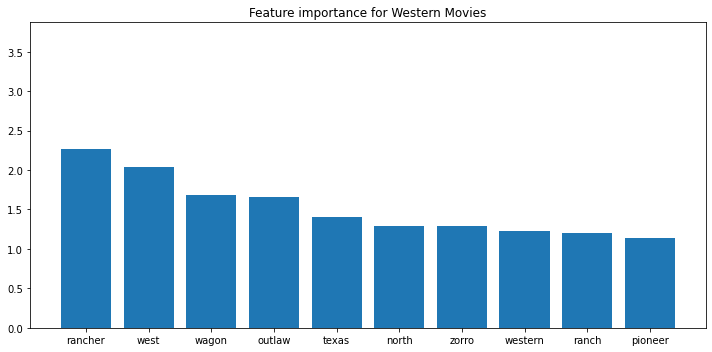

In [90]:
import matplotlib.pyplot as plt

plot_feature_importances(feat_names, importances, np.max(feat_impts), genre, path="")


In [13]:
[sum(x) for x in feat_impts]

[-170.7259829676492,
 -182.9465726398366,
 -123.86252343095282,
 -35.08140347796699,
 -48.191650903689286,
 -290.26263194568196,
 -162.46351258844956,
 -326.1580372738819,
 -202.47799651236414,
 -148.3963010039524,
 -102.2338101508324,
 -251.44978141484816,
 -107.45947505102559,
 -144.7298616395239,
 -329.4169707380508,
 -223.4398512300177,
 -112.79521551739823,
 -66.15973701491492,
 -374.8463330465651,
 -178.2135524162618,
 -67.67534921528731]

In [168]:
top_k = 30000
feature_names = text_model.get_feature_names_out()
classes = load_genres()

for i, (genre, feat_impt) in enumerate(zip(classes, feat_impts)):
    indices = np.argsort(feat_impt)[:top_k]
    feat_names = feature_names[indices]
    importances = np.sort(feat_impt)[:top_k]
    print(f"Genre: {genre}")
    print(f"Top {top_k} features:")
    for name, importance in zip(feat_names, importances):
        print(f"{name}: {importance}")
    if i == 0:
        break  

Genre: Action
Top 30000 features:
shape: -1.7560641973310598
soul: -1.5451277536925656
fantasy: -1.3944527295872795
within: -1.3780175696153254
gay: -1.3727333504409334
turkish: -1.3688348950273417
marriage: -1.3615949929862146
mancino: -1.3403757326190702
addict: -1.2695399632145474
budget: -1.2301673817950602
mysteriously: -1.219256766069326
muskehounds: -1.2127089190581948
wall: -1.20602345453452
confess: -1.197239697260156
asylum: -1.1809671241470292
ali: -1.1738268220428267
grand: -1.1683380917834263
sex: -1.1596974363448092
inherit: -1.1571385080505419
brilliant: -1.1561189725125103
bootlegger: -1.154732232779391
terrible: -1.1531897032323677
culture: -1.1273255855221442
unfold: -1.124644899263864
painter: -1.1213654202336087
scotland: -1.1190032807202197
1950s: -1.1085127860701665
romance: -1.1048200904830712
coach: -1.0993134484733713
single: -1.0962923719675177
avoid: -1.0952876350038112
dope: -1.0931200040232636
miner: -1.0910819460193408
fairy: -1.0899670030119468
extraterre

In [136]:
# get index of an element of the feature_names array
np.where(feature_names == "film")[0][0]

10643

In [167]:
top_k = 500
feature_names = text_model.get_feature_names_out()
classes = load_genres()

for i, (genre, feat_impt) in enumerate(zip(classes, normalized_coef_test)):
    indices = np.argsort(feat_impt)[::-1][:top_k]
    feat_names = feature_names[indices]
    importances = np.sort(feat_impt)[::-1][:top_k]
    print(f"Genre: {genre}")
    print(f"Top {top_k} features:")
    for name, importance in zip(feat_names, importances):
        print(f"{name}: {importance}")

Genre: Action
Top 500 features:
martial: 1.0
swordsman: 0.9905135487158969
terrorist: 0.856118092179825
ninjas: 0.8430695945585216
mercenary: 0.8124225246426772
yakuza: 0.7944136610256212
ninja: 0.7783971732236503
bandit: 0.7514548474503561
apocalyptic: 0.7318876441662938
karate: 0.7135730605115114
fighter: 0.6831775807446051
bodyguard: 0.6482375924314996
biker: 0.6358712114730405
superman: 0.63318122114292
trent: 0.6217925707475247
stake: 0.6119044010507143
thug: 0.6045217515350079
fighting: 0.6019335538249468
psychotic: 0.5565322643905823
shang: 0.5535380978978496
action: 0.5476730877638978
santo: 0.5466946161944729
alert: 0.5457282781493077
skill: 0.5448250996314653
vithal: 0.54309241949377
kammerer: 0.5331389181084404
tarzan: 0.5316570099398733
motorcycle: 0.5302543158354899
nico: 0.527904511564529
virtual: 0.5244025710160559
unit: 0.5192132836387662
shankar: 0.51737258582769
singh: 0.5161795816210091
cop: 0.5131672588394893
stock: 0.5129532419158351
min: 0.5066467851587598
attacke

In [307]:
top_k = 500
genre_features = {}  # To store top features for each genre
for i, (genre, feat_impt) in enumerate(zip(classes, feat_impts)):
    indices = np.argsort(feat_impt)[::-1][:top_k]
    feat_names = feature_names[indices]
    genre_features[genre] = set(feat_names)  # Store features as a set for easy comparison


In [20]:
def compute_association(genre_features, target_genre="Drama"):
    target_features = genre_features.get(target_genre, set())
    associations = {}

    for genre, features in genre_features.items():
        if genre == target_genre:
            continue

        # Jaccard Similarity: Intersection over Union
        intersection = target_features.intersection(features)
        union = target_features.union(features)
        jaccard_sim = len(intersection) / len(union) if len(union) > 0 else 0

        # Store results
        associations[genre] = {
            "jaccard_similarity": jaccard_sim,
            "shared_features": intersection,
            "num_shared_features": len(intersection),
        }

    return associations


In [345]:
# sort asoc dict by jaccard similarity
import operator

asoc = compute_association(genre_features, target_genre="Drama")
sorted_asoc = dict(sorted(asoc.items(), key=lambda item: item[1]['jaccard_similarity'], reverse=True))
# normalise sorted asoc to values between -1 and 1
# normalise jaccard similarities
max_jaccard = 0.05
min_jaccard = 0.0
for genre, values in sorted_asoc.items():
    sorted_asoc[genre]['jaccard_similarity'] = (values['jaccard_similarity'] - min_jaccard) / (max_jaccard - min_jaccard)

# only print genre and jaccard similarity
for genre, values in sorted_asoc.items():
    if genre in UNIQUE_GENRES_REDUCED:
        print(f"{genre}: {values['jaccard_similarity']:.2f}")

Crime: 0.92
Biography: 0.81
War: 0.77
History: 0.70
Mystery: 0.68
Romance: 0.68
Action: 0.43
Family: 0.43
Fantasy: 0.41
Thriller: 0.35
Adventure: 0.33
Sci-Fi: 0.30
Horror: 0.22
Animation: 0.20


In [347]:
# sort asoc dict by jaccard similarity
import operator

asoc = compute_association(genre_features, target_genre="Drama")
sorted_asoc = dict(sorted(asoc.items(), key=lambda item: item[1]['jaccard_similarity'], reverse=True))
# only print genre and jaccard similarity
for genre, values in sorted_asoc.items():
    if genre in UNIQUE_GENRES_REDUCED:
        print(f"{genre}: {values['jaccard_similarity']:.3f}")

Crime: 0.046
Biography: 0.041
War: 0.038
History: 0.035
Mystery: 0.034
Romance: 0.034
Action: 0.021
Family: 0.021
Fantasy: 0.020
Thriller: 0.017
Adventure: 0.016
Sci-Fi: 0.015
Horror: 0.011
Animation: 0.010


['00' '000' '01' ... 'único' 'über' 'überaus']


In [146]:
def weighted_similarity(genre_features, feat_impts, target_genre="Drama"):
    target_index = classes.index(target_genre)
    target_importances = feat_impts[target_index]
    target_features = feature_names[np.argsort(target_importances)[::-1][:top_k]]
    
    weighted_associations = {}
    for i, (genre, features) in enumerate(genre_features.items()):
        if genre == target_genre:
            continue

        # Compute weighted intersection
        importance_weights = feat_impts[i][np.isin(feature_names, target_features)]
        print(genre, len(importance_weights))
        weighted_sim = np.sum(importance_weights) / np.sum(feat_impts[i])

        weighted_associations[genre] = weighted_sim

    return weighted_associations


In [ ]:
w_asoc = weighted_similarity(genre_features, feat_impts, target_genre="Drama")

In [ ]:
# sort w_asoc dict by values
dict(sorted(w_asoc.items(), key=lambda item: item[1], reverse=True))

In [36]:
# only take the first 10k words for each array of feature importances
feat_impts_red = [x[:5000] for x in feat_impts]

In [277]:
feat_impts_norm = np.array(feat_impts) / np.linalg.norm(np.array(feat_impts), axis=1, keepdims=True)

In [126]:
np.max(feat_impts[2]),np.min(feat_impts[2]), np.sqrt(np.sum(np.square(feat_impts[2])))


(3.3719415910232153, -1.1282804288720172, 26.436594496697484)

In [127]:
np.max(feat_impts[2])/np.sqrt(np.sum(np.square(feat_impts[2])))

0.12754825858695398

In [104]:
feat_impts_norm = np.linalg.norm(feat_impts, axis=1, keepdims=True)

In [130]:
feat_impts_norm

array([[ 1.44283074e-04, -3.43397336e-03, -9.19452814e-05, ...,
         2.53966781e-03, -1.13358792e-04, -1.13358792e-04],
       [-6.62671723e-04, -8.75365732e-04, -5.71383338e-05, ...,
        -3.73370190e-04,  7.92075056e-04,  7.92075056e-04],
       [-3.99743744e-03, -1.32246092e-04, -2.06858744e-04, ...,
        -3.19388132e-04, -6.62232404e-05, -6.62232404e-05],
       ...,
       [-4.69855142e-03, -1.75492599e-03, -4.31984833e-04, ...,
        -5.35706994e-04, -1.03164475e-04, -1.03164475e-04],
       [ 1.82857513e-02, -1.85720901e-03, -4.36102310e-04, ...,
        -1.17109638e-04, -1.04990148e-04, -1.04990148e-04],
       [-4.86576217e-03, -1.56496067e-03, -4.87794610e-06, ...,
        -5.03302453e-04, -3.90051765e-05, -3.90051765e-05]])

In [668]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Assuming `multi_output_clf` is your trained MultiOutputClassifier
# Access the LogisticRegression models for each genre
# logreg_models = multi_output_clf.estimators_
# Assuming you know the index of the "drama" genre in your labels
drama_index = classes.index("Drama")
drama_coef = feat_impts_norm[drama_index].reshape(1, -1)  # Reshape to 2D array for cosine similarit

# Calculate cosine similarity between drama and all other genres
similarities = {}
for idx, model in enumerate(classes):
    genre_name = classes[idx]
    if genre_name != "Drama":  # Skip comparison with itself
        coef = feat_impts_norm[idx].reshape(1, -1)
        similarity = cosine_similarity(coef, drama_coef)[0, 0]  # Cosine similarity
        similarities[genre_name] = similarity

# Sort genres by similarity to drama
sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)

print(sorted_similarities)
# Display the most and least similar genres

# normalize sorted_similiarities between -1 and 1, keep the sign
# max_sim = max([sim for genre, sim in sorted_similarities])
# min_sim = -0.16
# for i, (genre, sim) in enumerate(sorted_similarities):
#     sorted_similarities[i] = (genre, (sim - min_sim) / (max_sim - min_sim) * 2 - 1)


print("Genres most similar to drama:")
for genre, sim in sorted_similarities:
    if genre in UNIQUE_GENRES_REDUCED:
        print(f"{genre}: {sim:.3f}")


[('Film-Noir', 0.11002034511593045), ('Crime', 0.09488785460115931), ('Romance', 0.08067526441600485), ('War', 0.07304982982565071), ('Biography', 0.06979723713293674), ('History', 0.06734079571603743), ('Music', 0.060890226096570965), ('Sport', 0.03976453586604217), ('Mystery', 0.027035062506333894), ('Western', 0.0192060884598624), ('Musical', -0.0033869528563404373), ('Family', -0.02502543356142578), ('Fantasy', -0.040373181370553825), ('Sci-Fi', -0.05405686790369937), ('Action', -0.07048949176636711), ('Thriller', -0.07275457316168976), ('Adventure', -0.07868248254855523), ('Animation', -0.08693452412932304), ('Comedy', -0.13518537922855303), ('Horror', -0.15218012998530533)]
Genres most similar to drama:
Crime: 0.095
Romance: 0.081
War: 0.073
Biography: 0.070
History: 0.067
Mystery: 0.027
Family: -0.025
Fantasy: -0.040
Sci-Fi: -0.054
Action: -0.070
Thriller: -0.073
Adventure: -0.079
Animation: -0.087
Horror: -0.152


In [670]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Assuming `multi_output_clf` is your trained MultiOutputClassifier
# Access the LogisticRegression models for each genre
# logreg_models = multi_output_clf.estimators_
# Assuming you know the index of the "drama" genre in your labels
drama_index = classes.index("Drama")
drama_coef = feat_impts_norm[drama_index].reshape(1, -1)  # Reshape to 2D array for cosine similarit

# Calculate cosine similarity between drama and all other genres
similarities = {}
for idx, model in enumerate(classes):
    genre_name = classes[idx]
    if genre_name != "Drama":  # Skip comparison with itself
        coef = feat_impts_norm[idx].reshape(1, -1)
        similarity = euclidean_distances(coef, drama_coef)[0, 0]  # Cosine similarity
        similarities[genre_name] = similarity

# Sort genres by similarity to drama
sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=False)

print(sorted_similarities)
# Display the most and least similar genres

# normalize sorted_similiarities between -1 and 1, keep the sign
# max_sim = max([sim for genre, sim in sorted_similarities])
# min_sim = -0.16
# for i, (genre, sim) in enumerate(sorted_similarities):
#     sorted_similarities[i] = (genre, (sim - min_sim) / (max_sim - min_sim) * 2 - 1)


print("Genres most similar to drama:")
for genre, sim in sorted_similarities:
    if genre in UNIQUE_GENRES_REDUCED:
        print(f"{genre}: {sim:.3f}")

print("\nGenres least similar to drama:")
for genre, sim in sorted_similarities[-5:]:
    print(f"{genre}: {sim:.3f}")


[('Film-Noir', 1.3341511570163775), ('Crime', 1.345445759143668), ('Romance', 1.3559680937131189), ('War', 1.3615800895829444), ('Biography', 1.3639668345433207), ('History', 1.3657666010588791), ('Music', 1.3704815021760994), ('Sport', 1.3858105672377865), ('Mystery', 1.3949659045967158), ('Western', 1.4005669648682544), ('Musical', 1.416606475247336), ('Family', 1.431799869787273), ('Fantasy', 1.442479241701976), ('Sci-Fi', 1.4519344805491043), ('Action', 1.4632084552560287), ('Thriller', 1.4647556609630767), ('Adventure', 1.4687971150220545), ('Animation', 1.4744046419686307), ('Comedy', 1.5067749528237802), ('Horror', 1.5180119432898442)]
Genres most similar to drama:
Crime: 1.345
Romance: 1.356
War: 1.362
Biography: 1.364
History: 1.366
Mystery: 1.395
Family: 1.432
Fantasy: 1.442
Sci-Fi: 1.452
Action: 1.463
Thriller: 1.465
Adventure: 1.469
Animation: 1.474
Horror: 1.518

Genres least similar to drama:
Thriller: 1.465
Adventure: 1.469
Animation: 1.474
Comedy: 1.507
Horror: 1.518


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Assuming `multi_output_clf` is your trained MultiOutputClassifier
# Access the LogisticRegression models for each genre
# logreg_models = multi_output_clf.estimators_
# Assuming you know the index of the "drama" genre in your labels
drama_index = classes.index("Drama")
drama_coef = feat_impts[drama_index].reshape(1, -1)  # Reshape to 2D array for cosine similarit

# Calculate cosine similarity between drama and all other genres
similarities = {}
for idx, model in enumerate(classes):
    genre_name = classes[idx]
    if genre_name != "Drama":  # Skip comparison with itself
        coef = feat_impts[idx].reshape(1, -1)
        similarity = cosine_similarity(coef, drama_coef)[0, 0]  # Cosine similarity
        similarities[genre_name] = similarity

# Sort genres by similarity to drama
sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)

print(sorted_similarities)
# Display the most and least similar genres

# normalize sorted_similiarities between 0 and 1, keep the sign
max_sim = max([sim for genre, sim in sorted_similarities])
min_sim = -0.16
for i, (genre, sim) in enumerate(sorted_similarities):
    sorted_similarities[i] = (genre, (sim - min_sim) / (max_sim - min_sim) * 2 - 1)


print("Genres most similar to drama:")
for genre, sim in sorted_similarities:
    if genre in UNIQUE_GENRES_REDUCED:
        print(f"{genre}: {sim:.2f}")

print("\nGenres least similar to drama:")
for genre, sim in sorted_similarities[-5:]:
    print(f"{genre}: {sim:.2f}")


[('Film-Noir', 0.1100203451159304), ('Crime', 0.09488785460115921), ('Romance', 0.08067526441600487), ('War', 0.0730498298256507), ('Biography', 0.06979723713293674), ('History', 0.06734079571603738), ('Music', 0.06089022609657098), ('Sport', 0.039764535866042165), ('Mystery', 0.02703506250633391), ('Western', 0.019206088459862384), ('Musical', -0.003386952856340434), ('Family', -0.02502543356142579), ('Fantasy', -0.040373181370553825), ('Sci-Fi', -0.05405686790369935), ('Action', -0.07048949176636707), ('Thriller', -0.07275457316168973), ('Adventure', -0.0786824825485553), ('Animation', -0.08693452412932318), ('Comedy', -0.135185379228553), ('Horror', -0.15218012998530536)]
Genres most similar to drama:
Crime: 0.89
Romance: 0.78
War: 0.73
Biography: 0.70
History: 0.68
Mystery: 0.39
Family: -0.00
Fantasy: -0.11
Sci-Fi: -0.22
Action: -0.34
Thriller: -0.35
Adventure: -0.40
Animation: -0.46
Horror: -0.94

Genres least similar to drama:
Thriller: -0.35
Adventure: -0.40
Animation: -0.46
Com

In [318]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Assuming `multi_output_clf` is your trained MultiOutputClassifier
# Access the LogisticRegression models for each genre
# logreg_models = multi_output_clf.estimators_
# Assuming you know the index of the "drama" genre in your labels
drama_index = classes.index("Drama")
drama_coef = normalized_coef_test[drama_index].reshape(1, -1)  # Reshape to 2D array for cosine similarit

# Calculate cosine similarity between drama and all other genres
similarities = {}
for idx, model in enumerate(classes):
    genre_name = classes[idx]
    if genre_name != "Drama":  # Skip comparison with itself
        coef = normalized_coef_test[idx].reshape(1, -1)
        similarity = cosine_similarity(coef, drama_coef)[0, 0]  # Cosine similarity
        similarities[genre_name] = similarity

# Sort genres by similarity to drama
sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)

print(sorted_similarities)
# Display the most and least similar genres
print("Genres most similar to drama:")
for genre, sim in sorted_similarities:
    if genre in UNIQUE_GENRES_REDUCED:
        print(f"{genre}: {sim:.2f}")

print("\nGenres least similar to drama:")
for genre, sim in sorted_similarities[-5:]:
    print(f"{genre}: {sim:.2f}")


[('Film-Noir', 0.08061352272363415), ('Crime', 0.07755821267849966), ('Romance', 0.0770756832154148), ('History', 0.05714818682210708), ('War', 0.05079984354751846), ('Biography', 0.038979196194753436), ('Music', 0.02813646278986505), ('Sport', 0.02296144373935956), ('Mystery', 0.0037267709129518377), ('Western', 0.0013900410803563104), ('Musical', -0.032769631165824445), ('Family', -0.039529139733947796), ('Fantasy', -0.058145787219504655), ('Sci-Fi', -0.058943599255756055), ('Animation', -0.08394836730126529), ('Action', -0.08455877389970119), ('Thriller', -0.08565391695590491), ('Adventure', -0.09173026648398325), ('Comedy', -0.14400253878484134), ('Horror', -0.1582529098204039)]
Genres most similar to drama:
Crime: 0.08
Romance: 0.08
History: 0.06
War: 0.05
Biography: 0.04
Mystery: 0.00
Family: -0.04
Fantasy: -0.06
Sci-Fi: -0.06
Animation: -0.08
Action: -0.08
Thriller: -0.09
Adventure: -0.09
Horror: -0.16

Genres least similar to drama:
Action: -0.08
Thriller: -0.09
Adventure: -0.0

In [319]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Assuming `multi_output_clf` is your trained MultiOutputClassifier
# Access the LogisticRegression models for each genre
# logreg_models = multi_output_clf.estimators_
# Assuming you know the index of the "drama" genre in your labels
drama_index = classes.index("Drama")
drama_coef = feat_impts_norm[drama_index].reshape(1, -1)  # Reshape to 2D array for cosine similarit

# Calculate cosine similarity between drama and all other genres
similarities = {}
for idx, model in enumerate(classes):
    genre_name = classes[idx]
    if genre_name != "Drama":  # Skip comparison with itself
        coef = feat_impts_norm[idx].reshape(1, -1)
        similarity = euclidean_distances(coef, drama_coef)[0, 0]  # Cosine similarity
        similarities[genre_name] = similarity

# Sort genres by similarity to drama
sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=False)

print(sorted_similarities)
# Display the most and least similar genres
print("Genres most similar to drama:")
for genre, sim in sorted_similarities:
    if genre in UNIQUE_GENRES_REDUCED:
        print(f"{genre}: {sim:.2f}")

print("\nGenres least similar to drama:")
for genre, sim in sorted_similarities[-5:]:
    print(f"{genre}: {sim:.2f}")


[('Film-Noir', 1.3341511570163775), ('Crime', 1.345445759143668), ('Romance', 1.3559680937131189), ('War', 1.3615800895829444), ('Biography', 1.3639668345433207), ('History', 1.3657666010588791), ('Music', 1.3704815021760994), ('Sport', 1.3858105672377865), ('Mystery', 1.3949659045967158), ('Western', 1.4005669648682544), ('Musical', 1.416606475247336), ('Family', 1.431799869787273), ('Fantasy', 1.442479241701976), ('Sci-Fi', 1.4519344805491043), ('Action', 1.4632084552560287), ('Thriller', 1.4647556609630767), ('Adventure', 1.4687971150220545), ('Animation', 1.4744046419686307), ('Comedy', 1.5067749528237802), ('Horror', 1.5180119432898442)]
Genres most similar to drama:
Crime: 1.35
Romance: 1.36
War: 1.36
Biography: 1.36
History: 1.37
Mystery: 1.39
Family: 1.43
Fantasy: 1.44
Sci-Fi: 1.45
Action: 1.46
Thriller: 1.46
Adventure: 1.47
Animation: 1.47
Horror: 1.52

Genres least similar to drama:
Thriller: 1.46
Adventure: 1.47
Animation: 1.47
Comedy: 1.51
Horror: 1.52


In [25]:
UNIQUE_GENRES_REDUCED = ['Action',
                         'Adventure',
                        'Animation',
                        'Biography',
                         'Crime',
                         'Family',
                         'Fantasy',
                        'History',
                         'Horror',
                         'Mystery',
                         'Romance',
                         'Sci-Fi',
                         'Thriller', 'War']

In [156]:
def normalize_coef_by_sign(coef):
    normalized = np.zeros_like(coef)
    
    for i, row in enumerate(coef):
        positive_mask = row > 0
        negative_mask = row < 0

        if np.any(positive_mask):
            min_pos = np.min(row[positive_mask])
            max_pos = np.max(row[positive_mask])
            if max_pos != min_pos:  # Avoid division by zero
                normalized[i, positive_mask] = (row[positive_mask] - min_pos) / (max_pos - min_pos)

        if np.any(negative_mask):
            min_neg = np.min(row[negative_mask])
            max_neg = np.max(row[negative_mask])
            if max_neg != min_neg:  # Avoid division by zero
                normalized[i, negative_mask] = -(row[negative_mask] - max_neg) / (min_neg - max_neg)
    
    return normalized

# Apply normalization
normalized_coef_test = normalize_coef_by_sign(coef_)

In [342]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Assume coef_ is the learned weights from LogisticRegression
# Example: coef_ shape = (n_classes, n_features)
# genres = ["Horror", "Comedy", "Drama", ...]
# feature_names = ["word1", "word2", ..., "wordN"]

coef_ = feat_impts

# Select a target genre
target_genre_idx = classes.index("Drama")  # e.g., Horror
target_weights = normalized_coef_test[target_genre_idx]

# Normalize coefficients for Euclidean distance (optional)
normalized_coef = coef_ / np.linalg.norm(coef_, axis=1, keepdims=True)

sims = {}
sims2 = {}
# Approach 2: Top features of each genre
for i, genre in enumerate(classes):
    if i == target_genre_idx:
        continue
    # print(f"Comparison to {genre}:")
    
    # Identify top features for the current genre
    # top_other_features_idx = np.argsort(np.abs(normalized_coef_test[i]))[-100:]
    # choose top 50 features idx positive and and worst 50 negative
    top_other_features_idx = np.argsort(normalized_coef_test[i])[-100:].tolist() + np.argsort(normalized_coef_test[i])[:100].tolist() 
        
    target_subset = np.array([target_weights[top_other_features_idx]])
    other_subset = np.array([normalized_coef_test[i][top_other_features_idx]])
    
    
    # Compute cosine similarity
    cos_sim = cosine_similarity(target_subset, other_subset)[0][0]
    # print(f"  Cosine Similarity (Top Features): {cos_sim}")
    
    # Compute Euclidean distance (normalized weights)
    # target_subset_norm = target_subset / np.linalg.norm(target_subset)
    # other_subset_norm = other_subset / np.linalg.norm(other_subset)
    euc_dist = np.linalg.norm(target_subset - other_subset)
    # print(f"  Normalized Euclidean Distance (Top Features): {euc_dist}")
    sims[genre] = cos_sim
    sims2[genre] = euc_dist


# Top 100 positive

In [238]:
sorted_sims = sorted(sims.items(), key=lambda x: x[1], reverse=True)

print("Genres most similar to drama:")
for genre, sim in sorted_sims:
    if genre in UNIQUE_GENRES_REDUCED:
        print(f"{genre}: {sim:.3f}")

Genres most similar to drama:
War: 0.517
History: 0.449
Biography: 0.447
Crime: 0.382
Romance: 0.091
Adventure: -0.116
Family: -0.120
Mystery: -0.122
Action: -0.232
Thriller: -0.282
Fantasy: -0.322
Sci-Fi: -0.369
Animation: -0.563
Horror: -0.792


In [239]:
sorted_sims2 = sorted(sims2.items(), key=lambda x: x[1], reverse=False)

print("Genres most similar to drama:")
for genre, sim in sorted_sims2:
    if genre in UNIQUE_GENRES_REDUCED:
        print(f"{genre}: {sim:.3f}")

Genres most similar to drama:
Biography: 3.540
War: 4.513
Crime: 4.945
Animation: 5.715
Fantasy: 6.009
History: 6.066
Sci-Fi: 6.380
Action: 6.469
Mystery: 6.527
Thriller: 6.577
Family: 6.657
Adventure: 6.938
Romance: 6.989
Horror: 7.854


# Top 100 positive and negative

In [343]:
sorted_sims = sorted(sims.items(), key=lambda x: x[1], reverse=True)

print("Genres most similar to drama:")
for genre, sim in sorted_sims:
    if genre in UNIQUE_GENRES_REDUCED:
        print(f"{genre}: {sim:.2f}")

Genres most similar to drama:
War: 0.36
Biography: 0.35
History: 0.32
Crime: 0.30
Romance: 0.21
Family: -0.02
Adventure: -0.03
Mystery: -0.10
Sci-Fi: -0.13
Fantasy: -0.17
Thriller: -0.20
Animation: -0.25
Action: -0.26
Horror: -0.52


In [241]:
sorted_sims = sorted(sims.items(), key=lambda x: x[1], reverse=True)

print("Genres most similar to drama:")
for genre, sim in sorted_sims:
    if genre in UNIQUE_GENRES_REDUCED:
        print(f"{genre}: {sim:.3f}")

Genres most similar to drama:
War: 0.361
Biography: 0.352
History: 0.324
Crime: 0.301
Romance: 0.211
Family: -0.021
Adventure: -0.029
Mystery: -0.105
Sci-Fi: -0.134
Fantasy: -0.165
Thriller: -0.204
Animation: -0.251
Action: -0.258
Horror: -0.522


In [344]:
sorted_sims2 = sorted(sims2.items(), key=lambda x: x[1], reverse=False)

print("Genres most similar to drama:")
for genre, sim in sorted_sims2:
    if genre in UNIQUE_GENRES_REDUCED:
        print(f"{genre}: {sim:.3f}")

Genres most similar to drama:
Biography: 6.957
War: 7.432
Crime: 7.834
History: 8.485
Sci-Fi: 8.912
Animation: 8.971
Family: 9.203
Romance: 9.269
Thriller: 9.857
Fantasy: 9.921
Adventure: 10.027
Action: 10.077
Mystery: 10.528
Horror: 10.930


In [341]:
sorted_sims2 = sorted(sims2.items(), key=lambda x: x[1], reverse=False)
max_sim = 11
min_sim = min([sim for genre, sim in sorted_sims2])
for i, (genre, sim) in enumerate(sorted_sims2):
    sorted_sims2[i] = (genre, -((sim - min_sim) / (max_sim - min_sim) * 2 - 1))
print("Genres most similar to drama:")
for genre, sim in sorted_sims2:
    if genre in UNIQUE_GENRES_REDUCED:
        print(f"{genre}: {sim:.3f}")

Genres most similar to drama:
Biography: 0.890
War: 0.668
Crime: 0.480
History: 0.176
Sci-Fi: -0.023
Animation: -0.051
Family: -0.160
Romance: -0.190
Thriller: -0.466
Fantasy: -0.496
Adventure: -0.545
Action: -0.568
Mystery: -0.779
Horror: -0.967


# Top 100 absolute

In [335]:
sorted_sims = sorted(sims.items(), key=lambda x: x[1], reverse=True)

print("Genres most similar to drama:")
for genre, sim in sorted_sims:
    if genre in UNIQUE_GENRES_REDUCED:
        print(f"{genre}: {sim:.2f}")

Genres most similar to drama:
History: 0.46
Crime: 0.42
Biography: 0.36
War: 0.36
Romance: 0.26
Family: 0.01
Adventure: -0.00
Sci-Fi: -0.09
Fantasy: -0.10
Mystery: -0.13
Thriller: -0.15
Animation: -0.17
Action: -0.26
Horror: -0.46


In [175]:
sorted_sims = sorted(sims.items(), key=lambda x: x[1], reverse=True)

print("Genres most similar to drama:")
for genre, sim in sorted_sims:
    if genre in UNIQUE_GENRES_REDUCED:
        print(f"{genre}: {sim:.3f}")

Genres most similar to drama:
History: 0.455
Crime: 0.416
Biography: 0.362
War: 0.361
Romance: 0.258
Family: 0.013
Adventure: -0.002
Sci-Fi: -0.085
Fantasy: -0.099
Mystery: -0.126
Thriller: -0.152
Animation: -0.172
Action: -0.259
Horror: -0.461


In [334]:
sorted_sims2 = sorted(sims2.items(), key=lambda x: x[1], reverse=False)
# normalise sorted_similiarities between -1 and 1
max_sim = 9
min_sim = min([sim for genre, sim in sorted_sims2])
for i, (genre, sim) in enumerate(sorted_sims2):
    sorted_sims2[i] = (genre, -((sim - min_sim) / (max_sim - min_sim) * 2 - 1))

print("Genres most similar to drama:")
for genre, sim in sorted_sims2:
    if genre in UNIQUE_GENRES_REDUCED:
        print(f"{genre}: {sim:.2f}")

Genres most similar to drama:
Crime: 0.84
Biography: 0.74
War: 0.68
History: 0.49
Sci-Fi: 0.16
Romance: 0.16
Family: 0.03
Animation: -0.07
Thriller: -0.21
Adventure: -0.31
Action: -0.33
Fantasy: -0.43
Mystery: -0.74
Horror: -0.79


In [176]:
sorted_sims2 = sorted(sims2.items(), key=lambda x: x[1], reverse=False)

print("Genres most similar to drama:")
for genre, sim in sorted_sims2:
    if genre in UNIQUE_GENRES_REDUCED:
        print(f"{genre}: {sim:.3f}")

Genres most similar to drama:
Crime: 5.834
Biography: 5.997
War: 6.116
History: 6.427
Sci-Fi: 7.006
Romance: 7.011
Family: 7.223
Animation: 7.394
Thriller: 7.639
Adventure: 7.818
Action: 7.842
Fantasy: 8.020
Mystery: 8.552
Horror: 8.645


# Top 20 absolute

In [162]:
sorted_sims = sorted(sims.items(), key=lambda x: x[1], reverse=True)

print("Genres most similar to drama:")
for genre, sim in sorted_sims:
    if genre in UNIQUE_GENRES_REDUCED:
        print(f"{genre}: {sim:.3f}")

Genres most similar to drama:
Romance: 0.537
History: 0.508
War: 0.422
Biography: 0.359
Crime: 0.317
Family: 0.215
Mystery: 0.038
Action: -0.125
Adventure: -0.172
Fantasy: -0.180
Thriller: -0.251
Animation: -0.256
Sci-Fi: -0.274
Horror: -0.449


In [166]:
sorted_sims2 = sorted(sims2.items(), key=lambda x: x[1], reverse=False)

print("Genres most similar to drama:")
for genre, sim in sorted_sims2:
    if genre in UNIQUE_GENRES_REDUCED:
        print(f"{genre}: {sim:.3f}")

Genres most similar to drama:
Romance: 3.311
History: 3.464
Biography: 3.482
Crime: 3.552
War: 3.574
Family: 3.742
Action: 3.984
Sci-Fi: 4.102
Fantasy: 4.323
Thriller: 4.341
Mystery: 4.358
Animation: 4.377
Adventure: 4.437
Horror: 4.969


# Top 20 absolute unnormalized

In [149]:
sorted_sims = sorted(sims.items(), key=lambda x: x[1], reverse=True)

print("Genres most similar to drama:")
for genre, sim in sorted_sims:
    if genre in UNIQUE_GENRES_REDUCED:
        print(f"{genre}: {sim:.3f}")

Genres most similar to drama:
War: 0.608
History: 0.488
Romance: 0.483
Biography: 0.408
Crime: 0.311
Family: 0.041
Action: -0.255
Adventure: -0.327
Fantasy: -0.383
Thriller: -0.407
Sci-Fi: -0.498
Mystery: -0.564
Animation: -0.754
Horror: -0.898


In [260]:
sorted_sims2 = sorted(sims2.items(), key=lambda x: x[1], reverse=False)

print("Genres most similar to drama:")
for genre, sim in sorted_sims2:
    if genre in UNIQUE_GENRES_REDUCED:
        print(f"{genre}: {sim:.3f}")

Genres most similar to drama:
War: 0.886
History: 1.012
Romance: 1.017
Biography: 1.088
Crime: 1.174
Family: 1.385
Action: 1.584
Adventure: 1.629
Fantasy: 1.663
Thriller: 1.678
Sci-Fi: 1.731
Mystery: 1.768
Animation: 1.873
Horror: 1.948


# Top 20 pos/neg normalized l2

In [281]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Assume coef_ is the learned weights from LogisticRegression
# Example: coef_ shape = (n_classes, n_features)
# genres = ["Horror", "Comedy", "Drama", ...]
# feature_names = ["word1", "word2", ..., "wordN"]

coef_ = feat_impts

normalized_coef = coef_ / np.linalg.norm(coef_, axis=1, keepdims=True)


# Select a target genre
target_genre_idx = classes.index("Drama")  # e.g., Horror
target_weights = normalized_coef[target_genre_idx]

# Normalize coefficients for Euclidean distance (optional)

sims = {}
sims2 = {}
# Approach 2: Top features of each genre
for i, genre in enumerate(classes):
    if i == target_genre_idx:
        continue
    # print(f"Comparison to {genre}:")
    
    # Identify top features for the current genre
    # top_other_features_idx = np.argsort(np.abs(coef_[i]))[-20:]
    # choose top 50 features idx positive and and worst 50 negative
    top_other_features_idx = np.argsort(normalized_coef[i])[-20:].tolist() + np.argsort(normalized_coef[i])[:20].tolist()  
    
    top_other_feature_names = [feature_names[j] for j in top_other_features_idx]
    
    # print(top_other_feature_names)
    target_subset = np.array([target_weights[top_other_features_idx]])
    other_subset = np.array([normalized_coef[i][top_other_features_idx]])
    # print(target_subset)
    # how many weitghts are >0
    print(len(other_subset[target_subset > 0]))
    print(len(other_subset[other_subset > 0]))

    
    
    # if i == 0:
    #     break
    # Extract weights for these features in both genres
    # target_subset = np.array([target_weights[np.where(feature_names == f)[0][0]] for f in top_other_feature_names])
    # other_subset = np.array([coef_[i][np.where(feature_names == f)[0][0]] for f in top_other_feature_names])
    target_subset = np.array([target_weights[top_other_features_idx]])
    other_subset = np.array([coef_[i][top_other_features_idx]])
    
    
    # Compute cosine similarity
    cos_sim = cosine_similarity(target_subset, other_subset)[0][0]
    # print(f"  Cosine Similarity (Top Features): {cos_sim}")
    
    # Compute Euclidean distance (normalized weights)
    target_subset_norm = target_subset / np.linalg.norm(target_subset)
    other_subset_norm = other_subset / np.linalg.norm(other_subset)
    euc_dist = np.linalg.norm(target_subset - other_subset)
    # print(f"  Normalized Euclidean Distance (Top Features): {euc_dist}")
    sims[genre] = cos_sim
    sims2[genre] = euc_dist


In [282]:
sorted_sims = sorted(sims.items(), key=lambda x: x[1], reverse=True)

print("Genres most similar to drama:")
for genre, sim in sorted_sims:
    if genre in UNIQUE_GENRES_REDUCED:
        print(f"{genre}: {sim:.3f}")

Genres most similar to drama:
War: 0.440
Crime: 0.422
History: 0.381
Biography: 0.361
Romance: 0.213
Family: 0.089
Adventure: -0.011
Action: -0.198
Thriller: -0.250
Fantasy: -0.258
Mystery: -0.262
Sci-Fi: -0.377
Animation: -0.552
Horror: -0.727


In [283]:
sorted_sims2 = sorted(sims2.items(), key=lambda x: x[1], reverse=False)

print("Genres most similar to drama:")
for genre, sim in sorted_sims2:
    if genre in UNIQUE_GENRES_REDUCED:
        print(f"{genre}: {sim:.3f}")

Genres most similar to drama:
History: 7.017
Biography: 7.804
War: 7.848
Mystery: 8.126
Fantasy: 8.144
Family: 8.272
Romance: 8.425
Adventure: 8.477
Animation: 8.602
Thriller: 9.148
Crime: 9.465
Sci-Fi: 9.712
Action: 9.859
Horror: 10.889


# Top 20 pos/neg unnonrmalized

In [285]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Assume coef_ is the learned weights from LogisticRegression
# Example: coef_ shape = (n_classes, n_features)
# genres = ["Horror", "Comedy", "Drama", ...]
# feature_names = ["word1", "word2", ..., "wordN"]

coef_ = feat_impts

normalized_coef = coef_ / np.linalg.norm(coef_, axis=1, keepdims=True)


# Select a target genre
target_genre_idx = classes.index("Drama")  # e.g., Horror
target_weights = coef_[target_genre_idx]

# Normalize coefficients for Euclidean distance (optional)

sims = {}
sims2 = {}
# Approach 2: Top features of each genre
for i, genre in enumerate(classes):
    if i == target_genre_idx:
        continue
    # print(f"Comparison to {genre}:")
    
    # Identify top features for the current genre
    # top_other_features_idx = np.argsort(np.abs(coef_[i]))[-20:]
    # choose top 50 features idx positive and and worst 50 negative
    top_other_features_idx = np.argsort(coef_[i])[-20:].tolist() + np.argsort(coef_[i])[:20].tolist()  
        
    target_subset = np.array([target_weights[top_other_features_idx]])
    other_subset = np.array([coef_[i][top_other_features_idx]])
    
    
    # Compute cosine similarity
    cos_sim = cosine_similarity(target_subset, other_subset)[0][0]
    # print(f"  Cosine Similarity (Top Features): {cos_sim}")
    
    # Compute Euclidean distance (normalized weights)
    target_subset_norm = target_subset / np.linalg.norm(target_subset)
    other_subset_norm = other_subset / np.linalg.norm(other_subset)
    euc_dist = np.linalg.norm(target_subset - other_subset)
    # print(f"  Normalized Euclidean Distance (Top Features): {euc_dist}")
    sims[genre] = cos_sim
    sims2[genre] = euc_dist


In [291]:
sorted_sims = sorted(sims.items(), key=lambda x: x[1], reverse=True)

print("Genres most similar to drama:")
for genre, sim in sorted_sims:
    if genre in UNIQUE_GENRES_REDUCED:
        print(f"{genre}: {sim:.3f}")

Genres most similar to drama:
Biography: 0.476
Crime: 0.358
Romance: 0.357
War: 0.334
History: 0.324
Adventure: 0.287
Mystery: 0.279
Family: 0.182
Sci-Fi: 0.044
Action: -0.001
Fantasy: -0.054
Thriller: -0.180
Animation: -0.289
Horror: -0.461


In [286]:
sorted_sims = sorted(sims.items(), key=lambda x: x[1], reverse=True)

print("Genres most similar to drama:")
for genre, sim in sorted_sims:
    if genre in UNIQUE_GENRES_REDUCED:
        print(f"{genre}: {sim:.3f}")

Genres most similar to drama:
War: 0.440
Crime: 0.422
History: 0.381
Biography: 0.361
Romance: 0.213
Family: 0.089
Adventure: -0.011
Action: -0.198
Thriller: -0.250
Fantasy: -0.258
Mystery: -0.262
Sci-Fi: -0.377
Animation: -0.552
Horror: -0.727


In [290]:
sorted_sims2 = sorted(sims2.items(), key=lambda x: x[1], reverse=False)

print("Genres most similar to drama:")
for genre, sim in sorted_sims2:
    if genre in UNIQUE_GENRES_REDUCED:
        print(f"{genre}: {sim:.3f}")

Genres most similar to drama:
Biography: 8.193
Romance: 8.446
Crime: 8.561
History: 8.628
War: 8.637
Adventure: 8.673
Mystery: 8.677
Family: 8.936
Sci-Fi: 9.232
Fantasy: 9.308
Action: 9.868
Thriller: 10.529
Animation: 11.762
Horror: 12.156


In [287]:
sorted_sims2 = sorted(sims2.items(), key=lambda x: x[1], reverse=False)

print("Genres most similar to drama:")
for genre, sim in sorted_sims2:
    if genre in UNIQUE_GENRES_REDUCED:
        print(f"{genre}: {sim:.3f}")

Genres most similar to drama:
History: 6.509
War: 7.121
Biography: 7.310
Romance: 8.338
Family: 8.602
Crime: 8.641
Fantasy: 9.261
Adventure: 9.342
Mystery: 9.735
Action: 10.815
Thriller: 10.877
Sci-Fi: 11.158
Animation: 11.482
Horror: 14.800


In [296]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Assume coef_ is the learned weights from LogisticRegression
# Example: coef_ shape = (n_classes, n_features)
# genres = ["Horror", "Comedy", "Drama", ...]
# feature_names = ["word1", "word2", ..., "wordN"]

coef_ = feat_impts

# Select a target genre
target_genre_idx = classes.index("Drama")  # e.g., Horror
target_weights = normalized_coef_test[target_genre_idx]

# Normalize coefficients for Euclidean distance (optional)
normalized_coef = coef_ / np.linalg.norm(coef_, axis=1, keepdims=True)

sims = {}
sims2 = {}
# Approach 2: Top features of each genre
for i, genre in enumerate(classes):
    if i == target_genre_idx:
        continue
    # print(f"Comparison to {genre}:")
    
    # Identify top features for the current genre
    # top_other_features_idx = np.argsort(np.abs(coef_[i]))[-20:]
    # choose top 50 features idx positive and and worst 50 negative
    drama_weights_topk_idx = np.argsort(target_weights)[-100:].tolist() + np.argsort(target_weights)[:100].tolist()  
    
    target_subset = np.array([target_weights[drama_weights_topk_idx]])
    other_subset = np.array([normalized_coef_test[i][drama_weights_topk_idx]])
    
    
    # Compute cosine similarity
    cos_sim = cosine_similarity(target_subset, other_subset)[0][0]
    # print(f"  Cosine Similarity (Top Features): {cos_sim}")
    
    # Compute Euclidean distance (normalized weights)
    target_subset_norm = target_subset / np.linalg.norm(target_subset)
    other_subset_norm = other_subset / np.linalg.norm(other_subset)
    euc_dist = np.linalg.norm(target_subset - other_subset)
    # print(f"  Normalized Euclidean Distance (Top Features): {euc_dist}")
    sims[genre] = cos_sim
    sims2[genre] = euc_dist


In [289]:
sorted_sims = sorted(sims.items(), key=lambda x: x[1], reverse=True)

print("Genres most similar to drama:")
for genre, sim in sorted_sims:
    if genre in UNIQUE_GENRES_REDUCED:
        print(f"{genre}: {sim:.3f}")

Genres most similar to drama:
Biography: 0.476
Crime: 0.358
Romance: 0.357
War: 0.334
History: 0.324
Adventure: 0.287
Mystery: 0.279
Family: 0.182
Sci-Fi: 0.044
Action: -0.001
Fantasy: -0.054
Thriller: -0.180
Animation: -0.289
Horror: -0.461


In [301]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Assume coef_ is the learned weights from LogisticRegression
# Example: coef_ shape = (n_classes, n_features)
# genres = ["Horror", "Comedy", "Drama", ...]
# feature_names = ["word1", "word2", ..., "wordN"]

coef_ = feat_impts

normalized_coef = coef_ / np.linalg.norm(coef_, axis=1, keepdims=True)


# Select a target genre
target_genre_idx = classes.index("Drama")  # e.g., Horror
target_weights = normalized_coef_test[target_genre_idx]

# Normalize coefficients for Euclidean distance (optional)

sims = {}
sims2 = {}
# Approach 2: Top features of each genre
for i, genre in enumerate(classes):
    if i == target_genre_idx:
        continue
    # print(f"Comparison to {genre}:")
    
    # Identify top features for the current genre
    # top_other_features_idx = np.argsort(np.abs(normalized_coef_test[i]))[-100:]
    # choose top 50 features idx positive and and worst 50 negative
    top_other_features_idx = np.argsort(normalized_coef[i])[-20:].tolist() + np.argsort(normalized_coef[i])[:20].tolist()  
    
    target_subset = np.array([target_weights[top_other_features_idx]])
    other_subset = np.array([normalized_coef_test[i][top_other_features_idx]])
    # print(target_subset)
    # how many weitghts are >0
    print(genre)
    print(len(other_subset[other_subset > 0]))
    print(len(other_subset[other_subset < 0]))
    print("---------")
    
    
    # if i == 0:
    #     break
    # Extract weights for these features in both genres
    # target_subset = np.array([target_weights[np.where(feature_names == f)[0][0]] for f in top_other_feature_names])
    # other_subset = np.array([coef_[i][np.where(feature_names == f)[0][0]] for f in top_other_feature_names])
    target_subset = np.array([target_weights[top_other_features_idx]])
    other_subset = np.array([normalized_coef_test[i][top_other_features_idx]])
    
    
    # Compute cosine similarity
    cos_sim = cosine_similarity(target_subset, other_subset)[0][0]
    # print(f"  Cosine Similarity (Top Features): {cos_sim}")
    
    # Compute Euclidean distance (normalized weights)
    target_subset_norm = target_subset / np.linalg.norm(target_subset)
    other_subset_norm = other_subset / np.linalg.norm(other_subset)
    euc_dist = np.linalg.norm(target_subset - other_subset)
    # print(f"  Normalized Euclidean Distance (Top Features): {euc_dist}")
    sims[genre] = cos_sim
    sims2[genre] = euc_dist


Action
20
20
---------
Adventure
20
20
---------
Animation
20
20
---------
Biography
20
20
---------
Comedy
20
20
---------
Crime
20
20
---------
Family
20
20
---------
Fantasy
20
20
---------
Film-Noir
20
20
---------
History
20
20
---------
Horror
20
20
---------
Music
20
20
---------
Musical
20
20
---------
Mystery
20
20
---------
Romance
20
20
---------
Sci-Fi
20
20
---------
Sport
20
20
---------
Thriller
20
20
---------
War
20
20
---------
Western
20
20
---------
